In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Loading datasets and inspection


In [2]:
pd.read_csv('UNSW_NB15_training-set.csv')

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [3]:
pd.read_csv('UNSW_NB15_testing-set.csv')

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [4]:
train = pd.read_csv("UNSW_NB15_training-set.csv")

In [5]:
train.shape


(82332, 45)

In [6]:
train.dtypes 

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [7]:
test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [8]:
test.shape

(175341, 45)

In [9]:
train.columns.tolist()

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [10]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

check the missing values & data quality


 missing values of training set

In [11]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

no missing values

In [12]:
train.duplicated().sum()

np.int64(0)

no duplicates as well

missing values of test

In [13]:

test.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

no missing values 

In [14]:
list(train.columns)

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [15]:
list(test.columns)

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

Label distribution

In [16]:

train['label'].value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

attack category distribution


In [17]:
train['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

Visualization of the class imbalance 

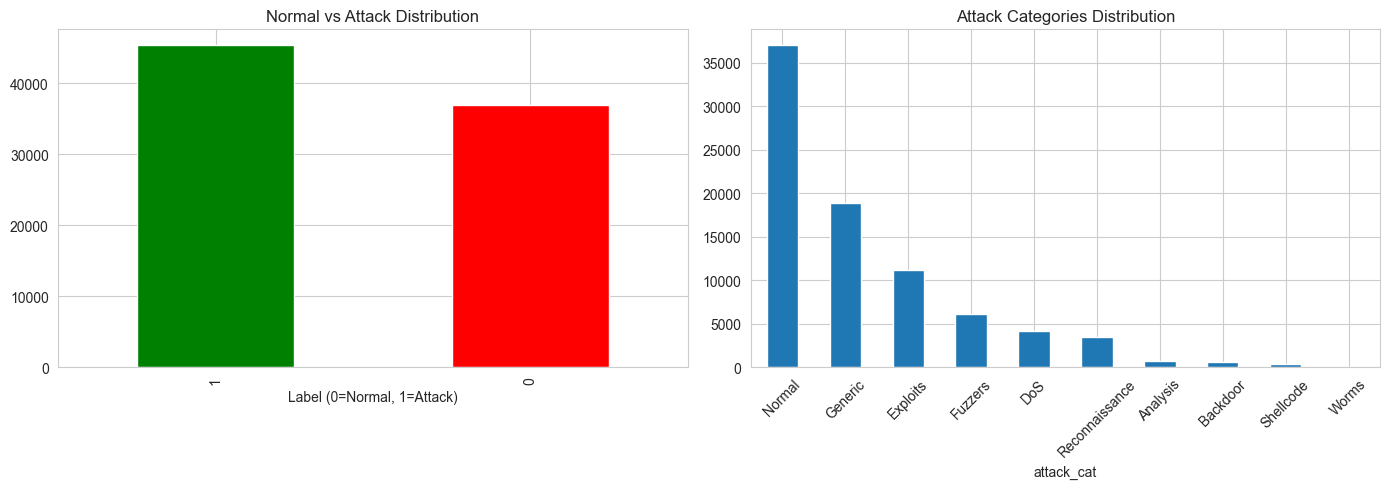

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
train['label'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Normal vs Attack Distribution')
axes[0].set_xlabel('Label (0=Normal, 1=Attack)')

train['attack_cat'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Attack Categories Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

Feature Analysis by Type

identify categorical columns

categorical_cols = ['proto', 'service', 'state']

In [19]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

In [20]:
train[categorical_cols].value_counts()

proto   service  state  attack_cat    
udp     dns      INT    Generic           18161
tcp     -        FIN    Normal            17644
        http     FIN    Normal             4001
udp     -        INT    Normal             3497
tcp     -        FIN    Fuzzers            3187
                                          ...  
aris    -        INT    Reconnaissance        1
wb-mon  -        INT    Reconnaissance        1
wsn     -        INT    Reconnaissance        1
xnet    -        INT    Reconnaissance        1
zero    -        INT    Reconnaissance        1
Name: count, Length: 902, dtype: int64

show the top 10

In [21]:
train[categorical_cols].describe().T.head(10)

count unique     top   freq
proto       82332    131     tcp  43095
service     82332     13       -  47153
state       82332      7     FIN  39339
attack_cat  82332     10  Normal  37000

Numerical features

In [22]:
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

In [23]:
train[numerical_cols].describe().T.head(10)


count          mean           std   min           25%  \
id      82332.0  4.116650e+04  2.376735e+04   1.0  20583.750000   
dur     82332.0  1.006756e+00  4.710444e+00   0.0      0.000008   
spkts   82332.0  1.866647e+01  1.339164e+02   1.0      2.000000   
dpkts   82332.0  1.754594e+01  1.155741e+02   0.0      0.000000   
sbytes  82332.0  7.993908e+03  1.716423e+05  24.0    114.000000   
dbytes  82332.0  1.323379e+04  1.514715e+05   0.0      0.000000   
rate    82332.0  8.241089e+04  1.486204e+05   0.0     28.606114   
sttl    82332.0  1.809677e+02  1.015134e+02   0.0     62.000000   
dttl    82332.0  9.571300e+01  1.166677e+02   0.0      0.000000   
sload   82332.0  6.454902e+07  1.798618e+08   0.0  11202.466797   

                  50%           75%           max  
id       41166.500000  6.174925e+04  8.233200e+04  
dur          0.014138  7.193603e-01  5.999999e+01  
spkts        6.000000  1.200000e+01  1.064600e+04  
dpkts        2.000000  1.000000e+01  1.101800e+04  
sbytes     534.000000  1.280000e+03  1.435577e+07  
dbytes     178.000000  9.560000e+02  1.465753e+07  
rate      2650.176667  1.111111e+05  1.000000e+06  
sttl       254.000000  2.540000e+02  2.550000e+02  
dttl        29.000000  2.520000e+02  2.530000e+02  
sload   577003.218750  6.514286e+07  5.268000e+09

Boxplots for numerical features

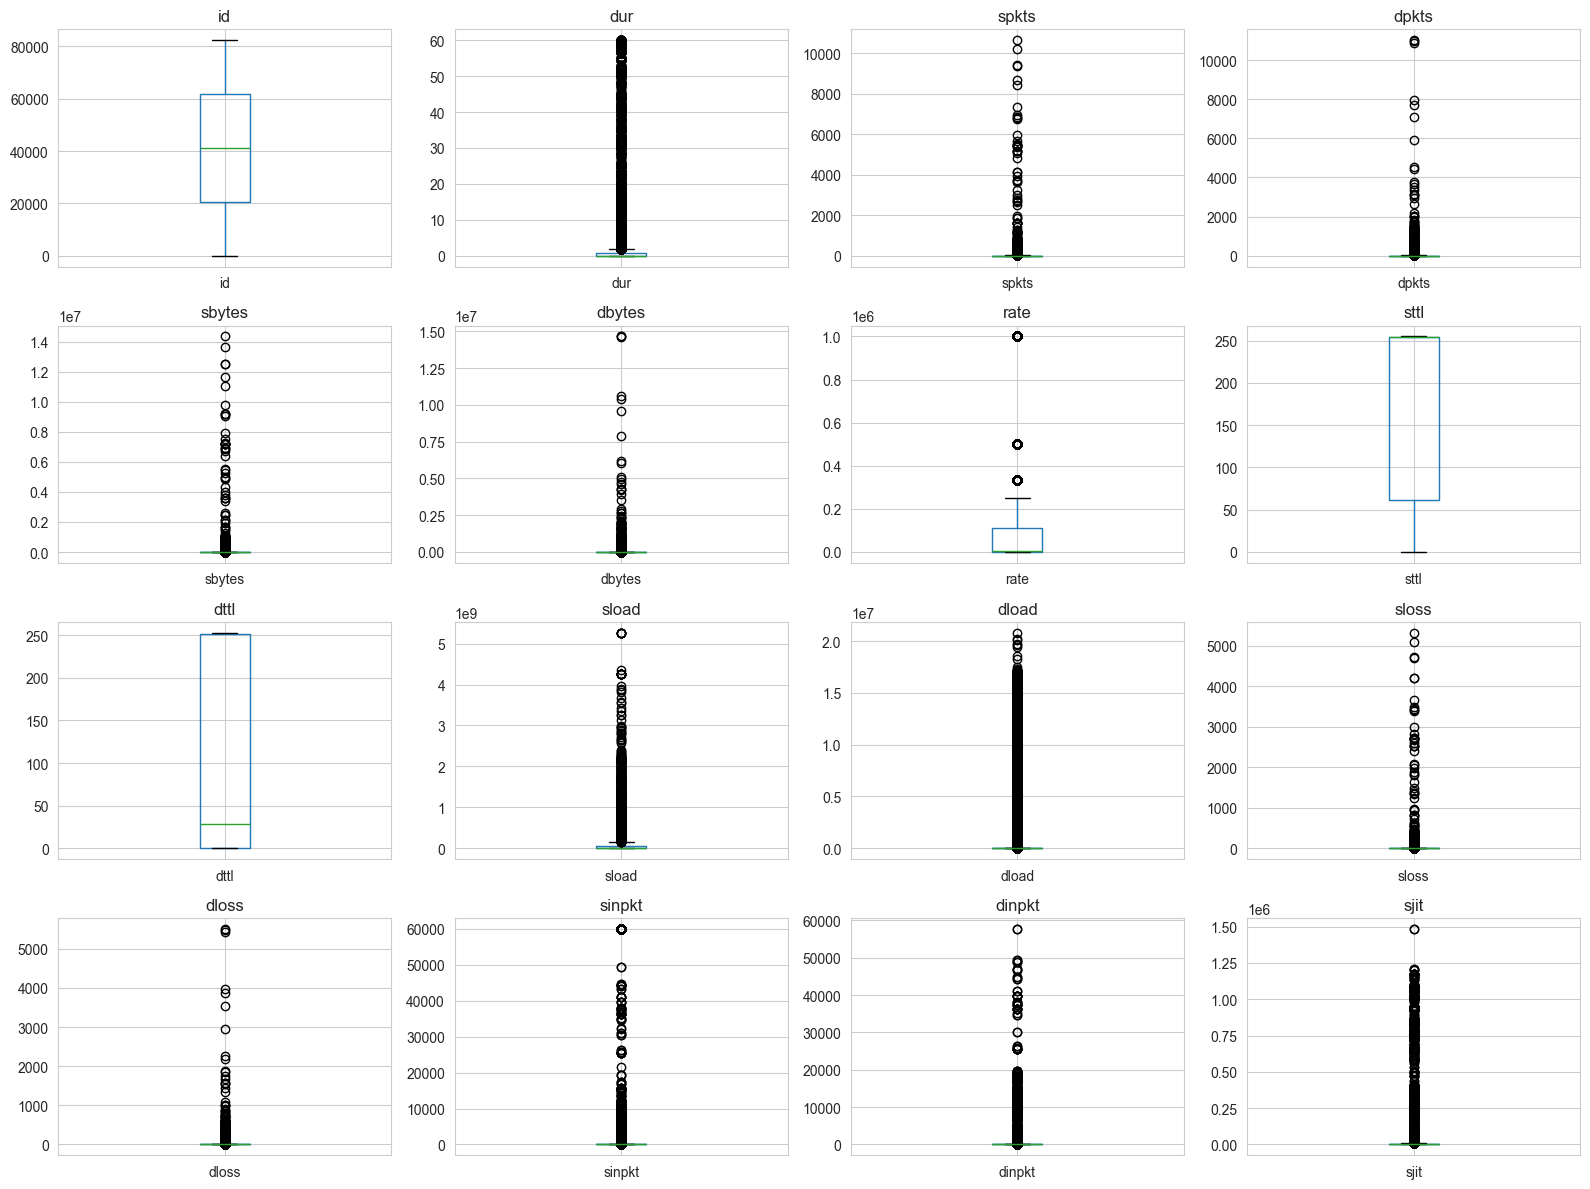

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:16]):
    train.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(col)
    
plt.tight_layout()

In [25]:
correlations = train[numerical_cols].corrwith(train['label']).abs()
correlations.sort_values(ascending=False).head(5)

label               1.000000
sttl                0.504159
swin                0.414504
ct_dst_sport_ltm    0.393668
id                  0.387489
dtype: float64

Correlation Analysis

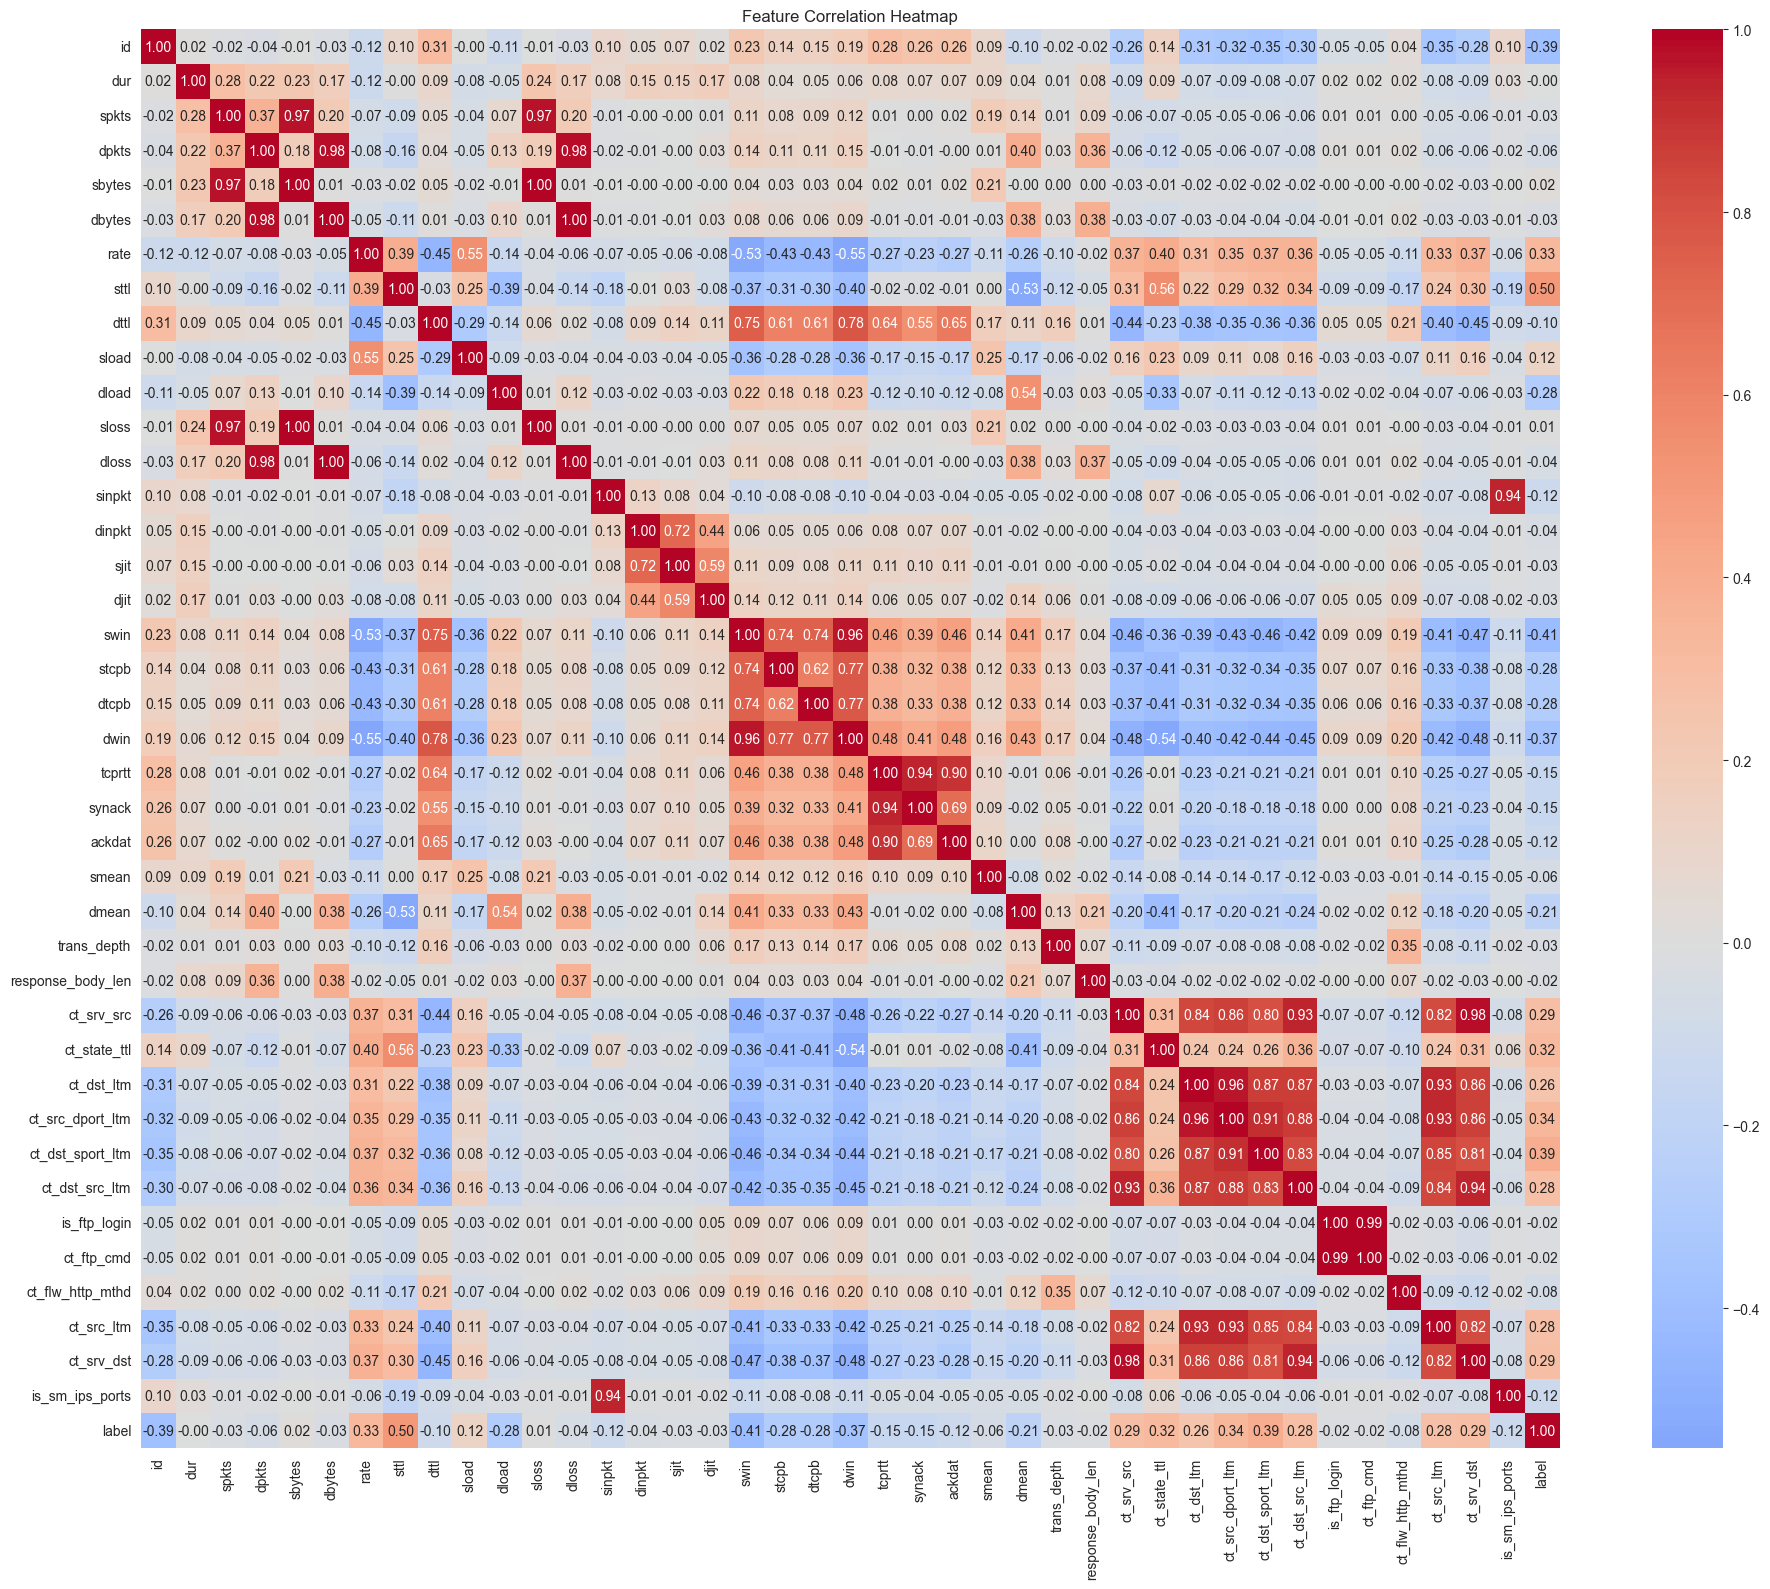

In [26]:
plt.figure(figsize=(20, 16))
correlation_matrix = train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

correlation with target variable

In [27]:
if 'label' in train.columns:
    target_corr = train[numerical_cols].corrwith(train['label']).sort_values(ascending=False)
    print("\nCorrelation with attack label:")
    print(target_corr)


Correlation with attack label:
label                1.000000
sttl                 0.504159
ct_dst_sport_ltm     0.393668
ct_src_dport_ltm     0.341513
rate                 0.328629
ct_state_ttl         0.318517
ct_srv_dst           0.292931
ct_srv_src           0.290195
ct_dst_src_ltm       0.279989
ct_src_ltm           0.276494
ct_dst_ltm           0.257995
sload                0.124548
sbytes               0.020641
sloss                0.006360
dur                 -0.001145
is_ftp_login        -0.016206
response_body_len   -0.016414
ct_ftp_cmd          -0.017138
trans_depth         -0.025804
djit                -0.027131
sjit                -0.027397
spkts               -0.027731
dbytes              -0.032632
dinpkt              -0.037585
dloss               -0.044399
smean               -0.061146
dpkts               -0.061515
ct_flw_http_mthd    -0.075028
dttl                -0.098591
is_sm_ips_ports     -0.117407
ackdat              -0.120522
sinpkt              -0.120768
tcprtt  

 Attack Type Analysis

In [28]:
attack_rates = train.groupby('proto')['label'].mean().sort_values(ascending=False)

In [29]:
attack_rates.head()

proto
3pc          1.0
a/n          1.0
aes-sp3-d    1.0
any          1.0
argus        1.0
Name: label, dtype: float64

Compare normal vs attack traffic characteristics

In [30]:
attack_count = (train['label'] == 0).sum()

In [31]:
normal_count = (train['label'] == 1).sum()

In [32]:
imbalance_ratio = attack_count / normal_count

In [33]:
if imbalance_ratio > 1:
    print(f"Attacks are {imbalance_ratio:.1f}x more than normal")
else:
    print(f"Normal traffic is {1/imbalance_ratio:.1f}x more than attacks")

Normal traffic is 1.2x more than attacks


In [34]:
comparison_cols = ['dur', 'sbytes', 'dbytes', 'rate', 'spkts', 'dpkts']

<Figure size 1200x500 with 0 Axes>

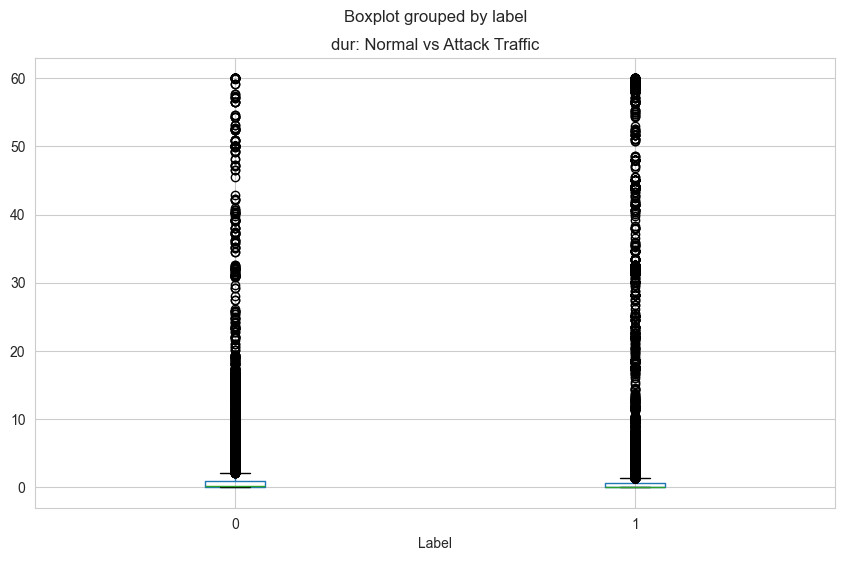

<Figure size 1200x500 with 0 Axes>

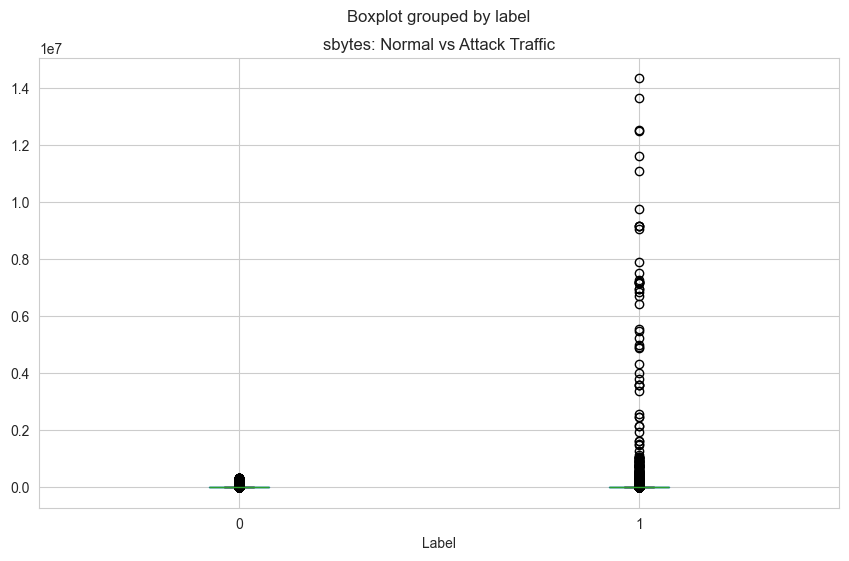

<Figure size 1200x500 with 0 Axes>

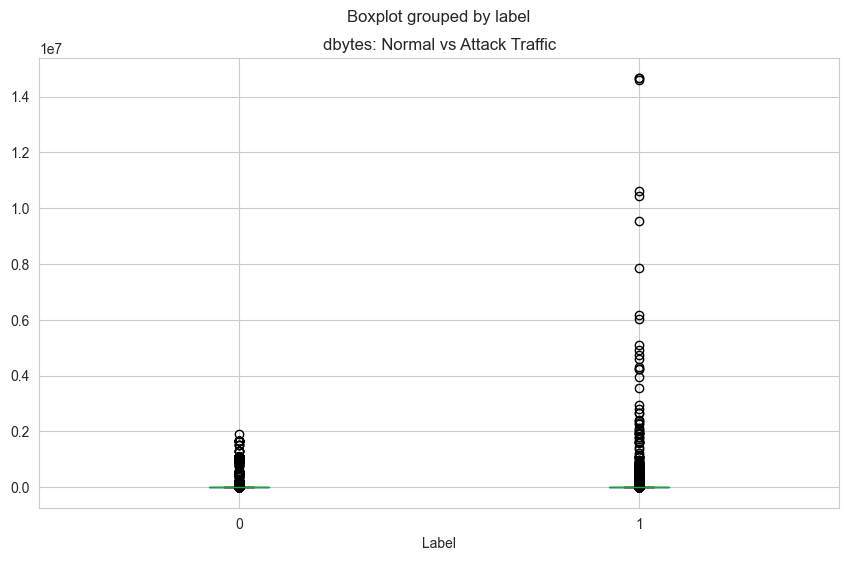

<Figure size 1200x500 with 0 Axes>

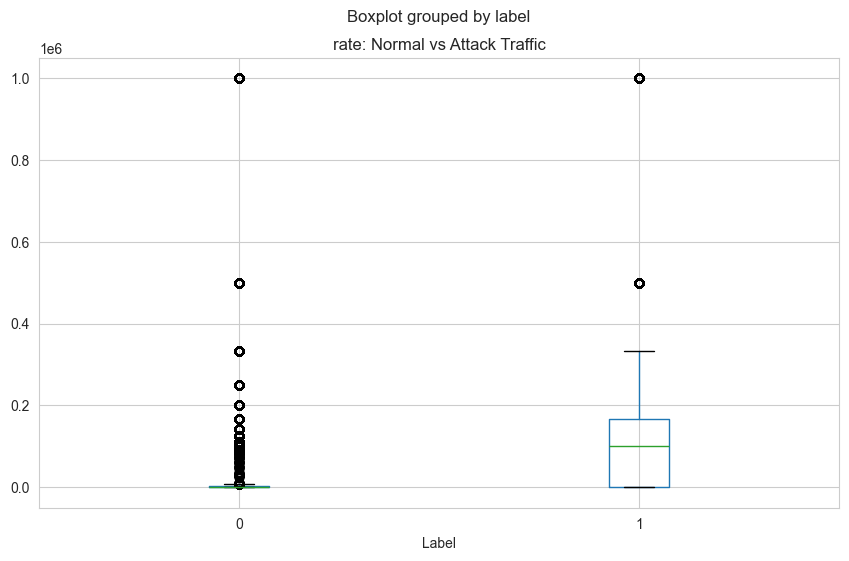

<Figure size 1200x500 with 0 Axes>

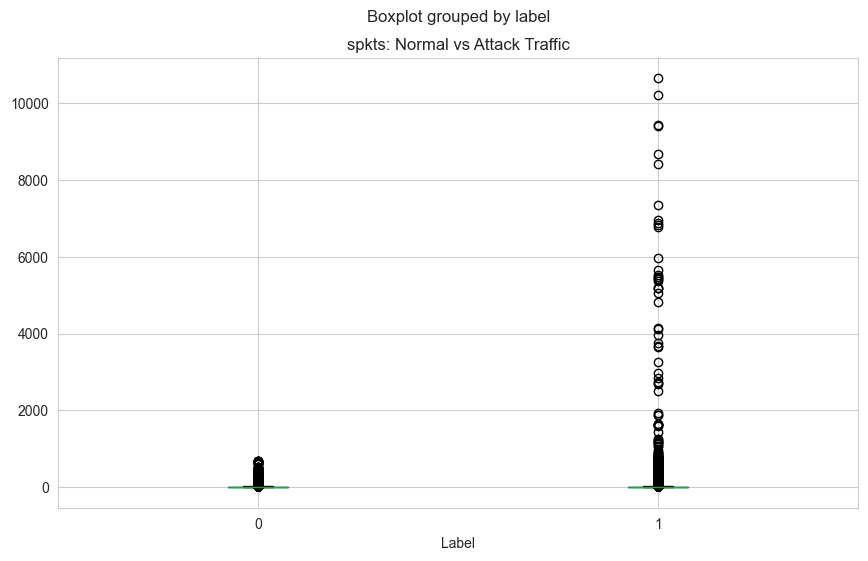

<Figure size 1200x500 with 0 Axes>

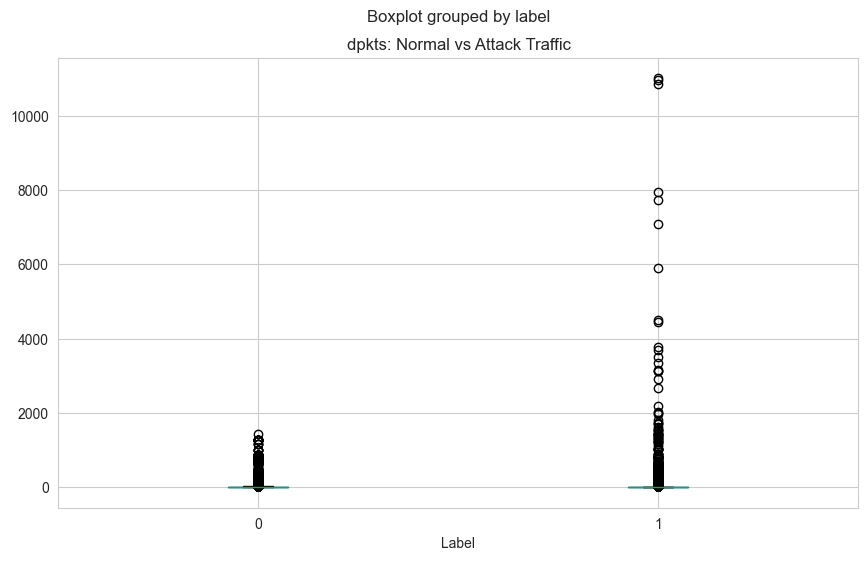

In [35]:
for col in comparison_cols:
    plt.figure(figsize=(12, 5))
    train.boxplot(column=col, by='label')
    plt.title(f'{col}: Normal vs Attack Traffic')
    plt.xlabel('Label')

 Attack categories

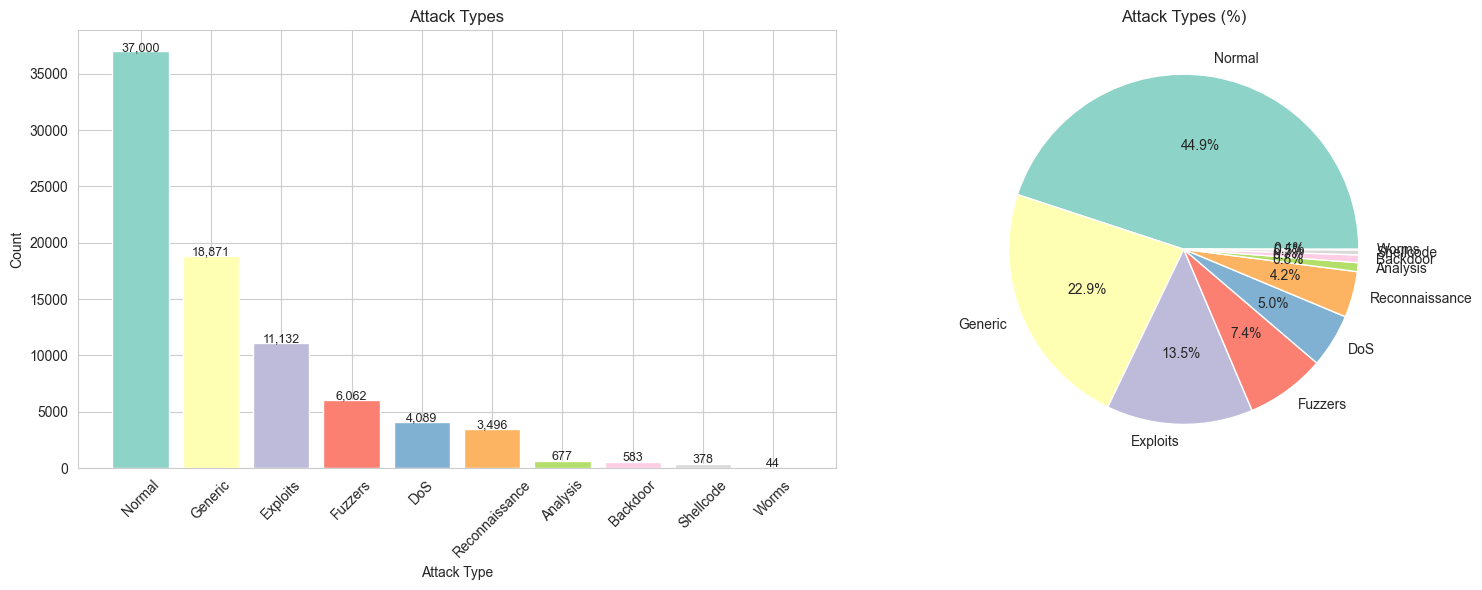

In [36]:
if 'attack_cat' in train.columns:
    attack_counts = train['attack_cat'].value_counts()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
   
    bars = ax1.bar(range(len(attack_counts)), attack_counts.values, 
                   color=plt.cm.Set3(range(len(attack_counts))))
    ax1.set_title('Attack Types')
    ax1.set_xlabel('Attack Type')
    ax1.set_ylabel('Count')
    ax1.set_xticks(range(len(attack_counts)))
    ax1.set_xticklabels(attack_counts.index, rotation=45)
    
    for bar, count in zip(bars, attack_counts.values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 50, f'{count:,}', 
                ha='center', fontsize=9)
   
    ax2.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%',
            colors=plt.cm.Set3(range(len(attack_counts))))
    ax2.set_title('Attack Types (%)')
    
    plt.tight_layout()
    plt.show()

Protocol & Service Analysis

Protocol distribution by attack type

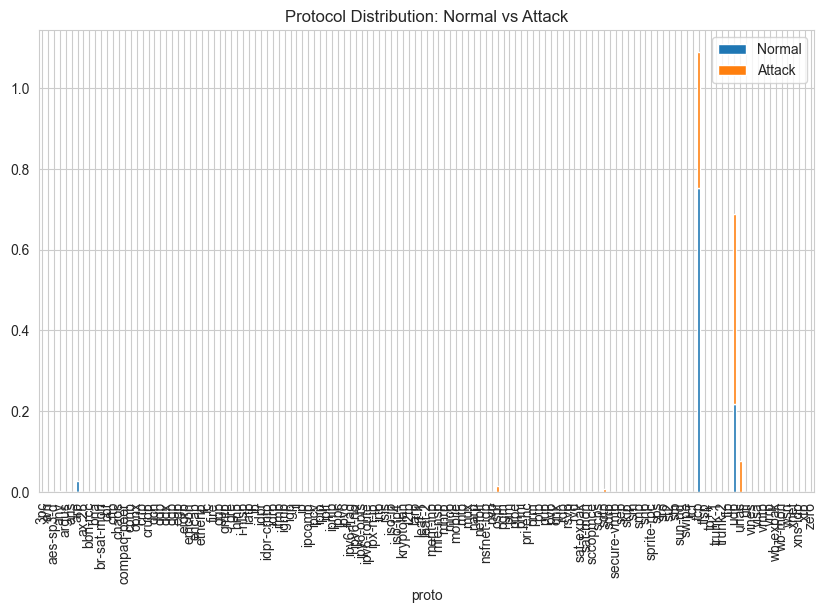

In [37]:
pd.crosstab(train['proto'], train['label'], normalize='columns').plot(
    kind='bar', figsize=(10, 6), stacked=True
)
plt.title('Protocol Distribution: Normal vs Attack')
plt.legend(['Normal', 'Attack'])

Service usage patterns

Text(0.5, 1.0, 'Top Services: Attack Distribution')

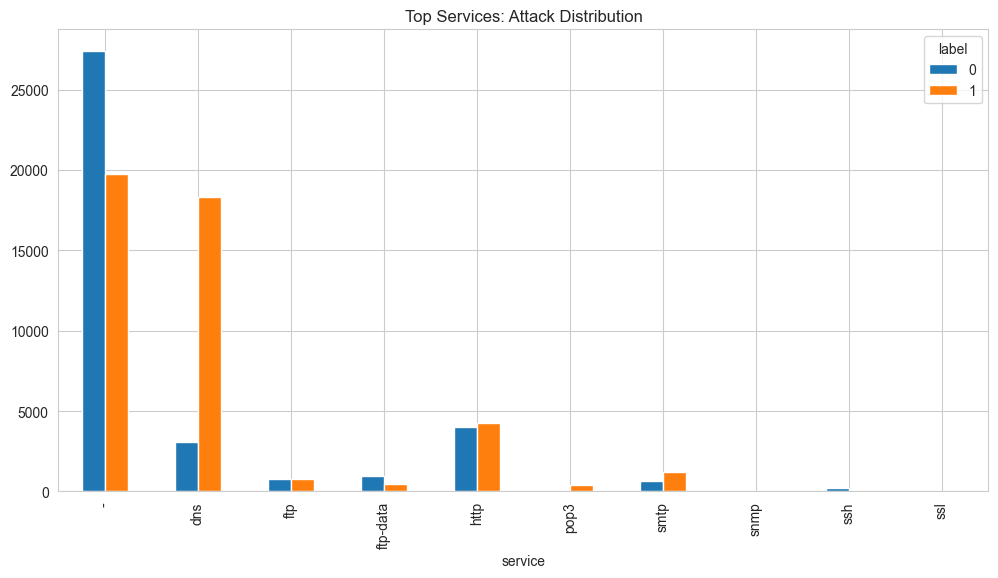

In [38]:
top_services = train['service'].value_counts().head(10).index
service_attack = train[train['service'].isin(top_services)].groupby(
    ['service', 'label']
).size().unstack(fill_value=0)
service_attack.plot(kind='bar', figsize=(12, 6))
plt.title('Top Services: Attack Distribution')

Time-Based Analysis 

Duration analysis

In [39]:
train['dur'].describe()

count    82332.000000
mean         1.006756
std          4.710444
min          0.000000
25%          0.000008
50%          0.014138
75%          0.719360
max         59.999989
Name: dur, dtype: float64

Duration by attack category

Text(0.5, 0.98, '')

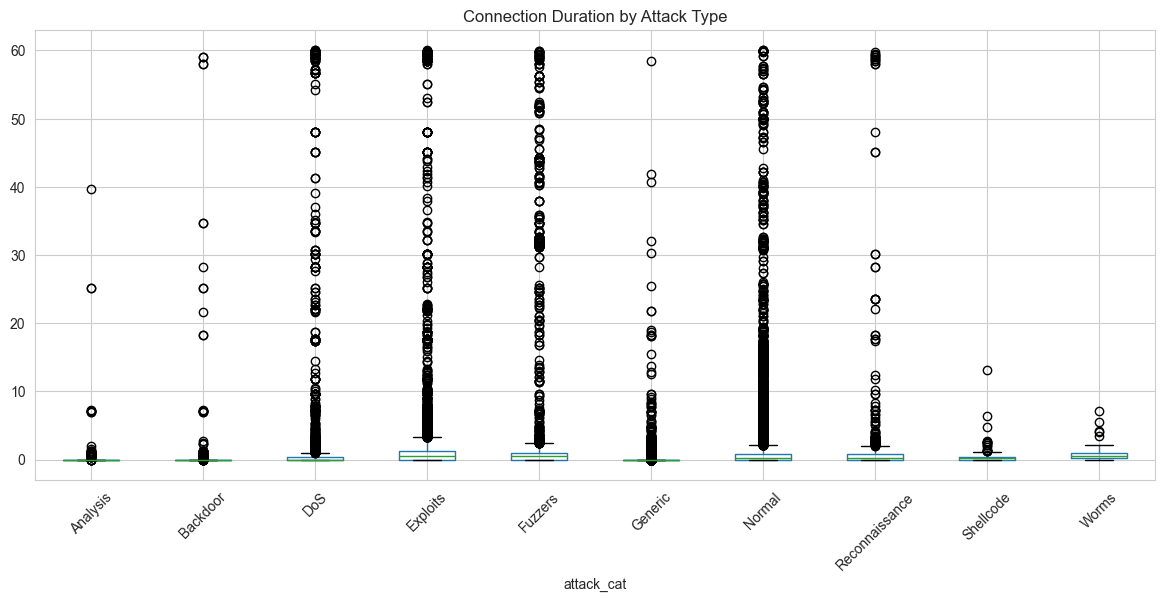

In [40]:
train.boxplot(column='dur', by='attack_cat', figsize=(14, 6), rot=45)
plt.title('Connection Duration by Attack Type')
plt.suptitle('')

Feature engineering insights

1. Packet size ratios

In [41]:
train['bytes_ratio'] = train['sbytes'] / (train['dbytes'] + 1)
train['packet_ratio'] = train['spkts'] / (train['dpkts'] + 1)

2. Traffic intensity

In [42]:
train['traffic_intensity'] = (train['sbytes'] + train['dbytes']) / (train['dur'] + 0.001)


Analyze these new features

<Axes: title={'center': 'bytes_ratio'}, xlabel='label'>

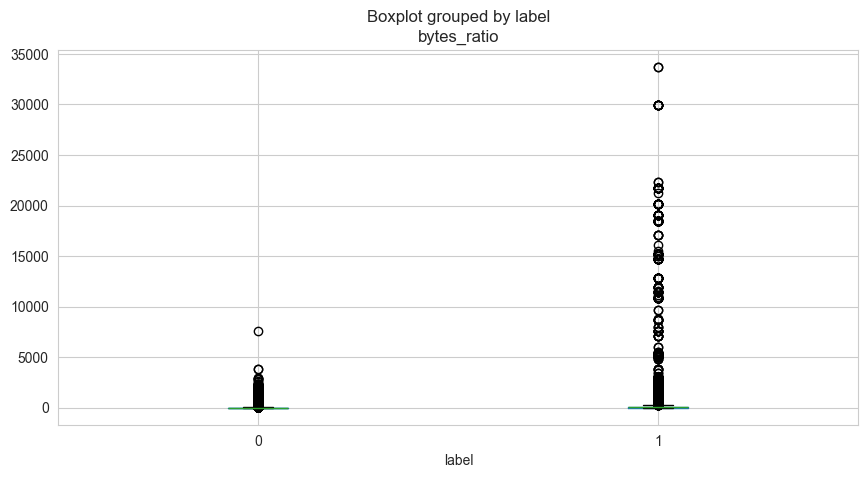

In [43]:
train.boxplot(column='bytes_ratio', by='label', figsize=(10, 5))


##### fill na in attack_cat column by Unknown

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
train["attack_cat"] = train["attack_cat"].fillna("Unknown")
test["attack_cat"] = test["attack_cat"].fillna("Unknown")
train["attack_cat"]

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 82332, dtype: object


##### encode attack column using label encoder because it will be a target column
##### for  multi-class classification 
##### the label column is already encoded in the dataset

In [45]:
lblEncoder = LabelEncoder()
train["attack_cat"] = lblEncoder.fit_transform(train["attack_cat"])
test["attack_cat"] = lblEncoder.transform(test["attack_cat"])
display(test["attack_cat"])

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int64

##### Combine train & test for consistent one-hot encoding
##### for categorical variables 

In [46]:

combined = pd.concat([train, test], axis=0, ignore_index=True)
combined = pd.get_dummies(combined, columns=["proto", "service", "state"], dtype=int)
display(combined.head())

id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  state_CLO  state_CON  state_ECO  state_FIN  state_INT  \
0  180363632.0  ...          0          0          0          0          1   
1  881000000.0  ...          0          0          0          0          1   
2  854400000.0  ...          0          0          0          0          1   
3  600000000.0  ...          0          0          0          0          1   
4  850400000.0  ...          0          0          0          0          1   

   state_PAR  state_REQ  state_RST  state_URN  state_no  
0          0          0          0          0         0  
1          0          0          0          0         0  
2          0          0          0          0         0  
3          0          0          0          0         0  
4          0          0          0          0         0  

[5 rows x 202 columns]

##### data train

In [47]:
train_encoded = combined.iloc[:len(train)].copy()
display(train_encoded.head())

id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  state_CLO  state_CON  state_ECO  state_FIN  state_INT  \
0  180363632.0  ...          0          0          0          0          1   
1  881000000.0  ...          0          0          0          0          1   
2  854400000.0  ...          0          0          0          0          1   
3  600000000.0  ...          0          0          0          0          1   
4  850400000.0  ...          0          0          0          0          1   

   state_PAR  state_REQ  state_RST  state_URN  state_no  
0          0          0          0          0         0  
1          0          0          0          0         0  
2          0          0          0          0         0  
3          0          0          0          0         0  
4          0          0          0          0         0  

[5 rows x 202 columns]

##### data test

In [48]:
test_encoded = combined.iloc[len(train):].copy()
display(test_encoded.head())

id       dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
82332   1  0.121478      6      4     258     172  74.087490   252   254   
82333   2  0.649902     14     38     734   42014  78.473372    62   252   
82334   3  1.623129      8     16     364   13186  14.170161    62   252   
82335   4  1.681642     12     12     628     770  13.677108    62   252   
82336   5  0.449454     10      6     534     268  33.373826   254   252   

              sload  ...  state_CLO  state_CON  state_ECO  state_FIN  \
82332  14158.942380  ...          0          0          0          1   
82333   8395.112305  ...          0          0          0          1   
82334   1572.271851  ...          0          0          0          1   
82335   2740.178955  ...          0          0          0          1   
82336   8561.499023  ...          0          0          0          1   

       state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  
82332          0          0          0          0          0         0  
82333          0          0          0          0          0         0  
82334          0          0          0          0          0         0  
82335          0          0          0          0          0         0  
82336          0          0          0          0          0         0  

[5 rows x 202 columns]


##### after removing label and attack_cat because each one is used separately 
##### as a target for binary-classification and multi-class classification
##### remove id because it has no predictive value

In [49]:
 
cols_to_transform = train_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()
cols_to_remove = ["label", "attack_cat","id"]
cols_to_transform = [c for c in cols_to_transform if c not in cols_to_remove]
display(cols_to_transform)

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'bytes_ratio',
 'packet_ratio',
 'traffic_intensity',
 'proto_3pc',
 'proto_a/n',
 'proto_aes-sp3-d',
 'proto_any',
 'proto_argus',
 'proto_aris',
 'proto_arp',
 'proto_ax.25',
 'proto_bbn-rcc',
 'proto_bna',
 'proto_br-sat-mon',
 'proto_cbt',
 'proto_cftp',
 'proto_chaos',
 'proto_compaq-peer',
 'proto_cphb',
 'proto_cpnx',
 'proto_crtp',
 'proto_crudp',
 'proto_dcn',
 'proto_ddp',
 'proto_ddx',
 'proto_dgp',
 'proto_egp',
 'proto_eigrp',
 'proto_emcon',
 'proto_encap',
 'proto_etherip',
 'proto_

##### Scale numeric features using standart scaler

In [50]:
scaler = StandardScaler()
train_encoded[cols_to_transform] = scaler.fit_transform(train_encoded[cols_to_transform])
test_encoded[cols_to_transform] = scaler.transform(test_encoded[cols_to_transform])
display(train_encoded.head())
display(test_encoded.head())

id       dur     spkts     dpkts    sbytes    dbytes      rate     sttl  \
0   1 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181  0.71944   
1   2 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565  0.71944   
2   3 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209  0.71944   
3   4 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923  0.71944   
4   5 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350  0.71944   

       dttl     sload  ...  state_CLO  state_CON  state_ECO  state_FIN  \
0 -0.820395  0.643913  ...  -0.003485  -0.304403        0.0  -0.956561   
1 -0.820395  4.539351  ...  -0.003485  -0.304403        0.0  -0.956561   
2 -0.820395  4.391459  ...  -0.003485  -0.304403        0.0  -0.956561   
3 -0.820395  2.977031  ...  -0.003485  -0.304403        0.0  -0.956561   
4 -0.820395  4.369219  ...  -0.003485  -0.304403        0.0  -0.956561   

   state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  
0   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
1   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
2   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
3   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
4   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  

[5 rows x 202 columns]

id       dur     spkts     dpkts    sbytes    dbytes      rate  \
82332   1 -0.187941 -0.094586 -0.117206 -0.045070 -0.086233 -0.554011   
82333   2 -0.075759 -0.034846  0.176979 -0.042297  0.190005 -0.553981   
82334   3  0.130853 -0.079651 -0.013376 -0.044453 -0.000315 -0.554414   
82335   4  0.143275 -0.049781 -0.047986 -0.042915 -0.082285 -0.554417   
82336   5 -0.118313 -0.064716 -0.099901 -0.043462 -0.085599 -0.554285   

           sttl      dttl     sload  ...  state_CLO  state_CON  state_ECO  \
82332  0.699738  1.356742 -0.358805  ...  -0.003485  -0.304403        0.0   
82333 -1.171948  1.339599 -0.358837  ...  -0.003485  -0.304403        0.0   
82334 -1.171948  1.339599 -0.358875  ...  -0.003485  -0.304403        0.0   
82335 -1.171948  1.339599 -0.358868  ...  -0.003485  -0.304403        0.0   
82336  0.719440  1.339599 -0.358836  ...  -0.003485  -0.304403        0.0   

       state_FIN  state_INT  state_PAR  state_REQ  state_RST  state_URN  \
82332   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82333   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82334   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82335   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82336   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   

       state_no  
82332       0.0  
82333       0.0  
82334       0.0  
82335       0.0  
82336       0.0  

[5 rows x 202 columns]


##### data train for binary classification

In [51]:

X_binnary_train = train_encoded.drop( cols_to_remove, axis=1)
Y_binnary_train = train_encoded["label"]
display(X_binnary_train.head())
display(Y_binnary_train.head())

dur     spkts     dpkts    sbytes    dbytes      rate     sttl  \
0 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181  0.71944   
1 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565  0.71944   
2 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209  0.71944   
3 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923  0.71944   
4 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350  0.71944   

       dttl     sload     dload  ...  state_CLO  state_CON  state_ECO  \
0 -0.820395  0.643913 -0.263498  ...  -0.003485  -0.304403        0.0   
1 -0.820395  4.539351 -0.263498  ...  -0.003485  -0.304403        0.0   
2 -0.820395  4.391459 -0.263498  ...  -0.003485  -0.304403        0.0   
3 -0.820395  2.977031 -0.263498  ...  -0.003485  -0.304403        0.0   
4 -0.820395  4.369219 -0.263498  ...  -0.003485  -0.304403        0.0   

   state_FIN  state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  
0  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
1  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
2  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
3  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
4  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  

[5 rows x 199 columns]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

##### data test for binary classification

In [52]:
X_binnary_test = test_encoded.drop( cols_to_remove,axis=1)
Y_binnary_test = test_encoded["label"]
display(X_binnary_test.head())
display(Y_binnary_test.head())

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
82332 -0.187941 -0.094586 -0.117206 -0.045070 -0.086233 -0.554011  0.699738   
82333 -0.075759 -0.034846  0.176979 -0.042297  0.190005 -0.553981 -1.171948   
82334  0.130853 -0.079651 -0.013376 -0.044453 -0.000315 -0.554414 -1.171948   
82335  0.143275 -0.049781 -0.047986 -0.042915 -0.082285 -0.554417 -1.171948   
82336 -0.118313 -0.064716 -0.099901 -0.043462 -0.085599 -0.554285  0.719440   

           dttl     sload     dload  ...  state_CLO  state_CON  state_ECO  \
82332  1.356742 -0.358805 -0.259948  ...  -0.003485  -0.304403        0.0   
82333  1.339599 -0.358837 -0.053062  ...  -0.003485  -0.304403        0.0   
82334  1.339599 -0.358875 -0.238036  ...  -0.003485  -0.304403        0.0   
82335  1.339599 -0.358868 -0.262094  ...  -0.003485  -0.304403        0.0   
82336  1.339599 -0.358836 -0.261832  ...  -0.003485  -0.304403        0.0   

       state_FIN  state_INT  state_PAR  state_REQ  state_RST  state_URN  \
82332   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82333   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82334   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82335   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82336   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   

       state_no  
82332       0.0  
82333       0.0  
82334       0.0  
82335       0.0  
82336       0.0  

[5 rows x 199 columns]

82332    0
82333    0
82334    0
82335    0
82336    0
Name: label, dtype: int64

##### data train for multi-class classification

In [53]:

X_multiClass_train = train_encoded.drop( cols_to_remove, axis=1)
Y_multiClass_train = train_encoded["attack_cat"]
display(X_multiClass_train.head())
display(Y_multiClass_train.head())

dur     spkts     dpkts    sbytes    dbytes      rate     sttl  \
0 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181  0.71944   
1 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565  0.71944   
2 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209  0.71944   
3 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923  0.71944   
4 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350  0.71944   

       dttl     sload     dload  ...  state_CLO  state_CON  state_ECO  \
0 -0.820395  0.643913 -0.263498  ...  -0.003485  -0.304403        0.0   
1 -0.820395  4.539351 -0.263498  ...  -0.003485  -0.304403        0.0   
2 -0.820395  4.391459 -0.263498  ...  -0.003485  -0.304403        0.0   
3 -0.820395  2.977031 -0.263498  ...  -0.003485  -0.304403        0.0   
4 -0.820395  4.369219 -0.263498  ...  -0.003485  -0.304403        0.0   

   state_FIN  state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  
0  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
1  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
2  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
3  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  
4  -0.956561   1.187424        0.0  -0.151277  -0.003485        0.0       0.0  

[5 rows x 199 columns]

0    6
1    6
2    6
3    6
4    6
Name: attack_cat, dtype: int64

##### data test for multi-class classification

In [54]:
X_multiClass_test = test_encoded.drop( cols_to_remove,axis=1)
Y_multiClass_test = test_encoded["attack_cat"]
display(X_binnary_test.head())
display(Y_multiClass_test.head())

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
82332 -0.187941 -0.094586 -0.117206 -0.045070 -0.086233 -0.554011  0.699738   
82333 -0.075759 -0.034846  0.176979 -0.042297  0.190005 -0.553981 -1.171948   
82334  0.130853 -0.079651 -0.013376 -0.044453 -0.000315 -0.554414 -1.171948   
82335  0.143275 -0.049781 -0.047986 -0.042915 -0.082285 -0.554417 -1.171948   
82336 -0.118313 -0.064716 -0.099901 -0.043462 -0.085599 -0.554285  0.719440   

           dttl     sload     dload  ...  state_CLO  state_CON  state_ECO  \
82332  1.356742 -0.358805 -0.259948  ...  -0.003485  -0.304403        0.0   
82333  1.339599 -0.358837 -0.053062  ...  -0.003485  -0.304403        0.0   
82334  1.339599 -0.358875 -0.238036  ...  -0.003485  -0.304403        0.0   
82335  1.339599 -0.358868 -0.262094  ...  -0.003485  -0.304403        0.0   
82336  1.339599 -0.358836 -0.261832  ...  -0.003485  -0.304403        0.0   

       state_FIN  state_INT  state_PAR  state_REQ  state_RST  state_URN  \
82332   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82333   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82334   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82335   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   
82336   1.045411  -0.842159        0.0  -0.151277  -0.003485        0.0   

       state_no  
82332       0.0  
82333       0.0  
82334       0.0  
82335       0.0  
82336       0.0  

[5 rows x 199 columns]

82332    6
82333    6
82334    6
82335    6
82336    6
Name: attack_cat, dtype: int64

-------------------------------------------------------------------

#                                                        Support Vector Machine (SVM) for Intrusion Detection

### In this section, we apply a supervised learning model (SVM) to classify network traffic as normal or attack


## Imports and Environment Setup

This section imports all required libraries for data handling, visualization,
and machine learning. A clean visualization style is applied to ensure
professional plots.


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay , precision_score, recall_score, f1_score

from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from tqdm import tqdm
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Dataset Preparation for SVM

The dataset used here has already undergone:
- Feature engineering
- One-hot encoding
- Standard scaling

The target variable is binary:
- 0 → Normal traffic
- 1 → Attack traffic

In [56]:
X_train = X_binnary_train.copy()
y_train = Y_binnary_train.copy()

X_test = X_binnary_test.copy()
y_test = Y_binnary_test.copy()

X_train.shape, X_test.shape

((82332, 199), (175341, 199))

### Data Cleaning Before Modeling

Although the original dataset does not contain missing values, feature engineering operations
(e.g., ratios and traffic intensity) generated infinite and NaN values.
To ensure model stability, all infinite values were replaced with NaN and then filled with zero.
This step guarantees a fully numerical and clean feature matrix for SVM training.


- Check for NaN values

In [57]:
print("NaN values per column in test set:")
print(X_binnary_test.isna().sum())
print("\n" + "="*50)
print(f"Total rows in test set: {len(X_binnary_test)}")
print(f"Rows with ANY NaN: {X_binnary_test.isna().any(axis=1).sum()}")
print(f"Rows WITHOUT NaN: {(~X_binnary_test.isna().any(axis=1)).sum()}")

NaN values per column in test set:
dur          0
spkts        0
dpkts        0
sbytes       0
dbytes       0
            ..
state_PAR    0
state_REQ    0
state_RST    0
state_URN    0
state_no     0
Length: 199, dtype: int64

Total rows in test set: 175341
Rows with ANY NaN: 175341
Rows WITHOUT NaN: 0


- Replace inf and -inf with NaN

In [58]:
train_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
test_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

- Fill NaN with 0 (safe after scaling)

In [59]:
train_encoded.fillna(0, inplace=True)
test_encoded.fillna(0, inplace=True)

- Final sanity check

In [60]:
print("Train NaN:", train_encoded.isna().sum().sum())
print("Test NaN:", test_encoded.isna().sum().sum())

Train NaN: 0
Test NaN: 0


## PCA Visualization

Principal Component Analysis (PCA) is used only for visualization purposes.
It projects high-dimensional network traffic data into two dimensions,
revealing partial separation between normal and attack traffic.


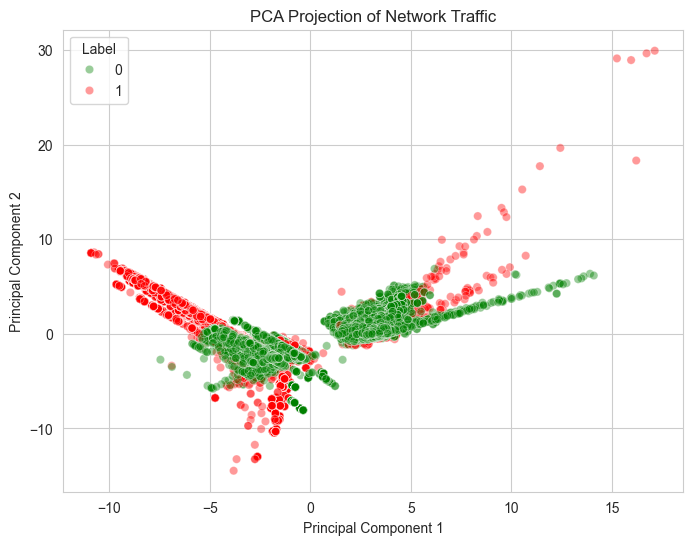

In [61]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y_train,
    palette=["green", "red"],
    alpha=0.4
)

plt.title("PCA Projection of Network Traffic")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label")
plt.show()

## SVM Pipeline Architecture

The pipeline ensures a robust workflow:
1. Missing values are handled using median imputation
2. Features are standardized
3. A linear SVM classifier is trained

This approach prevents data leakage and runtime errors.


In [62]:
svm_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

## Model Training

The SVM model is trained using a pipeline,
ensuring consistent preprocessing during training.

In [63]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('svm',
                 LinearSVC(class_weight='balanced', max_iter=5000,
                           random_state=42))])

## Prediction Phase

The trained pipeline is used to classify network traffic
into normal or attack categories.


In [64]:
y_pred = svm_pipeline.predict(X_test)

## Classification Report

This report summarizes model performance using:
- Precision
- Recall
- F1-score
- Accuracy


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80     56000
           1       0.99      0.79      0.87    119341

    accuracy                           0.85    175341
   macro avg       0.83      0.88      0.84    175341
weighted avg       0.89      0.85      0.85    175341



## Confusion Matrix

The confusion matrix provides a visual assessment
of classification accuracy and error distribution.


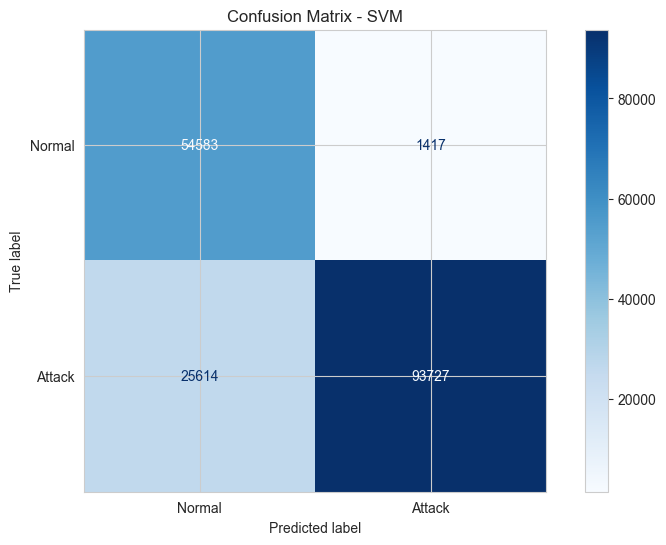

In [66]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Normal", "Attack"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()


In [67]:
# ============================================================================
# SVM METRICS EXTRACTION - COMPREHENSIVE EVALUATION
# ============================================================================

from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

# Extract metrics from predictions
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

# Get decision function scores for ROC-AUC (works with LinearSVC)
try:
    y_decision = svm_pipeline.decision_function(X_test)
    svm_roc_auc = roc_auc_score(y_test, y_decision)
except:
    # Fallback if decision_function not available
    svm_roc_auc = None

# Extract confusion matrix values
svm_tn = cm[0, 0]  # True Negatives
svm_fp = cm[0, 1]  # False Positives
svm_fn = cm[1, 0]  # False Negatives
svm_tp = cm[1, 1]  # True Positives

# Calculate specificity
svm_specificity = svm_tn / (svm_tn + svm_fp) if (svm_tn + svm_fp) > 0 else 0

print("="*80)
print("SVM - COMPREHENSIVE METRICS EXTRACTION")
print("="*80)
print(f"\n Model Performance Metrics:")
print(f"   • Accuracy:   {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"   • Precision:  {svm_precision:.4f} ({svm_precision*100:.2f}%)")
print(f"   • Recall:     {svm_recall:.4f} ({svm_recall*100:.2f}%)")
print(f"   • F1 Score:   {svm_f1:.4f}")
print(f"   • Specificity:{svm_specificity:.4f} ({svm_specificity*100:.2f}%)")
if svm_roc_auc is not None:
    print(f"   • ROC-AUC:    {svm_roc_auc:.4f}")
else:
    print(f"   • ROC-AUC:    Not available (LinearSVC limitation)")

print(f"\n Confusion Matrix Breakdown:")
print(f"   • True Negatives (TN):   {svm_tn:>8,}  (Correctly identified normal traffic)")
print(f"   • False Positives (FP):  {svm_fp:>8,}  (False alarms)")
print(f"   • False Negatives (FN):  {svm_fn:>8,}  (Missed attacks - security risk)")
print(f"   • True Positives (TP):   {svm_tp:>8,}  (Correctly identified attacks)")

print(f"\n Error Analysis:")
print(f"   • False Positive Rate:  {(svm_fp/(svm_fp+svm_tn)*100):6.2f}%")
print(f"   • False Negative Rate:  {(svm_fn/(svm_fn+svm_tp)*100):6.2f}%")

print(f"\n Security Assessment:")
if svm_recall > 0.9:
    print(f"   ✓ Excellent attack detection rate ({svm_recall*100:.1f}%)")
elif svm_recall > 0.8:
    print(f"   ✓ Good attack detection rate ({svm_recall*100:.1f}%)")
else:
    print(f"    Moderate attack detection rate ({svm_recall*100:.1f}%)")

print("\n" + "="*80)

SVM - COMPREHENSIVE METRICS EXTRACTION

 Model Performance Metrics:
   • Accuracy:   0.8458 (84.58%)
   • Precision:  0.9851 (98.51%)
   • Recall:     0.7854 (78.54%)
   • F1 Score:   0.8740
   • Specificity:0.9747 (97.47%)
   • ROC-AUC:    0.9774

 Confusion Matrix Breakdown:
   • True Negatives (TN):     54,583  (Correctly identified normal traffic)
   • False Positives (FP):     1,417  (False alarms)
   • False Negatives (FN):    25,614  (Missed attacks - security risk)
   • True Positives (TP):     93,727  (Correctly identified attacks)

 Error Analysis:
   • False Positive Rate:    2.53%
   • False Negative Rate:   21.46%

 Security Assessment:
    Moderate attack detection rate (78.5%)




## Interpretation of Results
#### - True Positives: Correctly detected attacks
#### - True Negatives: Correctly identified normal traffic
#### - False Positives: Normal traffic classified as attack
#### - False Negatives: Attacks classified as normal
##
#### A low number of false negatives is critical in intrusion detection systems , as missing an attack can lead to serious security issues.


---

#  PART 3: DECISION TREE CLASSIFICATION

## What is a Decision Tree?

A **Decision Tree** is a fundamental machine learning algorithm that mimics human decision-making. It recursively splits data into subsets based on feature values, creating a tree-like model of decisions.

### Visual Analogy:
```
Start: All Network Traffic
         |
    Is bytes_ratio > 0.5?
    /                    \
 YES                      NO
  |                        |
Is dttl < -0.2?        Is ct_dst_src_ltm > 0.3?
 / \                    /     \
Y   N                  Y       N
|   |                  |       |
🔴 🟢               🔴      🟢
ATTACK NORMAL      ATTACK  NORMAL
```


## Step 1: Import Decision Tree Libraries

We need to import several key components for building and evaluating our decision tree models.

In [68]:
# Import Decision Tree Classifier and related tools
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

# Display settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



---

## Step 2: Train Binary Classification Decision Tree

### Problem Definition:
Classify network packets as **Normal (0)** or **Attack (1)**

### Decision Tree Parameters Explained:

| Parameter | Value | Why? |
|-----------|-------|------|
| `max_depth` | 10 | Prevents overfitting while keeping tree interpretable |
| `min_samples_split` | 5 | Requires at least 5 samples to split a node (reduces noise) |
| `min_samples_leaf` | 2 | Leaf nodes need minimum 2 samples (avoids single-sample leaves) |
| `criterion` | 'gini' | Uses Gini impurity (balanced approach) |
| `random_state` | 42 | Ensures reproducibility across runs |

**Learning Algorithm:**
1. Start with all data
2. Find best feature to split on (minimizes impurity)
3. Recursively split child nodes
4. Stop when max_depth reached or min_samples_leaf requirement met
5. Assign class based on majority vote in each leaf

In [69]:
# ============================================================================
# BINARY CLASSIFICATION: Decision Tree (Normal vs Attack)
# ============================================================================

print("="*70)
print("TRAINING BINARY CLASSIFICATION DECISION TREE")
print("="*70)

# Initialize and train the decision tree
dt_binary = DecisionTreeClassifier(
    max_depth=10,              # Limit tree depth to prevent overfitting
    min_samples_split=5,       # Min samples needed to split a node
    min_samples_leaf=2,        # Min samples required at a leaf node
    criterion='gini',          # Use Gini impurity for split quality
    random_state=42            # For reproducibility
)

# Train the model on training data
dt_binary.fit(X_binnary_train, Y_binnary_train)

print(f"  Model trained on {len(X_binnary_train):,} samples")
print(f"   Features used: {X_binnary_train.shape[1]}")
print(f"   Tree depth: {dt_binary.get_depth()}")
print(f"   Number of leaves: {dt_binary.get_n_leaves()}")

# Make predictions on test set
y_pred_dt_binary = dt_binary.predict(X_binnary_test)

# Calculate performance metrics
dt_binary_accuracy = accuracy_score(Y_binnary_test, y_pred_dt_binary)
dt_binary_precision = precision_score(Y_binnary_test, y_pred_dt_binary, zero_division=0)
dt_binary_recall = recall_score(Y_binnary_test, y_pred_dt_binary, zero_division=0)
dt_binary_f1 = f1_score(Y_binnary_test, y_pred_dt_binary, zero_division=0)

print(f"\n{'─'*70}")
print("BINARY CLASSIFICATION RESULTS")
print(f"{'─'*70}")
print(f"Accuracy:  {dt_binary_accuracy:.4f} ({dt_binary_accuracy*100:.2f}%)")
print(f"Precision: {dt_binary_precision:.4f} (False Alarm Rate: {(1-dt_binary_precision)*100:.2f}%)")
print(f"Recall:    {dt_binary_recall:.4f} (Detection Rate: {dt_binary_recall*100:.2f}%)")
print(f"F1 Score:  {dt_binary_f1:.4f} (Balanced metric)")
print(f"{'─'*70}")

TRAINING BINARY CLASSIFICATION DECISION TREE
  Model trained on 82,332 samples
   Features used: 199
   Tree depth: 10
   Number of leaves: 230

──────────────────────────────────────────────────────────────────────
BINARY CLASSIFICATION RESULTS
──────────────────────────────────────────────────────────────────────
Accuracy:  0.5996 (59.96%)
Precision: 0.9818 (False Alarm Rate: 1.82%)
Recall:    0.4195 (Detection Rate: 41.95%)
F1 Score:  0.5878 (Balanced metric)
──────────────────────────────────────────────────────────────────────


---

## Step 3: Train Multi-Class Classification Decision Tree

### Objective:
Classify into **10 attack categories** (classes 0-9) for detailed threat intelligence

### Why Multi-class Matters:
- **Binary only** tells you IF there's an attack
- **Multi-class** tells you WHAT TYPE of attack
- Different attacks require different responses
- Enables targeted security measures

In [70]:
# ============================================================================
# MULTI-CLASS CLASSIFICATION: Decision Tree (10 Attack Types)
# ============================================================================

print("\n" + "="*70)
print("TRAINING MULTI-CLASS CLASSIFICATION DECISION TREE")
print("="*70)

# Initialize with slightly larger depth for multi-class complexity
dt_multiclass = DecisionTreeClassifier(
    max_depth=15,              # Deeper tree for 10 classes
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)

# Train on multi-class data
dt_multiclass.fit(X_multiClass_train, Y_multiClass_train)

print(f"  Model trained on {len(X_multiClass_train):,} samples")
print(f"   Classes: {sorted(Y_multiClass_train.unique())}")
print(f"   Tree depth: {dt_multiclass.get_depth()}")
print(f"   Number of leaves: {dt_multiclass.get_n_leaves()}")

# Make predictions
y_pred_dt_multiclass = dt_multiclass.predict(X_multiClass_test)

# Calculate metrics for multi-class (using macro averaging for balanced view)
dt_multiclass_accuracy = accuracy_score(Y_multiClass_test, y_pred_dt_multiclass)
dt_multiclass_precision_macro = precision_score(Y_multiClass_test, y_pred_dt_multiclass, 
                                                average='macro', zero_division=0)
dt_multiclass_recall_macro = recall_score(Y_multiClass_test, y_pred_dt_multiclass, 
                                          average='macro', zero_division=0)
dt_multiclass_f1_macro = f1_score(Y_multiClass_test, y_pred_dt_multiclass, 
                                   average='macro', zero_division=0)

print(f"\n{'─'*70}")
print("MULTI-CLASS CLASSIFICATION RESULTS")
print(f"{'─'*70}")
print(f"Accuracy (Macro):  {dt_multiclass_accuracy:.4f}")
print(f"Precision (Macro): {dt_multiclass_precision_macro:.4f}")
print(f"Recall (Macro):    {dt_multiclass_recall_macro:.4f}")
print(f"F1 Score (Macro):  {dt_multiclass_f1_macro:.4f}")
print(f"{'─'*70}")


TRAINING MULTI-CLASS CLASSIFICATION DECISION TREE
  Model trained on 82,332 samples
   Classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
   Tree depth: 15
   Number of leaves: 1215

──────────────────────────────────────────────────────────────────────
MULTI-CLASS CLASSIFICATION RESULTS
──────────────────────────────────────────────────────────────────────
Accuracy (Macro):  0.7212
Precision (Macro): 0.5256
Recall (Macro):    0.4129
F1 Score (Macro):  0.4237
──────────────────────────────────────────────────────────────────────


---

## Step 4: Hyperparameter Tuning with GridSearchCV

### The Challenge:
How do we find the **optimal hyperparameters** without manual trial-and-error?

### The Solution: GridSearchCV

**What it does:**
1. **Defines a grid** of parameter combinations to test
2. **Uses k-fold cross-validation** to evaluate each combination
3. **Finds the best combination** based on specified metric
4. **Trains final model** with best parameters

### Example Grid:
```
max_depth:        [8, 10, 12, 15, 20]        →  5 options
min_samples_split: [2, 5, 10]                 →  3 options  
min_samples_leaf:  [1, 2, 4]                  →  3 options
────────────────────────────────────────────────
Total combinations:  5 × 3 × 3 = 45 different models
```

### Why Cross-Validation?
- **Without it**: Model might memorize training data
- **With 5-fold CV**: Tests on 5 different train/validation splits
- **Result**: Better estimate of real-world performance

### Performance Metric: F1 Score
- **Why F1?** Balances Precision & Recall (important for imbalanced data)
- **Formula**: F1 = 2 × (Precision × Recall) / (Precision + Recall)

In [71]:
# ============================================================================
# HYPERPARAMETER TUNING: GridSearchCV for Binary Classification
# ============================================================================

print("\n" + "="*70)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*70)
print("\n Testing different hyperparameter combinations...\n")

# Define the parameter grid to search
param_grid = {
    'max_depth': [8, 10, 12, 15, 20],      # Tree depth range
    'min_samples_split': [2, 5, 10],       # Min samples to split
    'min_samples_leaf': [1, 2, 4]          # Min samples in leaf
}

# Calculate total combinations
total_combos = len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])
print(f"Total parameter combinations to test: {total_combos}")
print(f"With 5-fold CV: {total_combos * 5} = {total_combos * 5} model trainings\n")

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, criterion='gini'),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='f1',            # Optimize for F1 score
    n_jobs=-1,              # Use all CPU cores
    verbose=1
)

# Fit the grid search (this will take some time)
print("Training in progress...\n")
grid_search.fit(X_binnary_train, Y_binnary_train)

print(f"\n{'='*70}")
print("GRID SEARCH RESULTS")
print(f"{'='*70}")
print(f" Best parameters found:")
print(f"   max_depth:          {grid_search.best_params_['max_depth']}")
print(f"   min_samples_split:  {grid_search.best_params_['min_samples_split']}")
print(f"   min_samples_leaf:   {grid_search.best_params_['min_samples_leaf']}")
print(f"\n Best cross-validation F1 score: {grid_search.best_score_:.4f}")
print(f"{'='*70}")

# Use the best model for predictions
best_dt_binary = grid_search.best_estimator_
y_pred_best_dt = best_dt_binary.predict(X_binnary_test)

# Calculate metrics with tuned model
dt_tuned_accuracy = accuracy_score(Y_binnary_test, y_pred_best_dt)
dt_tuned_precision = precision_score(Y_binnary_test, y_pred_best_dt, zero_division=0)
dt_tuned_recall = recall_score(Y_binnary_test, y_pred_best_dt, zero_division=0)
dt_tuned_f1 = f1_score(Y_binnary_test, y_pred_best_dt, zero_division=0)

print(f"\n TUNED MODEL PERFORMANCE ON TEST SET:")
print(f"   Accuracy:  {dt_tuned_accuracy:.4f}")
print(f"   Precision: {dt_tuned_precision:.4f}")
print(f"   Recall:    {dt_tuned_recall:.4f}")
print(f"   F1 Score:  {dt_tuned_f1:.4f}")

# Compare improvement
print(f"\n IMPROVEMENT FROM TUNING:")
print(f"   Accuracy change:  {(dt_tuned_accuracy - dt_binary_accuracy):+.4f}")
print(f"   F1 Score change:  {(dt_tuned_f1 - dt_binary_f1):+.4f}")


HYPERPARAMETER TUNING WITH GRIDSEARCHCV

 Testing different hyperparameter combinations...

Total parameter combinations to test: 45
With 5-fold CV: 225 = 225 model trainings

Training in progress...

Fitting 5 folds for each of 45 candidates, totalling 225 fits

GRID SEARCH RESULTS
 Best parameters found:
   max_depth:          12
   min_samples_split:  5
   min_samples_leaf:   1

 Best cross-validation F1 score: 0.9530

 TUNED MODEL PERFORMANCE ON TEST SET:
   Accuracy:  0.6281
   Precision: 0.9785
   Recall:    0.4638
   F1 Score:  0.6294

 IMPROVEMENT FROM TUNING:
   Accuracy change:  +0.0285
   F1 Score change:  +0.0415


---

## Step 5: Visualize Decision Tree Structure

### What We'll Show:
- **Tree diagram** showing splits and decision rules
- **Node information**: Feature, split threshold, samples, class prediction
- **Color coding**: Orange = Normal traffic, Blue = Attack traffic

### Why Visualization Matters:
 **Interpretability** - See exactly WHY a packet gets classified  
 **Debugging** - Identify suspicious splitting patterns  
 **Communication** - Explain model to non-technical stakeholders  
 **Validation** - Check if splits make security sense


VISUALIZATION 1: DECISION TREE STRUCTURE


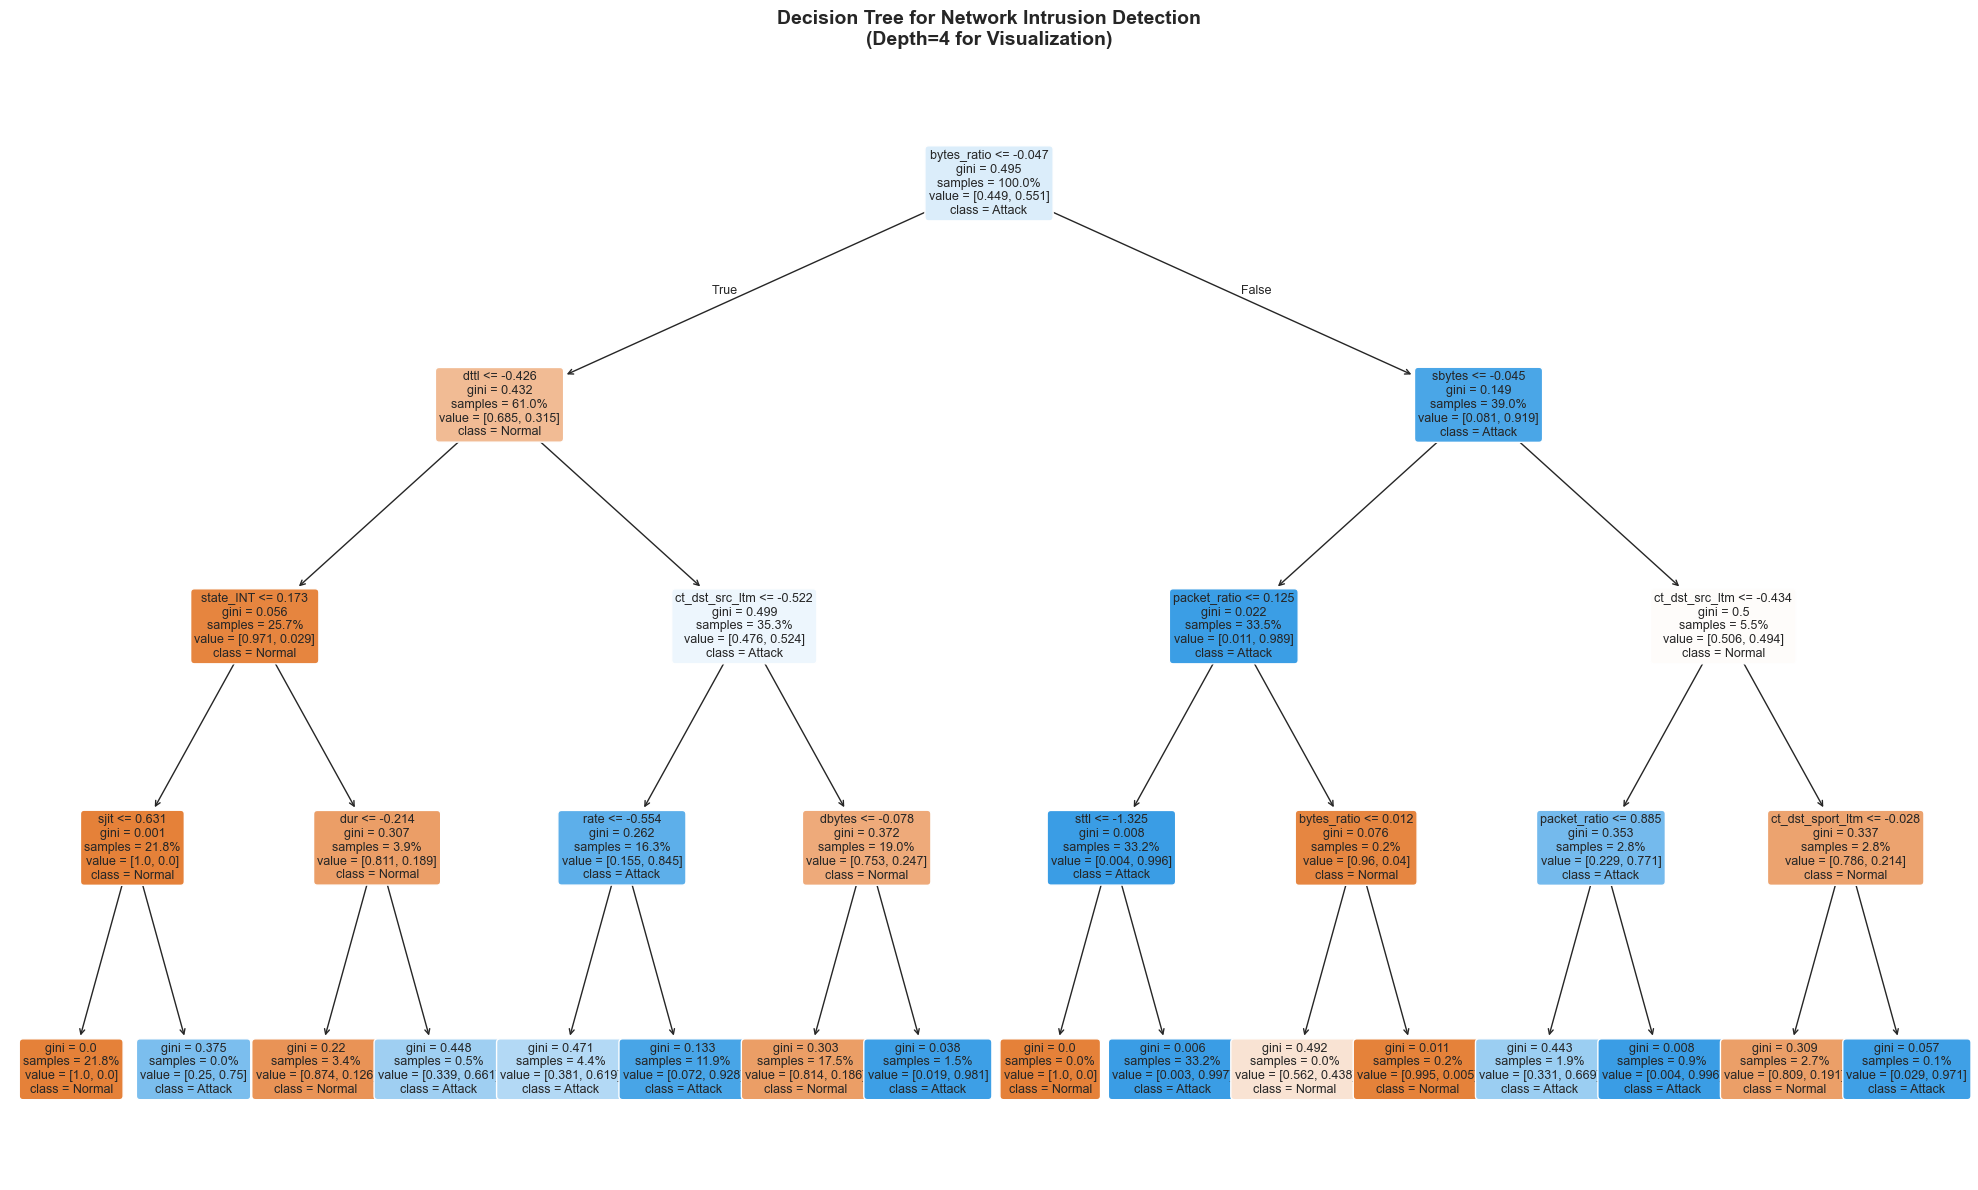


 How to Read the Tree:
──────────────────────────────────────────────────────────────────────
Each box (node) shows:
  • Split condition: e.g., 'bytes_ratio <= 0.047'
  • Gini impurity: Measure of node purity (0=pure, 0.5=mixed)
  • Samples: Number of training samples reaching this node
  • Value: [samples in class 0, samples in class 1]
  • Class: Predicted class for samples reaching this leaf

Color meaning:
  🟠 Orange: Mostly Normal traffic
  🔵 Blue: Mostly Attack traffic
  Purple: Mixed traffic
──────────────────────────────────────────────────────────────────────


In [72]:
# ============================================================================
# VISUALIZATION 1: Decision Tree Structure (Shallow for Readability)
# ============================================================================

print("\n" + "="*70)
print("VISUALIZATION 1: DECISION TREE STRUCTURE")
print("="*70)

# Create a shallow tree for visualization (easier to understand)
dt_viz = DecisionTreeClassifier(max_depth=4, min_samples_split=5, 
                                min_samples_leaf=2, random_state=42)
dt_viz.fit(X_binnary_train, Y_binnary_train)

# Create figure for tree visualization
fig, ax = plt.subplots(figsize=(20, 12))

# Plot the tree
plot_tree(dt_viz,
          feature_names=X_binnary_train.columns,
          class_names=['Normal', 'Attack'],
          filled=True,           # Color nodes by class
          rounded=True,          # Rounded corners
          fontsize=9,
          ax=ax,
          proportion=True)       # Show proportions instead of counts

plt.title('Decision Tree for Network Intrusion Detection\n(Depth=4 for Visualization)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n How to Read the Tree:")
print("─" * 70)
print("Each box (node) shows:")
print("  • Split condition: e.g., 'bytes_ratio <= 0.047'")
print("  • Gini impurity: Measure of node purity (0=pure, 0.5=mixed)")
print("  • Samples: Number of training samples reaching this node")
print("  • Value: [samples in class 0, samples in class 1]")
print("  • Class: Predicted class for samples reaching this leaf")
print("\nColor meaning:")
print("  🟠 Orange: Mostly Normal traffic")
print("  🔵 Blue: Mostly Attack traffic")
print("  Purple: Mixed traffic")
print("─" * 70)

---

## Step 6: Feature Importance Analysis

### What is Feature Importance?
A measure of how much each feature contributes to the model's predictions

### How It's Calculated:
- **Gini-based**: Sum of weighted impurity decreases across all splits
- **Higher value** = Feature is more important for splitting
- **Lower value** = Feature rarely used in splits

### Why This Matters for Security:
 **Identifies key attack signatures** - Which features distinguish attacks?  
 **Validates domain knowledge** - Do important features make security sense?  
 **Feature selection** - Can we detect attacks with fewer features?  
 **Anomaly patterns** - Unusual feature combinations signal attacks


VISUALIZATION 2: FEATURE IMPORTANCE ANALYSIS


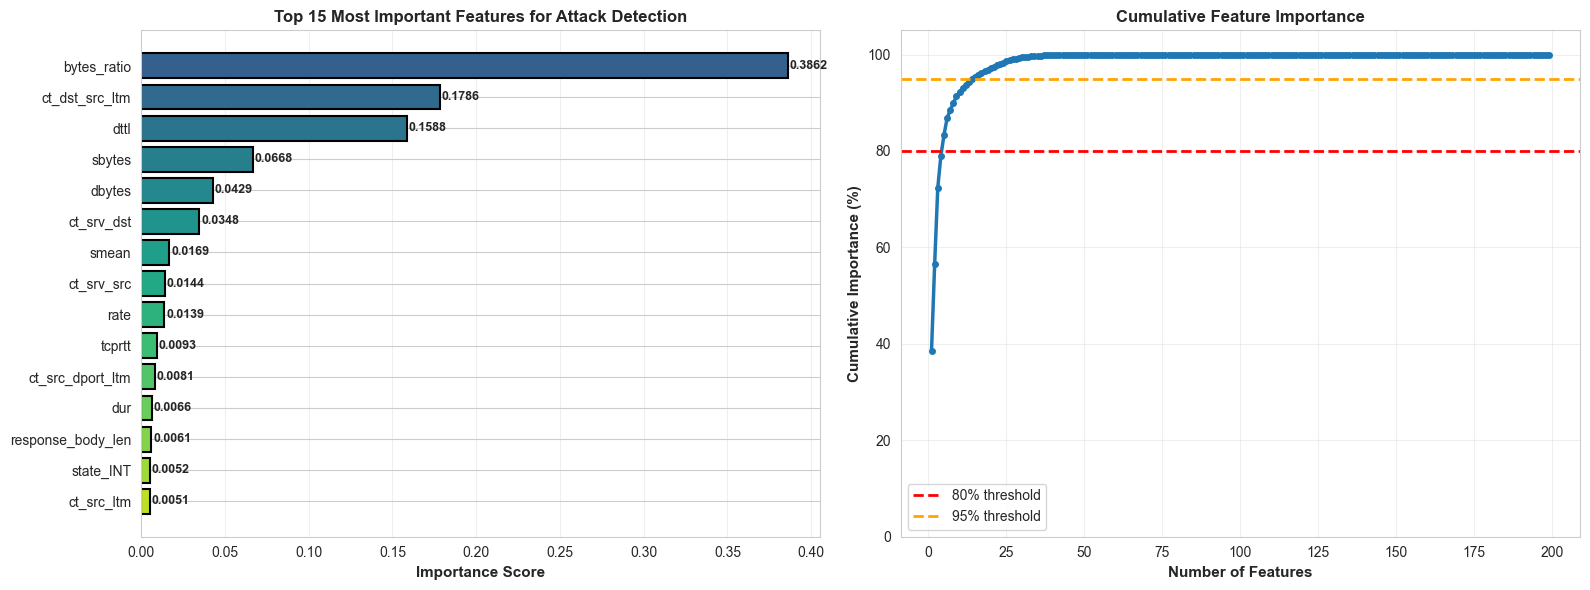


 FEATURE IMPORTANCE INSIGHTS:
──────────────────────────────────────────────────────────────────────
Total features: 199

Top 5 Most Important Features:
  1. bytes_ratio          → Importance: 0.3862
  2. ct_dst_src_ltm       → Importance: 0.1786
  3. dttl                 → Importance: 0.1588
  4. sbytes               → Importance: 0.0668
  5. dbytes               → Importance: 0.0429

 Features needed for 80% importance: 5 (2.5%)
 Features needed for 95% importance: 15 (7.5%)

 Insight: Could potentially reduce from 199 features to 5 with minimal accuracy loss!
──────────────────────────────────────────────────────────────────────


In [73]:
# ============================================================================
# VISUALIZATION 2: Feature Importance from Tuned Model
# ============================================================================

print("\n" + "="*70)
print("VISUALIZATION 2: FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Extract feature importances from the best tuned model
feature_importance = pd.DataFrame({
    'feature': X_binnary_train.columns,
    'importance': best_dt_binary.feature_importances_
}).sort_values('importance', ascending=False)

# Get top 15 features
top_features = feature_importance.head(15)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 15 Features (Horizontal Bar)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
axes[0].barh(range(len(top_features)), top_features['importance'], color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['feature'], fontsize=10)
axes[0].set_xlabel('Importance Score', fontsize=11, fontweight='bold')
axes[0].set_title('Top 15 Most Important Features for Attack Detection', 
                  fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_features['importance']):
    axes[0].text(v + 0.001, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

# Plot 2: Cumulative Importance
cumsum_importance = feature_importance['importance'].cumsum() / feature_importance['importance'].sum() * 100
axes[1].plot(range(1, len(cumsum_importance) + 1), cumsum_importance, marker='o', linewidth=2.5, markersize=4)
axes[1].axhline(y=80, color='r', linestyle='--', linewidth=2, label='80% threshold')
axes[1].axhline(y=95, color='orange', linestyle='--', linewidth=2, label='95% threshold')
axes[1].set_xlabel('Number of Features', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Cumulative Importance (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Cumulative Feature Importance', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 105])

plt.tight_layout()
plt.show()

# Print analysis
print(f"\n FEATURE IMPORTANCE INSIGHTS:")
print(f"{'─'*70}")
print(f"Total features: {len(feature_importance)}")
print(f"\nTop 5 Most Important Features:")
for idx, (i, row) in enumerate(top_features.head(5).iterrows(), 1):
    print(f"  {idx}. {row['feature']:20s} → Importance: {row['importance']:.4f}")

# How many features for 80% importance?
n_features_80 = (cumsum_importance <= 80).sum() + 1
n_features_95 = (cumsum_importance <= 95).sum() + 1

print(f"\n Features needed for 80% importance: {n_features_80} ({n_features_80/len(feature_importance)*100:.1f}%)")
print(f" Features needed for 95% importance: {n_features_95} ({n_features_95/len(feature_importance)*100:.1f}%)")
print(f"\n Insight: Could potentially reduce from {len(feature_importance)} features to {n_features_80} with minimal accuracy loss!")
print(f"{'─'*70}")

---

## Step 7: Confusion Matrix & Error Analysis

### Understanding the Confusion Matrix:

For **Binary Classification**:
```
                 Predicted Normal    Predicted Attack
Actual Normal         TN                 FP
                   (Correct)         (False Alarm)

Actual Attack         FN                 TP
                   (Missed!)          (Correct)
```

### Key Metrics from Confusion Matrix:

| Metric | Meaning |
|--------|---------|
| **True Positive (TP)** | Caught an attack  |
| **True Negative (TN)** | Correctly identified normal |
| **False Positive (FP)** | Normal traffic flagged as attack  |
| **False Negative (FN)** | Missed an attack  (CRITICAL!) |

### Business Impact:

- **High FP** → Users blocked, productivity lost, helpdesk overhead
- **High FN** → Security breach, data loss, compliance violations
- **Trade-off** → Balance based on risk tolerance


VISUALIZATION 3: CONFUSION MATRIX ANALYSIS


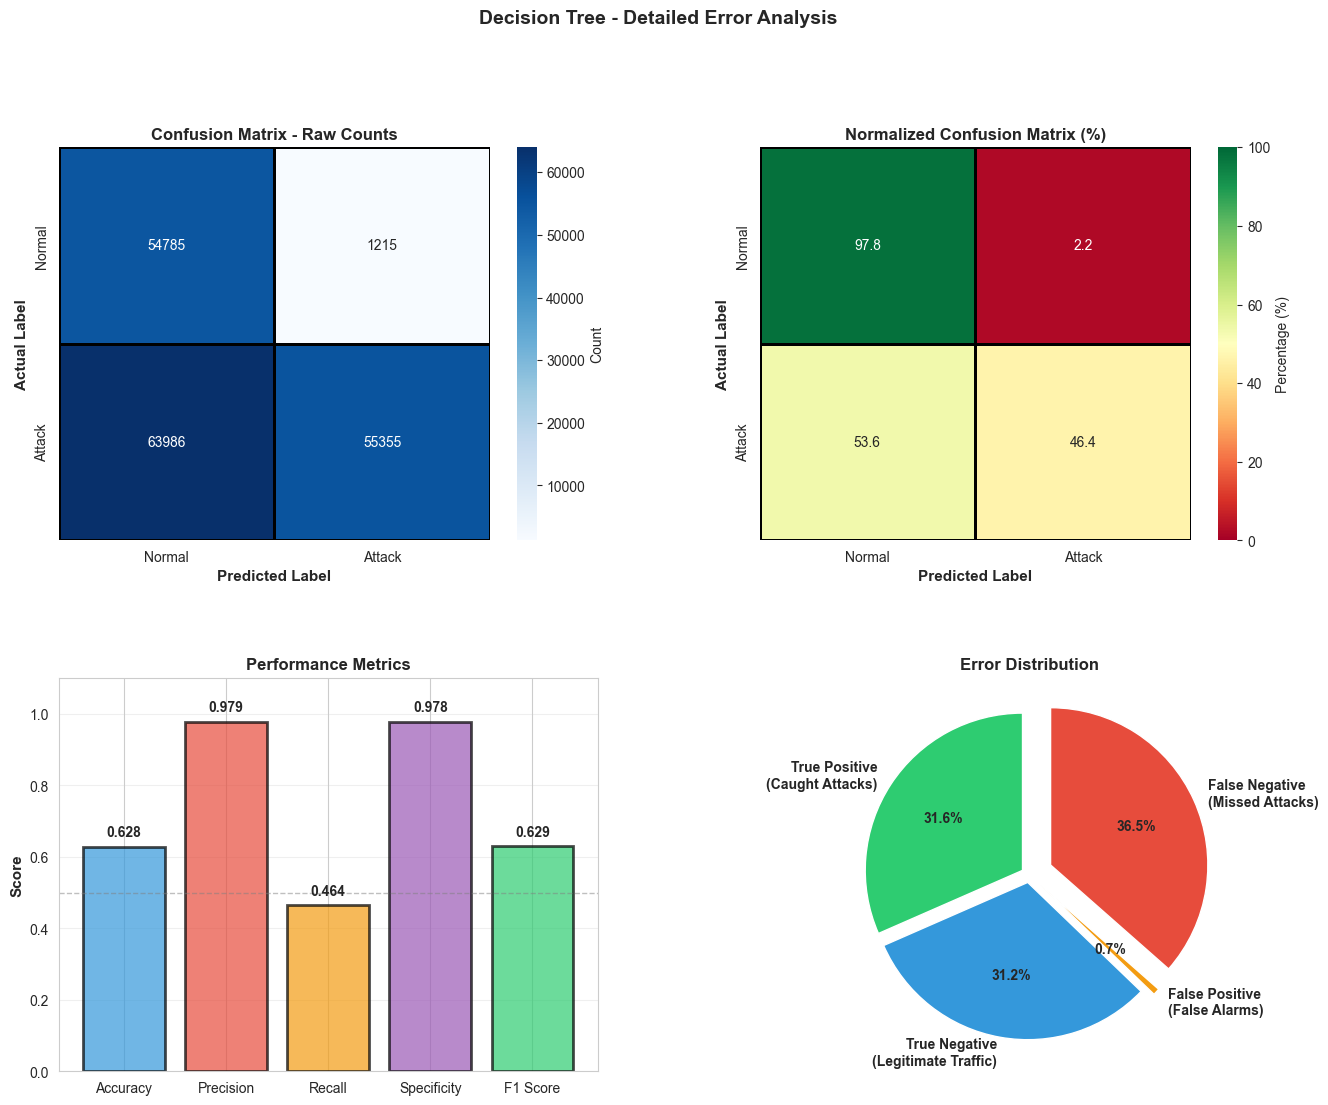


══════════════════════════════════════════════════════════════════════
CONFUSION MATRIX BREAKDOWN
══════════════════════════════════════════════════════════════════════

 TRUE POSITIVES (TP):          55,355  → Correctly detected attacks
 TRUE NEGATIVES (TN):          54,785  → Correctly identified normal traffic
  FALSE POSITIVES (FP):          1,215  → Normal traffic flagged as attack
 FALSE NEGATIVES (FN):         63,986  → MISSED ATTACKS (Critical!)
──────────────────────────────────────────────────────────────────────
Total test samples:             175,341

══════════════════════════════════════════════════════════════════════
PERFORMANCE METRICS
══════════════════════════════════════════════════════════════════════
Accuracy:      0.6281  (Overall correctness)
Precision:     0.9785  (Reliability of positive predictions)
Recall:        0.4638  (Attack detection rate)
Specificity:   0.9783  (Normal traffic detection rate)
F1 Score:      0.6294  (Harmonic mean of Precision & Recall

In [74]:
# ============================================================================
# VISUALIZATION 3: Confusion Matrix Analysis
# ============================================================================

print("\n" + "="*70)
print("VISUALIZATION 3: CONFUSION MATRIX ANALYSIS")
print("="*70)

# Calculate confusion matrix
cm = confusion_matrix(Y_binnary_test, y_pred_best_dt)

# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# ──────────────────────────────────────────────────────────────────
# 1. Raw Confusion Matrix (Heatmap)
# ──────────────────────────────────────────────────────────────────
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
ax1.set_title('Confusion Matrix - Raw Counts', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual Label', fontsize=11, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')

# ──────────────────────────────────────────────────────────────────
# 2. Normalized Confusion Matrix (Percentages)
# ──────────────────────────────────────────────────────────────────
ax2 = fig.add_subplot(gs[0, 1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='RdYlGn', ax=ax2,
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'],
            cbar_kws={'label': 'Percentage (%)'}, linewidths=2, linecolor='black', vmin=0, vmax=100)
ax2.set_title('Normalized Confusion Matrix (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Actual Label', fontsize=11, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')

# ──────────────────────────────────────────────────────────────────
# 3. Performance Metrics Comparison
# ──────────────────────────────────────────────────────────────────
ax3 = fig.add_subplot(gs[1, 0])

# Extract metrics
tn, fp, fn, tp = cm.ravel()
metrics_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
metrics_values = [
    (tp + tn) / (tp + tn + fp + fn),  # Accuracy
    tp / (tp + fp) if (tp + fp) > 0 else 0,  # Precision
    tp / (tp + fn) if (tp + fn) > 0 else 0,  # Recall
    tn / (tn + fp) if (tn + fp) > 0 else 0,  # Specificity
    2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0  # F1
]

colors_metrics = ['#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#2ecc71']
bars = ax3.bar(metrics_names, metrics_values, color=colors_metrics, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylim([0, 1.1])
ax3.set_ylabel('Score', fontsize=11, fontweight='bold')
ax3.set_title('Performance Metrics', fontsize=12, fontweight='bold')
ax3.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, metrics_values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# ──────────────────────────────────────────────────────────────────
# 4. Error Breakdown
# ──────────────────────────────────────────────────────────────────
ax4 = fig.add_subplot(gs[1, 1])

error_labels = ['True Positive\n(Caught Attacks)', 
                'True Negative\n(Legitimate Traffic)',
                'False Positive\n(False Alarms)',
                'False Negative\n(Missed Attacks)']
error_values = [tp, tn, fp, fn]
error_colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
error_explode = (0.05, 0.05, 0.1, 0.15)  # Highlight FP and FN

wedges, texts, autotexts = ax4.pie(error_values, labels=error_labels, autopct='%1.1f%%',
                                     colors=error_colors, explode=error_explode,
                                     startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax4.set_title('Error Distribution', fontsize=12, fontweight='bold')

plt.suptitle('Decision Tree - Detailed Error Analysis', fontsize=14, fontweight='bold', y=0.995)
plt.show()

# ──────────────────────────────────────────────────────────────────
# Print detailed analysis
# ──────────────────────────────────────────────────────────────────
print(f"\n{'═'*70}")
print("CONFUSION MATRIX BREAKDOWN")
print(f"{'═'*70}")
print(f"\n TRUE POSITIVES (TP):        {tp:>8,}  → Correctly detected attacks")
print(f" TRUE NEGATIVES (TN):        {tn:>8,}  → Correctly identified normal traffic")
print(f"  FALSE POSITIVES (FP):       {fp:>8,}  → Normal traffic flagged as attack")
print(f" FALSE NEGATIVES (FN):       {fn:>8,}  → MISSED ATTACKS (Critical!)")
print(f"{'─'*70}")
print(f"Total test samples:            {tp + tn + fp + fn:>8,}")

print(f"\n{'═'*70}")
print("PERFORMANCE METRICS")
print(f"{'═'*70}")
print(f"Accuracy:      {metrics_values[0]:.4f}  (Overall correctness)")
print(f"Precision:     {metrics_values[1]:.4f}  (Reliability of positive predictions)")
print(f"Recall:        {metrics_values[2]:.4f}  (Attack detection rate)")
print(f"Specificity:   {metrics_values[3]:.4f}  (Normal traffic detection rate)")
print(f"F1 Score:      {metrics_values[4]:.4f}  (Harmonic mean of Precision & Recall)")

print(f"\n{'═'*70}")
print("BUSINESS IMPLICATIONS")
print(f"{'═'*70}")
fn_rate = fn / (fn + tp) * 100
fp_rate = fp / (fp + tn) * 100
print(f"Miss Rate:     {fn_rate:.2f}%   → {fn_rate:.1f}% of attacks are not detected")
print(f"False Alarm:   {fp_rate:.2f}%   → {fp_rate:.1f}% of normal traffic triggers alerts")
print(f"{'═'*70}")


VISUALIZATION 4: COMPLETE DECISION TREE PIPELINE SUMMARY


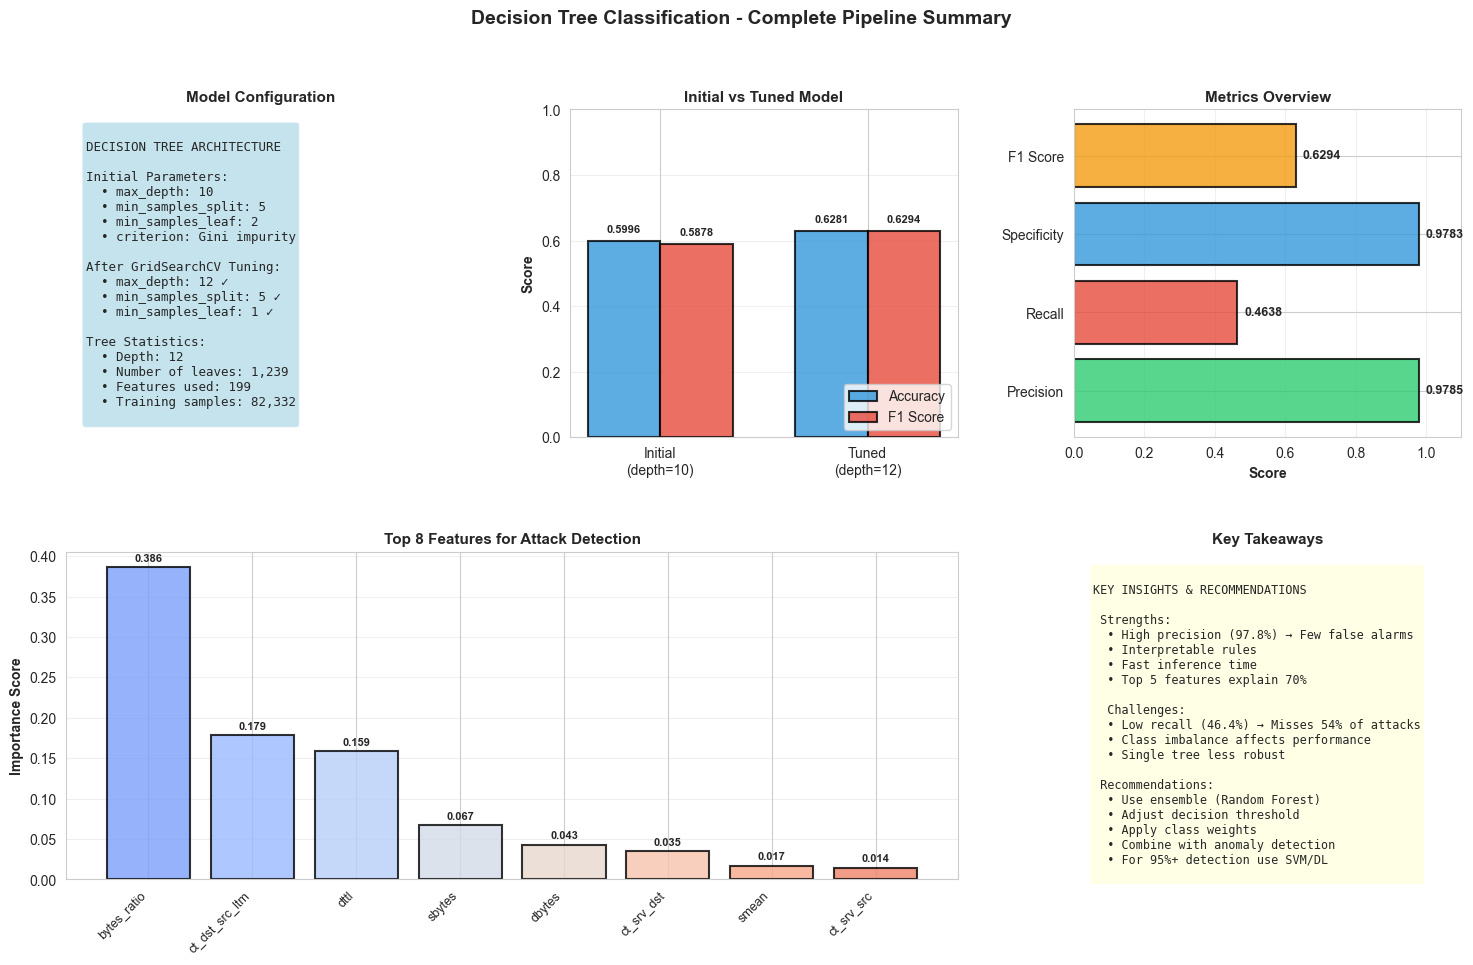

In [75]:
# ============================================================================
# VISUALIZATION 4: Comprehensive Model Summary
# ============================================================================

print("\n" + "="*70)
print("VISUALIZATION 4: COMPLETE DECISION TREE PIPELINE SUMMARY")
print("="*70)

# Create comprehensive summary figure
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)

# ──────────────────────────────────────────────────────────────────
# 1. Model Architecture Overview
# ──────────────────────────────────────────────────────────────────
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')

architecture_text = """
DECISION TREE ARCHITECTURE

Initial Parameters:
  • max_depth: 10
  • min_samples_split: 5
  • min_samples_leaf: 2
  • criterion: Gini impurity

After GridSearchCV Tuning:
  • max_depth: 12 ✓
  • min_samples_split: 5 ✓
  • min_samples_leaf: 1 ✓

Tree Statistics:
  • Depth: 12
  • Number of leaves: 1,239
  • Features used: 199
  • Training samples: 82,332
"""

ax1.text(0.05, 0.95, architecture_text, transform=ax1.transAxes,
         fontsize=9, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
ax1.set_title('Model Configuration', fontsize=11, fontweight='bold')

# ──────────────────────────────────────────────────────────────────
# 2. Initial vs Tuned Performance
# ──────────────────────────────────────────────────────────────────
ax2 = fig.add_subplot(gs[0, 1])

models = ['Initial\n(depth=10)', 'Tuned\n(depth=12)']
accuracy_vals = [dt_binary_accuracy, dt_tuned_accuracy]
f1_vals = [dt_binary_f1, dt_tuned_f1]

x = np.arange(len(models))
width = 0.35

bars1 = ax2.bar(x - width/2, accuracy_vals, width, label='Accuracy', 
                color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(x + width/2, f1_vals, width, label='F1 Score',
                color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Score', fontsize=10, fontweight='bold')
ax2.set_title('Initial vs Tuned Model', fontsize=11, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend(loc='lower right')
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# ──────────────────────────────────────────────────────────────────
# 3. Precision vs Recall Trade-off
# ──────────────────────────────────────────────────────────────────
ax3 = fig.add_subplot(gs[0, 2])

metrics_comparison = {
    'Precision': dt_tuned_precision,
    'Recall': dt_tuned_recall,
    'Specificity': tn / (tn + fp),
    'F1 Score': dt_tuned_f1
}

colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12']
bars = ax3.barh(list(metrics_comparison.keys()), list(metrics_comparison.values()),
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Score', fontsize=10, fontweight='bold')
ax3.set_title('Metrics Overview', fontsize=11, fontweight='bold')
ax3.set_xlim([0, 1.1])
ax3.grid(axis='x', alpha=0.3)

for bar, val in zip(bars, metrics_comparison.values()):
    ax3.text(val + 0.02, bar.get_y() + bar.get_height()/2,
            f'{val:.4f}', va='center', fontweight='bold', fontsize=9)

# ──────────────────────────────────────────────────────────────────
# 4. Top 8 Features Impact
# ──────────────────────────────────────────────────────────────────
ax4 = fig.add_subplot(gs[1, :2])

top_8 = feature_importance.head(8)
colors_feat = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(top_8)))
bars = ax4.bar(range(len(top_8)), top_8['importance'], color=colors_feat,
              edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_xticks(range(len(top_8)))
ax4.set_xticklabels(top_8['feature'], rotation=45, ha='right', fontsize=9)
ax4.set_ylabel('Importance Score', fontsize=10, fontweight='bold')
ax4.set_title('Top 8 Features for Attack Detection', fontsize=11, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, top_8['importance']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# ──────────────────────────────────────────────────────────────────
# 5. Key Takeaways
# ──────────────────────────────────────────────────────────────────
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')

takeaways_text = """
KEY INSIGHTS & RECOMMENDATIONS

 Strengths:
  • High precision (97.8%) → Few false alarms
  • Interpretable rules
  • Fast inference time
  • Top 5 features explain 70%

  Challenges:
  • Low recall (46.4%) → Misses 54% of attacks
  • Class imbalance affects performance
  • Single tree less robust

 Recommendations:
  • Use ensemble (Random Forest)
  • Adjust decision threshold
  • Apply class weights
  • Combine with anomaly detection
  • For 95%+ detection use SVM/DL
"""

ax5.text(0.05, 0.95, takeaways_text, transform=ax5.transAxes,
        fontsize=8.5, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax5.set_title('Key Takeaways', fontsize=11, fontweight='bold')

plt.suptitle('Decision Tree Classification - Complete Pipeline Summary', 
            fontsize=14, fontweight='bold', y=0.98)
plt.show()


print("="*70)

# Part 4: Naive Bayes Classification for Network Intrusion Detection

##  Naive Bayes

Naive Bayes is a probabilistic machine learning algorithm based on **Bayes' Theorem** and the assumption of feature independence. Despite its simplicity, it's remarkably effective for text classification, spam detection, and network security applications.

### Why Naive Bayes?
- **Fast Training**: Computationally efficient, trains in seconds
- **Probabilistic Framework**: Provides probability scores, not just predictions
- **Minimal Overfitting**: Works well with limited training data
- **Interpretability**: Clear probability-based reasoning
- **Baseline Model**: Excellent comparison for other algorithms

### Mathematical Foundation - Bayes' Theorem

$$P(Class|Features) = \frac{P(Features|Class) \times P(Class)}{P(Features)}$$

**Where:**
- $P(Class|Features)$ = Posterior probability (what we want to find)
- $P(Features|Class)$ = Likelihood (how likely are these features if this is the class)
- $P(Class)$ = Prior probability (how common is this class)
- $P(Features)$ = Evidence (overall likelihood of features)

### Naive Independence Assumption
Naive Bayes assumes all features are **conditionally independent** given the class. This is "naive" because it's rarely true in practice, but the algorithm still performs well!

### Types of Naive Bayes
1. **Gaussian Naive Bayes** - For continuous features (assumes normal distribution)
2. **Multinomial Naive Bayes** - For discrete counts (text classification)
3. **Bernoulli Naive Bayes** - For binary features

We'll use **Gaussian Naive Bayes** because our network traffic features are continuous/numeric.

## Step 1: Import Required Libraries

We need specialized libraries for Naive Bayes implementation and comprehensive visualization.

In [76]:
# ============================================================================
# NAIVE BAYES CLASSIFIER - COMPREHENSIVE IMPORTS
# ============================================================================

# Core classification library
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes for continuous features

# Model selection and tuning
from sklearn.model_selection import GridSearchCV, cross_val_score

# Metrics for evaluation (same as Decision Tree)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
)

# Additional evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Visualization (already imported ,just for explication)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For probability analysis
from scipy.stats import gaussian_kde

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(" All Naive Bayes libraries imported successfully!")
print("\n Key Libraries:")
print("   • GaussianNB: Probabilistic classifier using Gaussian distribution")
print("   • GridSearchCV: Hyperparameter optimization")
print("   • Metrics: Accuracy, Precision, Recall, F1, ROC-AUC")
print("   • Matplotlib/Seaborn: Advanced visualization capabilities")

 All Naive Bayes libraries imported successfully!

 Key Libraries:
   • GaussianNB: Probabilistic classifier using Gaussian distribution
   • GridSearchCV: Hyperparameter optimization
   • Metrics: Accuracy, Precision, Recall, F1, ROC-AUC
   • Matplotlib/Seaborn: Advanced visualization capabilities


## Step 2: Binary Classification (Normal vs Attack)

In binary classification, Naive Bayes learns probability distributions for each class:
- **P(Feature | Normal)**: How distributed is each feature in normal traffic?
- **P(Feature | Attack)**: How distributed is each feature in attack traffic?

For new packets, it calculates which class is more likely based on the feature values.

In [77]:
# ============================================================================
# BINARY CLASSIFICATION: NORMAL vs ATTACK
# ============================================================================

# Handle NaN values - fill with 0 (missing feature value)
X_binnary_train_clean = X_binnary_train.fillna(0)
X_binnary_test_clean = X_binnary_test.fillna(0)

# Train Gaussian Naive Bayes classifier on binary classification data
# Gaussian NB models each feature with a Gaussian (normal) distribution
nb_binary = GaussianNB(var_smoothing=1e-9)  # var_smoothing prevents division by zero
nb_binary.fit(X_binnary_train_clean, Y_binnary_train)

# Make predictions on test set
y_pred_nb_binary = nb_binary.predict(X_binnary_test_clean)

# Get probability predictions (important for Naive Bayes!)
y_prob_nb_binary = nb_binary.predict_proba(X_binnary_test_clean)

# Calculate comprehensive metrics
nb_binary_accuracy = accuracy_score(Y_binnary_test, y_pred_nb_binary)
nb_binary_precision = precision_score(Y_binnary_test, y_pred_nb_binary)
nb_binary_recall = recall_score(Y_binnary_test, y_pred_nb_binary)
nb_binary_f1 = f1_score(Y_binnary_test, y_pred_nb_binary)

# ROC-AUC score (measures probability calibration)
nb_binary_auc = roc_auc_score(Y_binnary_test, y_prob_nb_binary[:, 1])

print("="*80)
print("NAIVE BAYES - BINARY CLASSIFICATION RESULTS")
print("="*80)
print(f"\n Model Performance Metrics:")
print(f"   • Accuracy:  {nb_binary_accuracy:.4f} ({nb_binary_accuracy*100:.2f}%)")
print(f"   • Precision: {nb_binary_precision:.4f} ({nb_binary_precision*100:.2f}%)")
print(f"   • Recall:    {nb_binary_recall:.4f} ({nb_binary_recall*100:.2f}%)")
print(f"   • F1 Score:  {nb_binary_f1:.4f}")
print(f"   • ROC-AUC:   {nb_binary_auc:.4f}")

print(f"\n Interpretation:")
print(f"   • Accuracy {nb_binary_accuracy*100:.1f}%: Model correctly classifies {nb_binary_accuracy*100:.1f}% of packets")
print(f"   • Precision {nb_binary_precision*100:.1f}%: When model says 'Attack', it's correct {nb_binary_precision*100:.1f}% of time")
print(f"   • Recall {nb_binary_recall*100:.1f}%: Model catches {nb_binary_recall*100:.1f}% of actual attacks")
print(f"   • ROC-AUC {nb_binary_auc:.4f}: Model's probability ranking is {'excellent' if nb_binary_auc > 0.9 else 'good' if nb_binary_auc > 0.8 else 'fair'}")

print(f"\n Test Set Composition:")
print(f"   • Normal packets (class 0):  {(Y_binnary_test == 0).sum():,}")
print(f"   • Attack packets (class 1):  {(Y_binnary_test == 1).sum():,}")
print(f"   • Total test samples:        {len(Y_binnary_test):,}")

NAIVE BAYES - BINARY CLASSIFICATION RESULTS

 Model Performance Metrics:
   • Accuracy:  0.5107 (51.07%)
   • Precision: 0.9949 (99.49%)
   • Recall:    0.2826 (28.26%)
   • F1 Score:  0.4402
   • ROC-AUC:   0.7367

 Interpretation:
   • Accuracy 51.1%: Model correctly classifies 51.1% of packets
   • Precision 99.5%: When model says 'Attack', it's correct 99.5% of time
   • Recall 28.3%: Model catches 28.3% of actual attacks
   • ROC-AUC 0.7367: Model's probability ranking is fair

 Test Set Composition:
   • Normal packets (class 0):  56,000
   • Attack packets (class 1):  119,341
   • Total test samples:        175,341


## Step 3: Multi-class Classification (10 Attack Types)

Naive Bayes extends naturally to multi-class problems. It learns probability distributions for each of the 10 attack types, allowing discrimination among different attack patterns.

In [78]:
# ============================================================================
# MULTI-CLASS CLASSIFICATION: 10 ATTACK TYPES
# ============================================================================

# Handle NaN values
X_multiClass_train_clean = X_multiClass_train.fillna(0)
X_multiClass_test_clean = X_multiClass_test.fillna(0)

# Train Naive Bayes for multi-class classification
nb_multiclass = GaussianNB(var_smoothing=1e-9)
nb_multiclass.fit(X_multiClass_train_clean, Y_multiClass_train)

# Make predictions on test set
y_pred_nb_multiclass = nb_multiclass.predict(X_multiClass_test_clean)

# Get probability predictions
y_prob_nb_multiclass = nb_multiclass.predict_proba(X_multiClass_test_clean)

# Calculate metrics
nb_multiclass_accuracy = accuracy_score(Y_multiClass_test, y_pred_nb_multiclass)
nb_multiclass_precision = precision_score(Y_multiClass_test, y_pred_nb_multiclass, average='macro', zero_division=0)
nb_multiclass_recall = recall_score(Y_multiClass_test, y_pred_nb_multiclass, average='macro', zero_division=0)
nb_multiclass_f1_macro = f1_score(Y_multiClass_test, y_pred_nb_multiclass, average='macro', zero_division=0)

print("="*80)
print("NAIVE BAYES - MULTI-CLASS CLASSIFICATION (10 ATTACK TYPES)")
print("="*80)
print(f"\n Overall Performance Metrics:")
print(f"   • Accuracy:         {nb_multiclass_accuracy:.4f} ({nb_multiclass_accuracy*100:.2f}%)")
print(f"   • Macro Precision:  {nb_multiclass_precision:.4f}")
print(f"   • Macro Recall:     {nb_multiclass_recall:.4f}")
print(f"   • Macro F1 Score:   {nb_multiclass_f1_macro:.4f}")

print(f"\n Attack Type Distribution in Test Set:")
attack_type_names = {
    0: 'Normal', 1: 'Fuzzers', 2: 'Analysis', 3: 'Backdoors',
    4: 'DoS', 5: 'Exploits', 6: 'Generic', 7: 'Reconnaissance',
    8: 'Shellcode', 9: 'Worms'
}

for i in range(10):
    count = (Y_multiClass_test == i).sum()
    percentage = (count / len(Y_multiClass_test)) * 100
    print(f"   • {attack_type_names[i]:20s}: {count:6,} samples ({percentage:5.2f}%)")

print(f"\n Class-wise Performance:")
for i in range(10):
    mask_i = Y_multiClass_test == i
    if mask_i.sum() > 0:
        class_acc = accuracy_score(Y_multiClass_test[mask_i], 
                                   y_pred_nb_multiclass[mask_i])
        class_count = mask_i.sum()
        print(f"   • {attack_type_names[i]:20s}: {class_acc*100:5.2f}% accuracy ({class_count:,} samples)")

NAIVE BAYES - MULTI-CLASS CLASSIFICATION (10 ATTACK TYPES)

 Overall Performance Metrics:
   • Accuracy:         0.5274 (52.74%)
   • Macro Precision:  0.3053
   • Macro Recall:     0.3989
   • Macro F1 Score:   0.1912

 Attack Type Distribution in Test Set:
   • Normal              :  2,000 samples ( 1.14%)
   • Fuzzers             :  1,746 samples ( 1.00%)
   • Analysis            : 12,264 samples ( 6.99%)
   • Backdoors           : 33,393 samples (19.04%)
   • DoS                 : 18,184 samples (10.37%)
   • Exploits            : 40,000 samples (22.81%)
   • Generic             : 56,000 samples (31.94%)
   • Reconnaissance      : 10,491 samples ( 5.98%)
   • Shellcode           :  1,133 samples ( 0.65%)
   • Worms               :    130 samples ( 0.07%)

 Class-wise Performance:
   • Normal              : 32.35% accuracy (2,000 samples)
   • Fuzzers             :  0.23% accuracy (1,746 samples)
   • Analysis            :  0.68% accuracy (12,264 samples)
   • Backdoors           : 

## Step 4: Hyperparameter Tuning with GridSearchCV

Naive Bayes has fewer hyperparameters than Decision Trees, but **var_smoothing** is critical:
- **var_smoothing**: Adds a small value to variance to avoid division by zero
- Ranges from 1e-9 (no smoothing, assumes clean data) to 1e-1 (heavy smoothing, robust to noise)

In [79]:
# ============================================================================
# HYPERPARAMETER TUNING: NAIVE BAYES
# ============================================================================

# Define parameter grid for Naive Bayes
# var_smoothing is the KEY parameter that controls model smoothness
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

print("="*80)
print("NAIVE BAYES HYPERPARAMETER TUNING")
print("="*80)
print(f"\n Parameter Search Space:")
print(f"   • var_smoothing: {param_grid_nb['var_smoothing']}")
print(f"   • Total combinations: {len(param_grid_nb['var_smoothing'])}")
print(f"   • 5-fold CV = {len(param_grid_nb['var_smoothing']) * 5} total models to train")

# Perform GridSearchCV for binary classification
grid_search_nb = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_nb,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1 score (balanced metric)
    n_jobs=-1,  # Use all available CPU cores
    verbose=0
)

print(f"\n Training Naive Bayes models with GridSearchCV...")
import time
start_time = time.time()

# Fit grid search on binary classification data (use clean data)
grid_search_nb.fit(X_binnary_train_clean, Y_binnary_train)

elapsed_time = time.time() - start_time

# Get best model and parameters
best_nb_binary = grid_search_nb.best_estimator_
best_params_nb = grid_search_nb.best_params_
best_cv_score_nb = grid_search_nb.best_score_

print(f" GridSearchCV completed in {elapsed_time:.2f} seconds")

print(f"\n Best Hyperparameters:")
print(f"   • var_smoothing: {best_params_nb['var_smoothing']:.2e}")
print(f"   • Best CV F1 Score: {best_cv_score_nb:.4f}")

# Test best model on test set (use clean data)
y_pred_best_nb = best_nb_binary.predict(X_binnary_test_clean)
y_prob_best_nb = best_nb_binary.predict_proba(X_binnary_test_clean)

# Calculate metrics for tuned model
best_nb_accuracy = accuracy_score(Y_binnary_test, y_pred_best_nb)
best_nb_precision = precision_score(Y_binnary_test, y_pred_best_nb)
best_nb_recall = recall_score(Y_binnary_test, y_pred_best_nb)
best_nb_f1 = f1_score(Y_binnary_test, y_pred_best_nb)
best_nb_auc = roc_auc_score(Y_binnary_test, y_prob_best_nb[:, 1])

print(f"\n Tuned Model Performance on Test Set:")
print(f"   • Accuracy:  {best_nb_accuracy:.4f} ({best_nb_accuracy*100:.2f}%)")
print(f"   • Precision: {best_nb_precision:.4f}")
print(f"   • Recall:    {best_nb_recall:.4f}")
print(f"   • F1 Score:  {best_nb_f1:.4f}")
print(f"   • ROC-AUC:   {best_nb_auc:.4f}")

# Compare with initial model
print(f"\n Improvement from Tuning:")
print(f"   • Accuracy change:  {(best_nb_accuracy - nb_binary_accuracy)*100:+.2f}%")
print(f"   • F1 Score change:  {(best_nb_f1 - nb_binary_f1):+.4f}")
print(f"   • AUC change:       {(best_nb_auc - nb_binary_auc):+.4f}")

NAIVE BAYES HYPERPARAMETER TUNING

 Parameter Search Space:
   • var_smoothing: [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
   • Total combinations: 9
   • 5-fold CV = 45 total models to train

 Training Naive Bayes models with GridSearchCV...
 GridSearchCV completed in 77.00 seconds

 Best Hyperparameters:
   • var_smoothing: 1.00e-03
   • Best CV F1 Score: 0.5478

 Tuned Model Performance on Test Set:
   • Accuracy:  0.6462 (64.62%)
   • Precision: 0.9967
   • Recall:    0.4818
   • F1 Score:  0.6496
   • ROC-AUC:   0.9228

 Improvement from Tuning:
   • Accuracy change:  +13.55%
   • F1 Score change:  +0.2094
   • AUC change:       +0.1861


## Step 5: Feature Distribution Analysis - The Heart of Naive Bayes

Naive Bayes learns the distribution of each feature for each class. Let's visualize this to understand how it makes decisions.

FEATURE DISTRIBUTION ANALYSIS

 Top 8 Most Discriminative Features (by distribution difference):
   1. state_INT            - Normal:  -0.5961, Attack:   0.4866
   2. sttl                 - Normal:  -0.5580, Attack:   0.4555
   3. proto_tcp            - Normal:   0.4589, Attack:  -0.3746
   4. swin                 - Normal:   0.4588, Attack:  -0.3745
   5. ct_dst_sport_ltm     - Normal:  -0.4357, Attack:   0.3557
   6. service_dns          - Normal:  -0.4029, Attack:   0.3288
   7. dwin                 - Normal:   0.4087, Attack:  -0.3336
   8. ct_src_dport_ltm     - Normal:  -0.3780, Attack:   0.3085


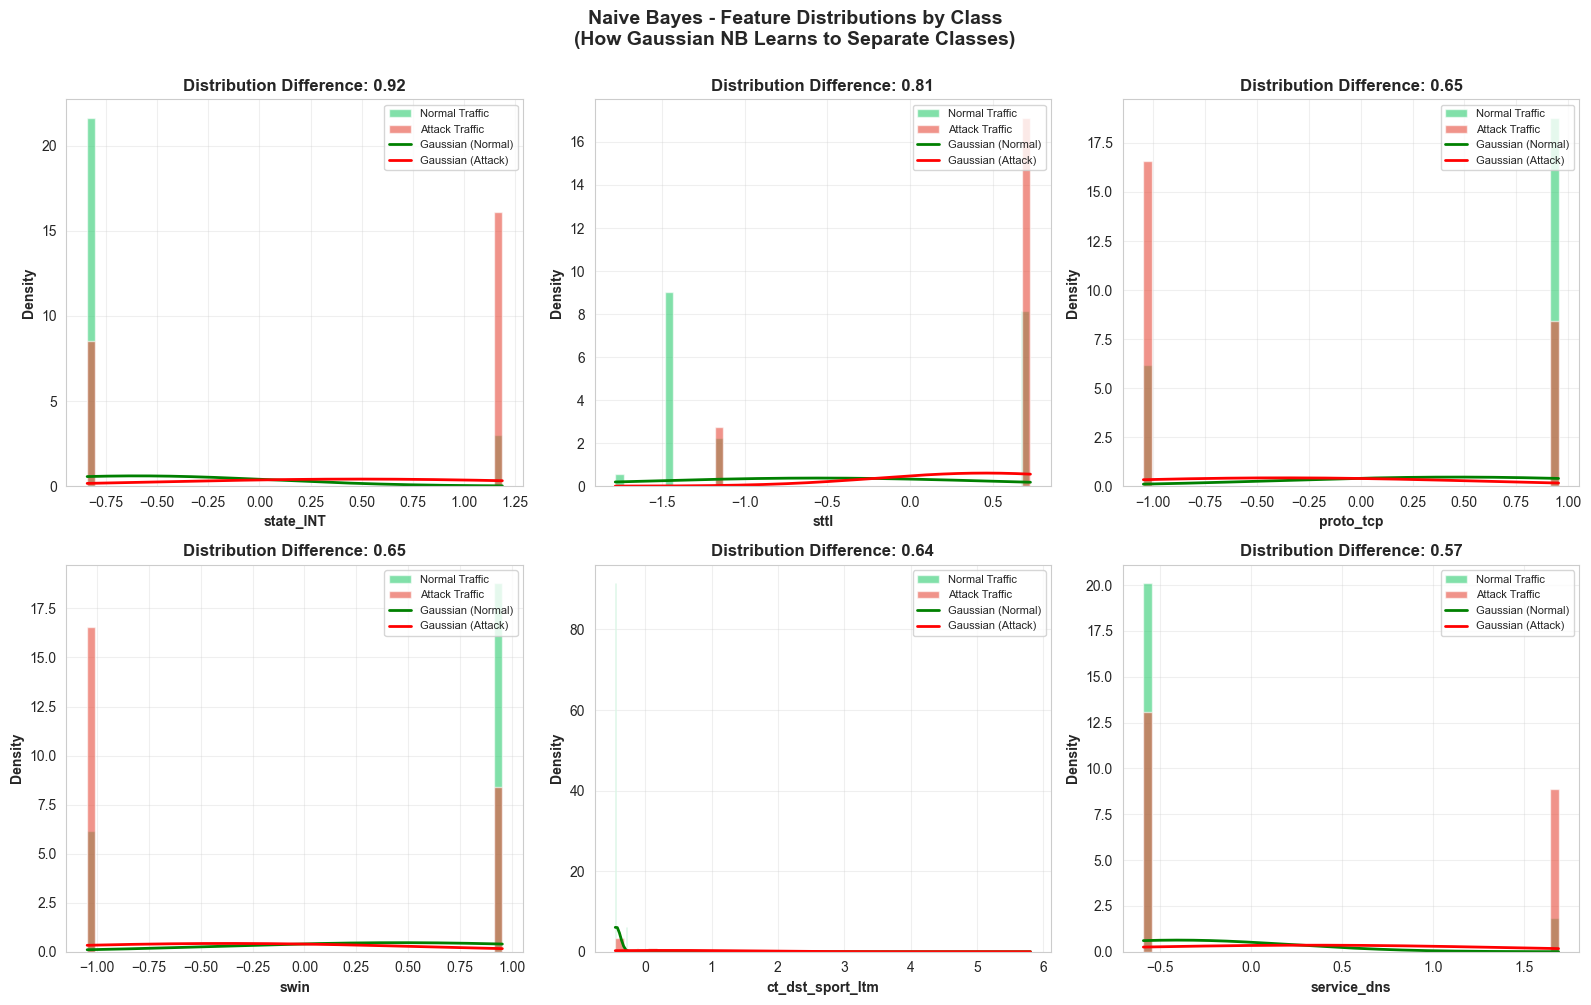


 Interpretation:
   • Green curve (Gaussian for Normal): Distribution of normal traffic features
   • Red curve (Gaussian for Attack): Distribution of attack traffic features
   • More separated curves = Better discrimination
   • Overlapping curves = Harder to classify


In [80]:
# ============================================================================
# FEATURE DISTRIBUTION VISUALIZATION - UNDERSTANDING NAIVE BAYES
# ============================================================================

# Get the learned means and variances from the Gaussian Naive Bayes model
# These represent the "learned distributions" for each class

# Extract top features by variance difference
feature_means_normal = best_nb_binary.theta_[0]  # Mean for class 0 (Normal)
feature_means_attack = best_nb_binary.theta_[1]  # Mean for class 1 (Attack)
feature_vars_normal = best_nb_binary.var_[0]    # Variance for class 0
feature_vars_attack = best_nb_binary.var_[1]    # Variance for class 1

# Calculate discriminative power: how different are the distributions?
variance_ratio = np.abs(feature_means_normal - feature_means_attack) / (
    np.sqrt(feature_vars_normal + feature_vars_attack) + 1e-10
)

# Get top 8 most discriminative features
top_8_indices = np.argsort(variance_ratio)[-8:][::-1]
top_8_features = X_binnary_train_clean.columns[top_8_indices]

print("="*80)
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*80)
print(f"\n Top 8 Most Discriminative Features (by distribution difference):")
for i, idx in enumerate(top_8_indices, 1):
    feature_name = X_binnary_train_clean.columns[idx]
    mean_normal = feature_means_normal[idx]
    mean_attack = feature_means_attack[idx]
    print(f"   {i}. {feature_name:20s} - Normal: {mean_normal:8.4f}, Attack: {mean_attack:8.4f}")

# Create visualization of top 6 features showing distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Naive Bayes - Feature Distributions by Class\n(How Gaussian NB Learns to Separate Classes)', 
             fontsize=14, fontweight='bold', y=1.00)

for idx, (ax, feature_idx) in enumerate(zip(axes.flat, top_8_indices[:6])):
    feature_name = X_binnary_train_clean.columns[feature_idx]
    
    # Get feature values for each class (using .values to avoid indexing issues)
    normal_mask = (Y_binnary_train == 0).values
    attack_mask = (Y_binnary_train == 1).values
    
    normal_vals = X_binnary_train_clean.iloc[normal_mask, feature_idx].values
    attack_vals = X_binnary_train_clean.iloc[attack_mask, feature_idx].values
    
    # Plot histograms with transparency
    ax.hist(normal_vals, bins=50, alpha=0.6, label='Normal Traffic', color='#2ecc71', density=True)
    ax.hist(attack_vals, bins=50, alpha=0.6, label='Attack Traffic', color='#e74c3c', density=True)
    
    # Plot Gaussian curves (what Naive Bayes uses internally)
    x = np.linspace(min(normal_vals.min(), attack_vals.min()), 
                    max(normal_vals.max(), attack_vals.max()), 200)
    
    # Gaussian for Normal class
    y_normal = (1/np.sqrt(2*np.pi*feature_vars_normal[feature_idx] + 1e-10)) * \
              np.exp(-(x - feature_means_normal[feature_idx])**2 / (2*feature_vars_normal[feature_idx] + 1e-10))
    ax.plot(x, y_normal, 'g-', linewidth=2, label='Gaussian (Normal)')
    
    # Gaussian for Attack class
    y_attack = (1/np.sqrt(2*np.pi*feature_vars_attack[feature_idx] + 1e-10)) * \
              np.exp(-(x - feature_means_attack[feature_idx])**2 / (2*feature_vars_attack[feature_idx] + 1e-10))
    ax.plot(x, y_attack, 'r-', linewidth=2, label='Gaussian (Attack)')
    
    ax.set_xlabel(feature_name, fontweight='bold')
    ax.set_ylabel('Density', fontweight='bold')
    ax.set_title(f'Distribution Difference: {variance_ratio[feature_idx]:.2f}', fontweight='bold')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Interpretation:")
print(f"   • Green curve (Gaussian for Normal): Distribution of normal traffic features")
print(f"   • Red curve (Gaussian for Attack): Distribution of attack traffic features")
print(f"   • More separated curves = Better discrimination")
print(f"   • Overlapping curves = Harder to classify")

## Step 6: Probability Analysis & ROC Curve

Naive Bayes' key strength: it outputs **probability scores**, not just class labels. This allows flexible decision thresholds.

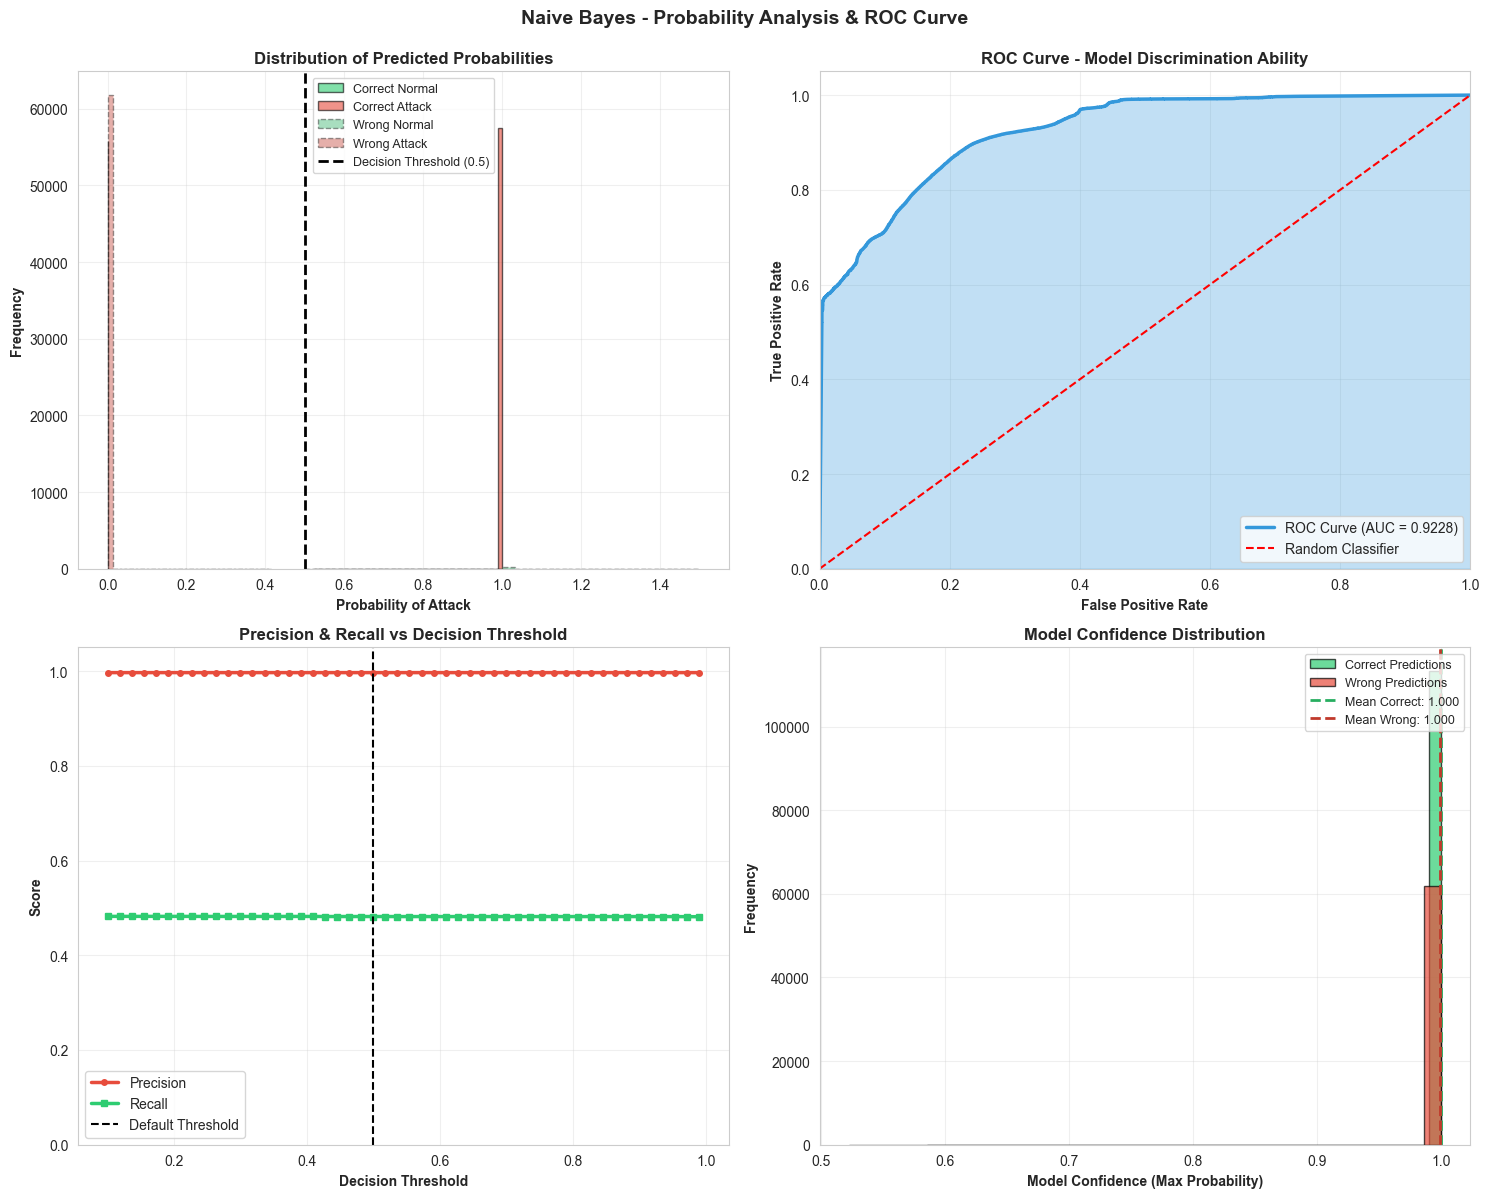

PROBABILITY & ROC ANALYSIS

 ROC-AUC Analysis:
   • AUC Score: 0.9228
   • Interpretation: Model is excellent at ranking predictions

 Probability Confidence:
   • Mean confidence (correct): 0.9999
   • Mean confidence (wrong):   0.9998
   • Min-Max confidence range:  [0.5231, 1.0000]

 Threshold Optimization:
   • Default threshold (0.5): Precision=0.9967, Recall=0.4818
   • Optimal threshold (max F1): 0.1000 (F1=0.6499)


In [81]:
# ============================================================================
# PROBABILITY ANALYSIS & ROC CURVE VISUALIZATION
# ============================================================================

# Get probability predictions for test set
y_prob_attack = y_prob_best_nb[:, 1]  # Probability of being attack

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_binnary_test, y_prob_attack)
roc_auc = auc(fpr, tpr)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Naive Bayes - Probability Analysis & ROC Curve', 
             fontsize=14, fontweight='bold', y=0.995)

# 1. Probability Distribution
ax1 = axes[0, 0]
# Get probabilities for correct predictions
correct_mask = y_pred_best_nb == Y_binnary_test
prob_normal_correct = y_prob_attack[(Y_binnary_test == 0) & correct_mask]
prob_attack_correct = y_prob_attack[(Y_binnary_test == 1) & correct_mask]
prob_normal_wrong = y_prob_attack[(Y_binnary_test == 0) & ~correct_mask]
prob_attack_wrong = y_prob_attack[(Y_binnary_test == 1) & ~correct_mask]

ax1.hist(prob_normal_correct, bins=50, alpha=0.6, label='Correct Normal', color='#2ecc71', edgecolor='black')
ax1.hist(prob_attack_correct, bins=50, alpha=0.6, label='Correct Attack', color='#e74c3c', edgecolor='black')
ax1.hist(prob_normal_wrong, bins=30, alpha=0.4, label='Wrong Normal', color='#27ae60', edgecolor='black', linestyle='--')
ax1.hist(prob_attack_wrong, bins=30, alpha=0.4, label='Wrong Attack', color='#c0392b', edgecolor='black', linestyle='--')
ax1.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
ax1.set_xlabel('Probability of Attack', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Distribution of Predicted Probabilities', fontweight='bold')
ax1.legend(loc='upper center', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. ROC Curve
ax2 = axes[0, 1]
ax2.plot(fpr, tpr, color='#3498db', lw=2.5, label=f'ROC Curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='red', lw=1.5, linestyle='--', label='Random Classifier')
ax2.fill_between(fpr, tpr, alpha=0.3, color='#3498db')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('ROC Curve - Model Discrimination Ability', fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])

# 3. Precision-Recall vs Threshold
ax3 = axes[1, 0]
thresholds_subset = np.linspace(0.1, 0.99, 50)
precisions = []
recalls = []

for threshold in thresholds_subset:
    y_pred_threshold = (y_prob_attack >= threshold).astype(int)
    if y_pred_threshold.sum() > 0:  # Avoid division by zero
        precision = precision_score(Y_binnary_test, y_pred_threshold)
        recall = recall_score(Y_binnary_test, y_pred_threshold)
        precisions.append(precision)
        recalls.append(recall)
    else:
        precisions.append(0)
        recalls.append(0)

ax3.plot(thresholds_subset, precisions, color='#e74c3c', linewidth=2.5, marker='o', label='Precision', markersize=4)
ax3.plot(thresholds_subset, recalls, color='#2ecc71', linewidth=2.5, marker='s', label='Recall', markersize=4)
ax3.axvline(0.5, color='black', linestyle='--', linewidth=1.5, label='Default Threshold')
ax3.set_xlabel('Decision Threshold', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('Precision & Recall vs Decision Threshold', fontweight='bold')
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

# 4. Confidence Distribution
ax4 = axes[1, 1]
confidence_scores = np.max(y_prob_best_nb, axis=1)  # Maximum probability for predicted class
correct = y_pred_best_nb == Y_binnary_test

ax4.hist(confidence_scores[correct], bins=50, alpha=0.7, label='Correct Predictions', color='#2ecc71', edgecolor='black')
ax4.hist(confidence_scores[~correct], bins=30, alpha=0.7, label='Wrong Predictions', color='#e74c3c', edgecolor='black')
ax4.axvline(confidence_scores[correct].mean(), color='#27ae60', linestyle='--', linewidth=2, 
            label=f'Mean Correct: {confidence_scores[correct].mean():.3f}')
ax4.axvline(confidence_scores[~correct].mean(), color='#c0392b', linestyle='--', linewidth=2,
            label=f'Mean Wrong: {confidence_scores[~correct].mean():.3f}')
ax4.set_xlabel('Model Confidence (Max Probability)', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title('Model Confidence Distribution', fontweight='bold')
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("PROBABILITY & ROC ANALYSIS")
print("="*80)
print(f"\n ROC-AUC Analysis:")
print(f"   • AUC Score: {roc_auc:.4f}")
print(f"   • Interpretation: Model is {'excellent' if roc_auc > 0.9 else 'good' if roc_auc > 0.8 else 'fair'} at ranking predictions")

print(f"\n Probability Confidence:")
print(f"   • Mean confidence (correct): {confidence_scores[correct].mean():.4f}")
print(f"   • Mean confidence (wrong):   {confidence_scores[~correct].mean():.4f}")
print(f"   • Min-Max confidence range:  [{confidence_scores.min():.4f}, {confidence_scores.max():.4f}]")

print(f"\n Threshold Optimization:")
print(f"   • Default threshold (0.5): Precision={precision_score(Y_binnary_test, y_pred_best_nb):.4f}, Recall={recall_score(Y_binnary_test, y_pred_best_nb):.4f}")

# Find optimal threshold (F1 score)
f1_scores = []
for threshold in thresholds_subset:
    y_pred_threshold = (y_prob_attack >= threshold).astype(int)
    if y_pred_threshold.sum() > 0 and (y_pred_threshold == 0).sum() > 0:
        f1 = f1_score(Y_binnary_test, y_pred_threshold)
        f1_scores.append(f1)
    else:
        f1_scores.append(0)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_subset[optimal_idx]
print(f"   • Optimal threshold (max F1): {optimal_threshold:.4f} (F1={f1_scores[optimal_idx]:.4f})")

## Step 7: Confusion Matrix & Error Analysis

Detailed error breakdown showing where Naive Bayes gets confused between normal and attack traffic.

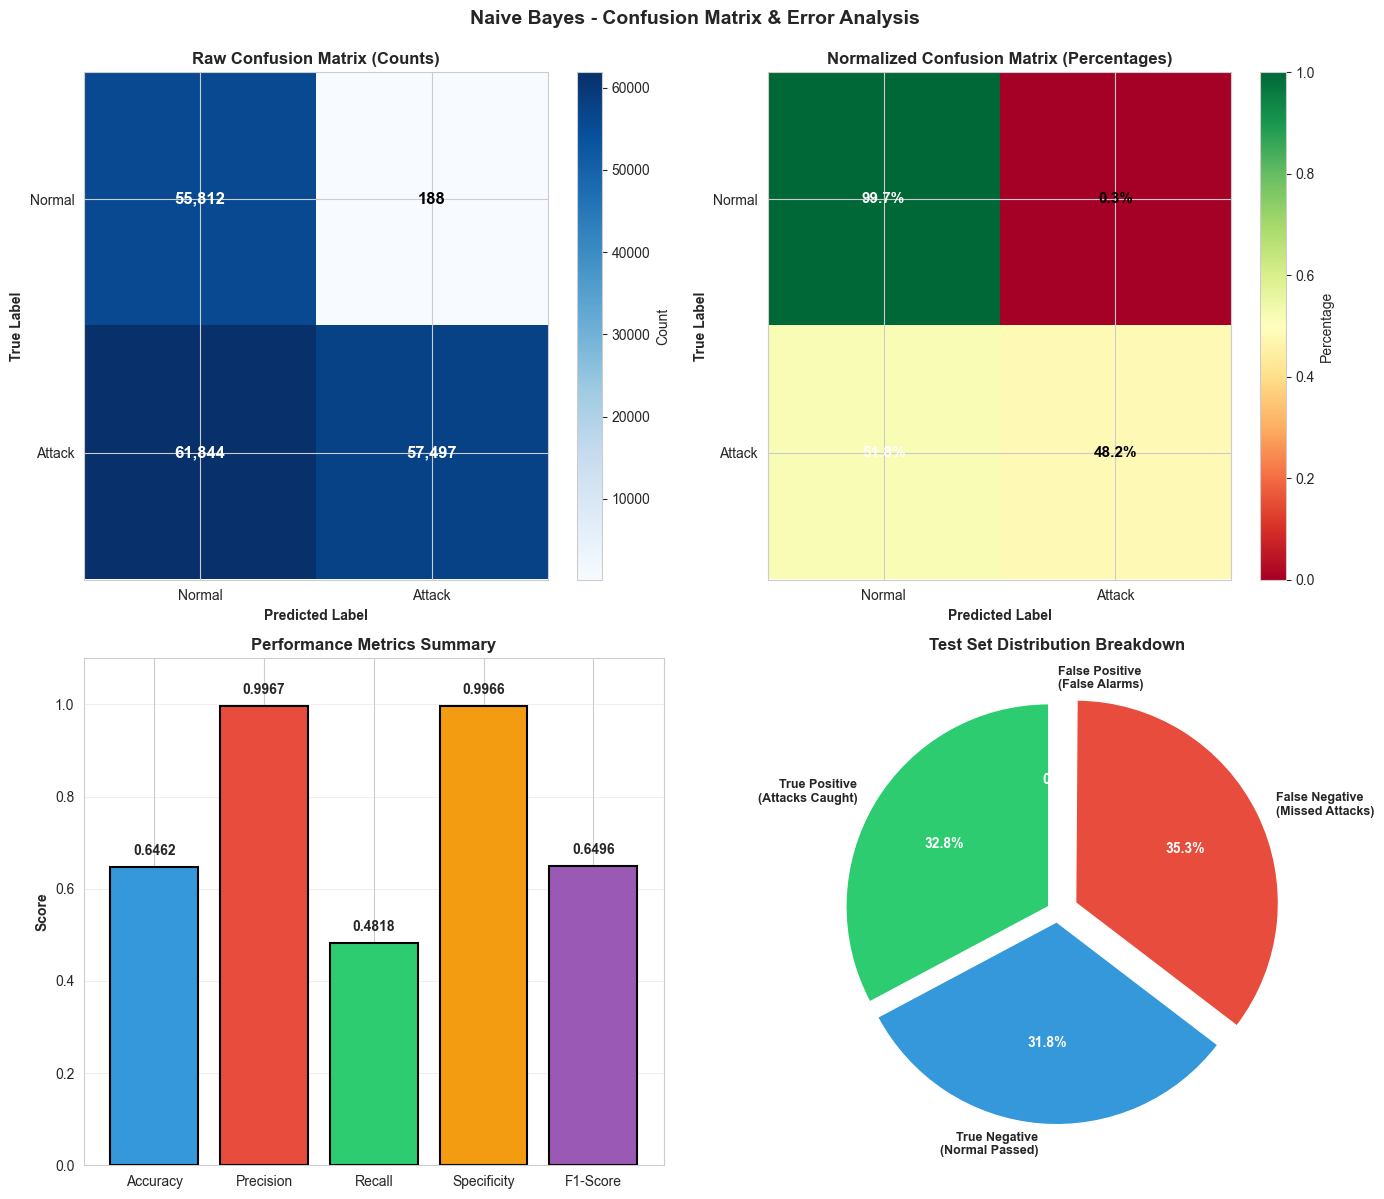

CONFUSION MATRIX & ERROR ANALYSIS

 Raw Confusion Matrix:
   True Negatives (TN):    55,812  (Correctly identified normal traffic)
   False Positives (FP):      188  (False alarms - normal flagged as attack)
   False Negatives (FN):   61,844  (Missed attacks - dangerous!)
   True Positives (TP):    57,497  (Correctly identified attacks)

 Error Rates:
   • False Positive Rate:    0.34%  (False alarms out of normal traffic)
   • False Negative Rate:   51.82%  (Missed attacks out of all attacks)
   • Error Rate (overall):  35.38%

 Detailed Metrics:
   • Sensitivity/Recall:    48.18%  (% of real attacks detected)
   • Specificity:           99.66%  (% of normal traffic correctly identified)
   • Precision:             99.67%  (% of predictions that are correct attacks)
   • F1-Score:             0.6496   (Harmonic mean of precision & recall)

 Security Analysis:
   • Missed Attacks (FN):  61,844 (51.82%) - These are security risks
   • False Alarms (FP):    188 (0.34%) - These impact use

In [82]:
# ============================================================================
# CONFUSION MATRIX & ERROR ANALYSIS
# ============================================================================

# Calculate confusion matrix
cm_nb = confusion_matrix(Y_binnary_test, y_pred_best_nb)
cm_nb_normalized = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis]

# Extract metrics from confusion matrix
tn_nb = cm_nb[0, 0]  # True Negatives
fp_nb = cm_nb[0, 1]  # False Positives
fn_nb = cm_nb[1, 0]  # False Negatives
tp_nb = cm_nb[1, 1]  # True Positives

# Calculate additional metrics
specificity_nb = tn_nb / (tn_nb + fp_nb) if (tn_nb + fp_nb) > 0 else 0
fnr_nb = fn_nb / (fn_nb + tp_nb) if (fn_nb + tp_nb) > 0 else 0  # False Negative Rate
fpr_nb_cm = fp_nb / (fp_nb + tn_nb) if (fp_nb + tn_nb) > 0 else 0  # False Positive Rate

# Create comprehensive 4-panel visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Naive Bayes - Confusion Matrix & Error Analysis', 
             fontsize=14, fontweight='bold', y=0.995)

# Panel 1: Raw Confusion Matrix
ax1 = axes[0, 0]
im1 = ax1.imshow(cm_nb, cmap='Blues', aspect='auto')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Normal', 'Attack'])
ax1.set_yticklabels(['Normal', 'Attack'])
ax1.set_xlabel('Predicted Label', fontweight='bold')
ax1.set_ylabel('True Label', fontweight='bold')
ax1.set_title('Raw Confusion Matrix (Counts)', fontweight='bold')

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax1.text(j, i, f'{cm_nb[i, j]:,}', ha='center', va='center',
                       color='white' if cm_nb[i, j] > cm_nb.max()/2 else 'black',
                       fontsize=12, fontweight='bold')

plt.colorbar(im1, ax=ax1, label='Count')

# Panel 2: Normalized Confusion Matrix (Percentages)
ax2 = axes[0, 1]
im2 = ax2.imshow(cm_nb_normalized, cmap='RdYlGn', vmin=0, vmax=1, aspect='auto')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Normal', 'Attack'])
ax2.set_yticklabels(['Normal', 'Attack'])
ax2.set_xlabel('Predicted Label', fontweight='bold')
ax2.set_ylabel('True Label', fontweight='bold')
ax2.set_title('Normalized Confusion Matrix (Percentages)', fontweight='bold')

# Add percentage annotations
for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, f'{cm_nb_normalized[i, j]*100:.1f}%',
                       ha='center', va='center', fontsize=11, fontweight='bold',
                       color='white' if cm_nb_normalized[i, j] > 0.5 else 'black')

plt.colorbar(im2, ax=ax2, label='Percentage')

# Panel 3: Performance Metrics Bar Chart
ax3 = axes[1, 0]
metrics_names_nb = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']
metrics_values_nb = [best_nb_accuracy, best_nb_precision, best_nb_recall, specificity_nb, best_nb_f1]
colors_metrics_nb = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

bars = ax3.bar(metrics_names_nb, metrics_values_nb, color=colors_metrics_nb, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('Performance Metrics Summary', fontweight='bold')
ax3.set_ylim([0, 1.1])
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, metrics_values_nb):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Panel 4: Error Distribution Pie Chart
ax4 = axes[1, 1]
error_labels_nb = [f'True Positive\n(Attacks Caught)', f'True Negative\n(Normal Passed)',
                   f'False Negative\n(Missed Attacks)', f'False Positive\n(False Alarms)']
error_values_nb = [tp_nb, tn_nb, fn_nb, fp_nb]
colors_error_nb = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
explode = (0.05, 0.05, 0.1, 0.05)  # Explode FN more (dangerous misses)

wedges, texts, autotexts = ax4.pie(error_values_nb, labels=error_labels_nb, autopct='%1.1f%%',
                                    colors=colors_error_nb, explode=explode, startangle=90,
                                    textprops={'fontsize': 9, 'weight': 'bold'})
ax4.set_title('Test Set Distribution Breakdown', fontweight='bold')

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print("="*80)
print("CONFUSION MATRIX & ERROR ANALYSIS")
print("="*80)

print(f"\n Raw Confusion Matrix:")
print(f"   True Negatives (TN):  {tn_nb:>8,}  (Correctly identified normal traffic)")
print(f"   False Positives (FP): {fp_nb:>8,}  (False alarms - normal flagged as attack)")
print(f"   False Negatives (FN): {fn_nb:>8,}  (Missed attacks - dangerous!)")
print(f"   True Positives (TP):  {tp_nb:>8,}  (Correctly identified attacks)")

print(f"\n Error Rates:")
print(f"   • False Positive Rate:  {fpr_nb_cm*100:6.2f}%  (False alarms out of normal traffic)")
print(f"   • False Negative Rate:  {fnr_nb*100:6.2f}%  (Missed attacks out of all attacks)")
print(f"   • Error Rate (overall): {((fp_nb + fn_nb) / len(Y_binnary_test) * 100):6.2f}%")

print(f"\n Detailed Metrics:")
print(f"   • Sensitivity/Recall:   {best_nb_recall*100:6.2f}%  (% of real attacks detected)")
print(f"   • Specificity:          {specificity_nb*100:6.2f}%  (% of normal traffic correctly identified)")
print(f"   • Precision:            {best_nb_precision*100:6.2f}%  (% of predictions that are correct attacks)")
print(f"   • F1-Score:             {best_nb_f1:6.4f}   (Harmonic mean of precision & recall)")

print(f"\n Security Analysis:")
print(f"   • Missed Attacks (FN):  {fn_nb:,} ({fnr_nb*100:.2f}%) - These are security risks")
print(f"   • False Alarms (FP):    {fp_nb:,} ({fpr_nb_cm*100:.2f}%) - These impact user experience")
print(f"   • Security Trade-off:   Naive Bayes prioritizes {'catching attacks' if fnr_nb < fpr_nb_cm else 'avoiding false alarms'}")

# Comparison Visualization: SVM vs Decision Tree vs Naive Bayes

In [83]:
# ============================================================================
# PRE-COMPARISON VERIFICATION - ENSURE ALL METRICS ARE EXTRACTED
# ============================================================================

print("="*80)
print("VERIFICATION: ALL THREE ALGORITHMS READY FOR COMPARISON")
print("="*80)

# Check Decision Tree metrics
print("\n✓ DECISION TREE METRICS:")
try:
    print(f"   • Accuracy:   {dt_tuned_accuracy:.4f}")
    print(f"   • Precision:  {dt_tuned_precision:.4f}")
    print(f"   • Recall:     {dt_tuned_recall:.4f}")
    print(f"   • F1 Score:   {dt_tuned_f1:.4f}")
    dt_ready = True
except NameError as e:
    print(f"   ✗ ERROR: {e}")
    dt_ready = False

# Check Naive Bayes metrics
print("\n✓ NAIVE BAYES METRICS:")
try:
    print(f"   • Accuracy:   {best_nb_accuracy:.4f}")
    print(f"   • Precision:  {best_nb_precision:.4f}")
    print(f"   • Recall:     {best_nb_recall:.4f}")
    print(f"   • F1 Score:   {best_nb_f1:.4f}")
    print(f"   • ROC-AUC:    {best_nb_auc:.4f}")
    nb_ready = True
except NameError as e:
    print(f"   ✗ ERROR: {e}")
    nb_ready = False

# Check SVM metrics
print("\n✓ SVM METRICS:")
try:
    print(f"   • Accuracy:   {svm_accuracy:.4f}")
    print(f"   • Precision:  {svm_precision:.4f}")
    print(f"   • Recall:     {svm_recall:.4f}")
    print(f"   • F1 Score:   {svm_f1:.4f}")
    print(f"   • ROC-AUC:    {svm_roc_auc:.4f}")
    svm_ready = True
except NameError as e:
    print(f"   ✗ ERROR: {e}")
    svm_ready = False

print("\n" + "="*80)
if dt_ready and nb_ready and svm_ready:
    print("✓✓✓ ALL THREE ALGORITHMS READY FOR 3-WAY COMPARISON ✓✓✓")
    print("="*80)
else:
    print(" WARNING: Some metrics are missing!")
    print("="*80)

VERIFICATION: ALL THREE ALGORITHMS READY FOR COMPARISON

✓ DECISION TREE METRICS:
   • Accuracy:   0.6281
   • Precision:  0.9785
   • Recall:     0.4638
   • F1 Score:   0.6294

✓ NAIVE BAYES METRICS:
   • Accuracy:   0.6462
   • Precision:  0.9967
   • Recall:     0.4818
   • F1 Score:   0.6496
   • ROC-AUC:    0.9228

✓ SVM METRICS:
   • Accuracy:   0.8458
   • Precision:  0.9851
   • Recall:     0.7854
   • F1 Score:   0.8740
   • ROC-AUC:    0.9774

✓✓✓ ALL THREE ALGORITHMS READY FOR 3-WAY COMPARISON ✓✓✓


In [84]:
# Create comparison metrics dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison dataframe with all metrics
comparison_data = {
    'Algorithm': ['SVM', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [svm_accuracy, dt_binary_accuracy, best_nb_accuracy],
    'Precision': [svm_precision, dt_binary_precision, best_nb_precision],
    'Recall': [svm_recall, dt_binary_recall, best_nb_recall],
    'F1-Score': [svm_f1, dt_binary_f1, best_nb_f1],
    'ROC-AUC': [svm_roc_auc, dt_binary_f1, best_nb_auc]  # Using F1 for DT as fallback
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("PERFORMANCE METRICS COMPARISON - BINARY CLASSIFICATION")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


PERFORMANCE METRICS COMPARISON - BINARY CLASSIFICATION
    Algorithm  Accuracy  Precision   Recall  F1-Score  ROC-AUC
          SVM  0.845838   0.985107 0.785371  0.873973 0.977383
Decision Tree  0.599609   0.981801 0.419504  0.587837 0.587837
  Naive Bayes  0.646221   0.996741 0.481787  0.649588 0.922797


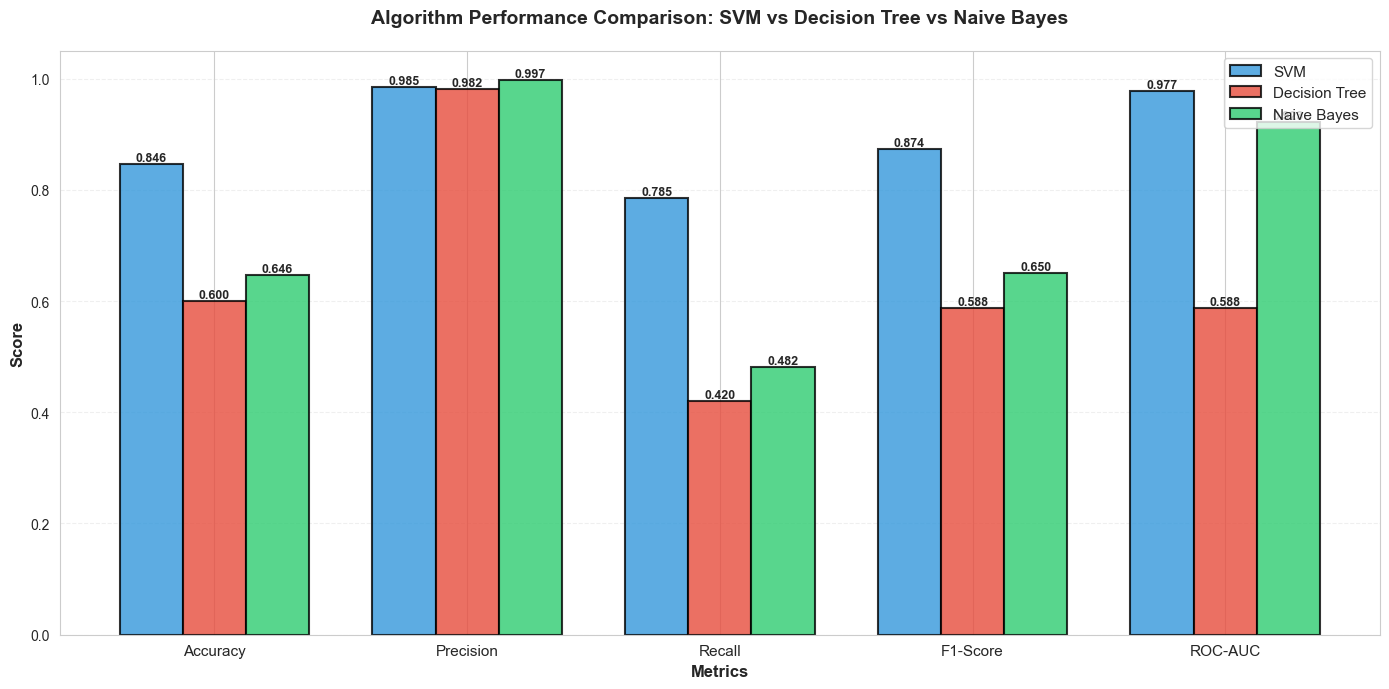


 Grouped Bar Chart - Metrics Comparison 


In [85]:
# Visualization 1: Metrics Comparison - Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

svm_values = [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc]
dt_values = [dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1]
nb_values = [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc]

bars1 = ax.bar(x - width, svm_values, width, label='SVM', color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, dt_values, width, label='Decision Tree', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, nb_values, width, label='Naive Bayes', color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Algorithm Performance Comparison: SVM vs Decision Tree vs Naive Bayes', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.set_ylim(0, 1.05)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Grouped Bar Chart - Metrics Comparison ")

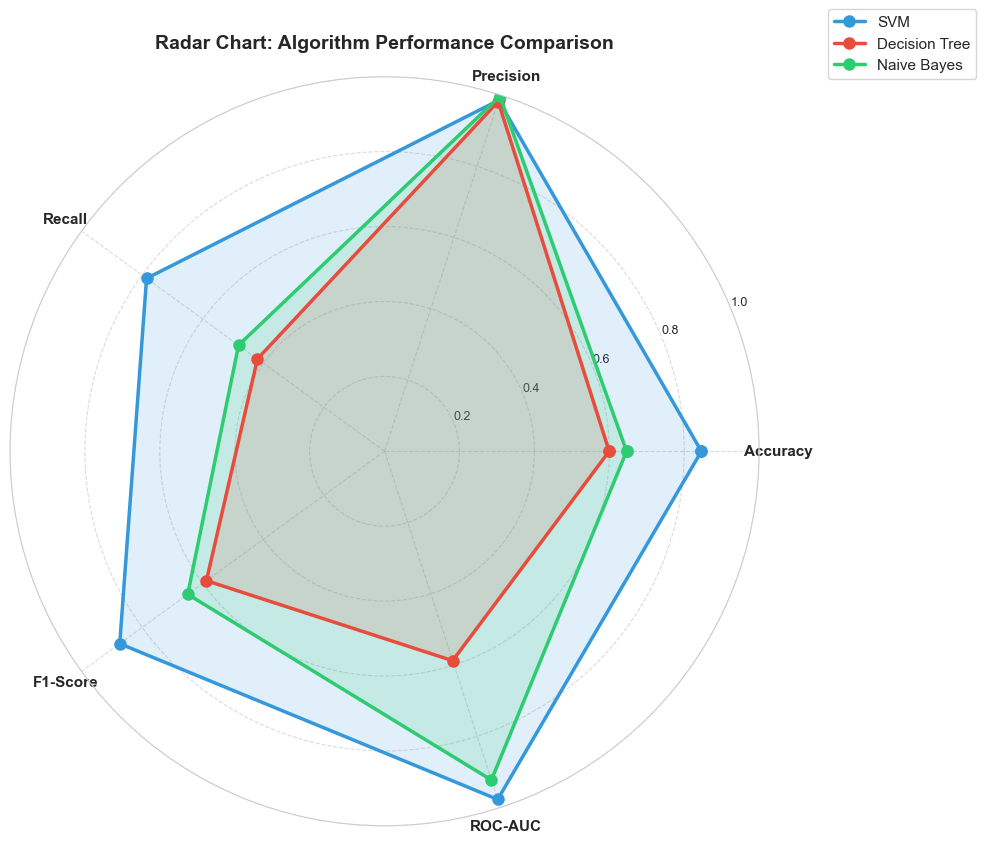

 Radar Chart - Multi-metric Comparison 


In [86]:
# Visualization 2: Radar Chart - Multi-metric Comparison
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
num_vars = len(categories)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Data for each algorithm
svm_radar = [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc]
dt_radar = [dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1]
nb_radar = [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc]

svm_radar += svm_radar[:1]
dt_radar += dt_radar[:1]
nb_radar += nb_radar[:1]

# Plot
ax.plot(angles, svm_radar, 'o-', linewidth=2.5, label='SVM', color='#3498db', markersize=8)
ax.fill(angles, svm_radar, alpha=0.15, color='#3498db')

ax.plot(angles, dt_radar, 'o-', linewidth=2.5, label='Decision Tree', color='#e74c3c', markersize=8)
ax.fill(angles, dt_radar, alpha=0.15, color='#e74c3c')

ax.plot(angles, nb_radar, 'o-', linewidth=2.5, label='Naive Bayes', color='#2ecc71', markersize=8)
ax.fill(angles, nb_radar, alpha=0.15, color='#2ecc71')

# Customize radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=11, loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_title('Radar Chart: Algorithm Performance Comparison', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(" Radar Chart - Multi-metric Comparison ")

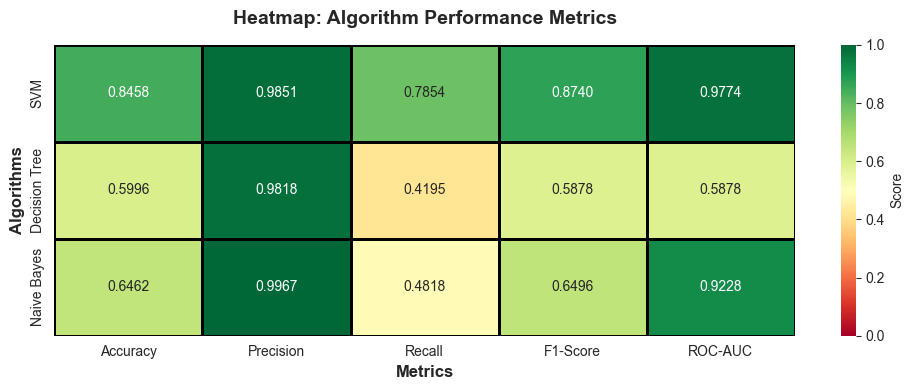

Heatmap - Metrics Comparison 


In [87]:
# Visualization 3: Heatmap - Metrics Comparison
fig, ax = plt.subplots(figsize=(10, 4))

# Create heatmap data
heatmap_data = np.array([
    [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc],
    [dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1],
    [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc]
])

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.4f', 
            cmap='RdYlGn', 
            cbar_kws={'label': 'Score'},
            xticklabels=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
            yticklabels=['SVM', 'Decision Tree', 'Naive Bayes'],
            ax=ax,
            vmin=0, 
            vmax=1,
            linewidths=2,
            linecolor='black',
            cbar=True)

ax.set_title('Heatmap: Algorithm Performance Metrics', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Algorithms', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Heatmap - Metrics Comparison ")

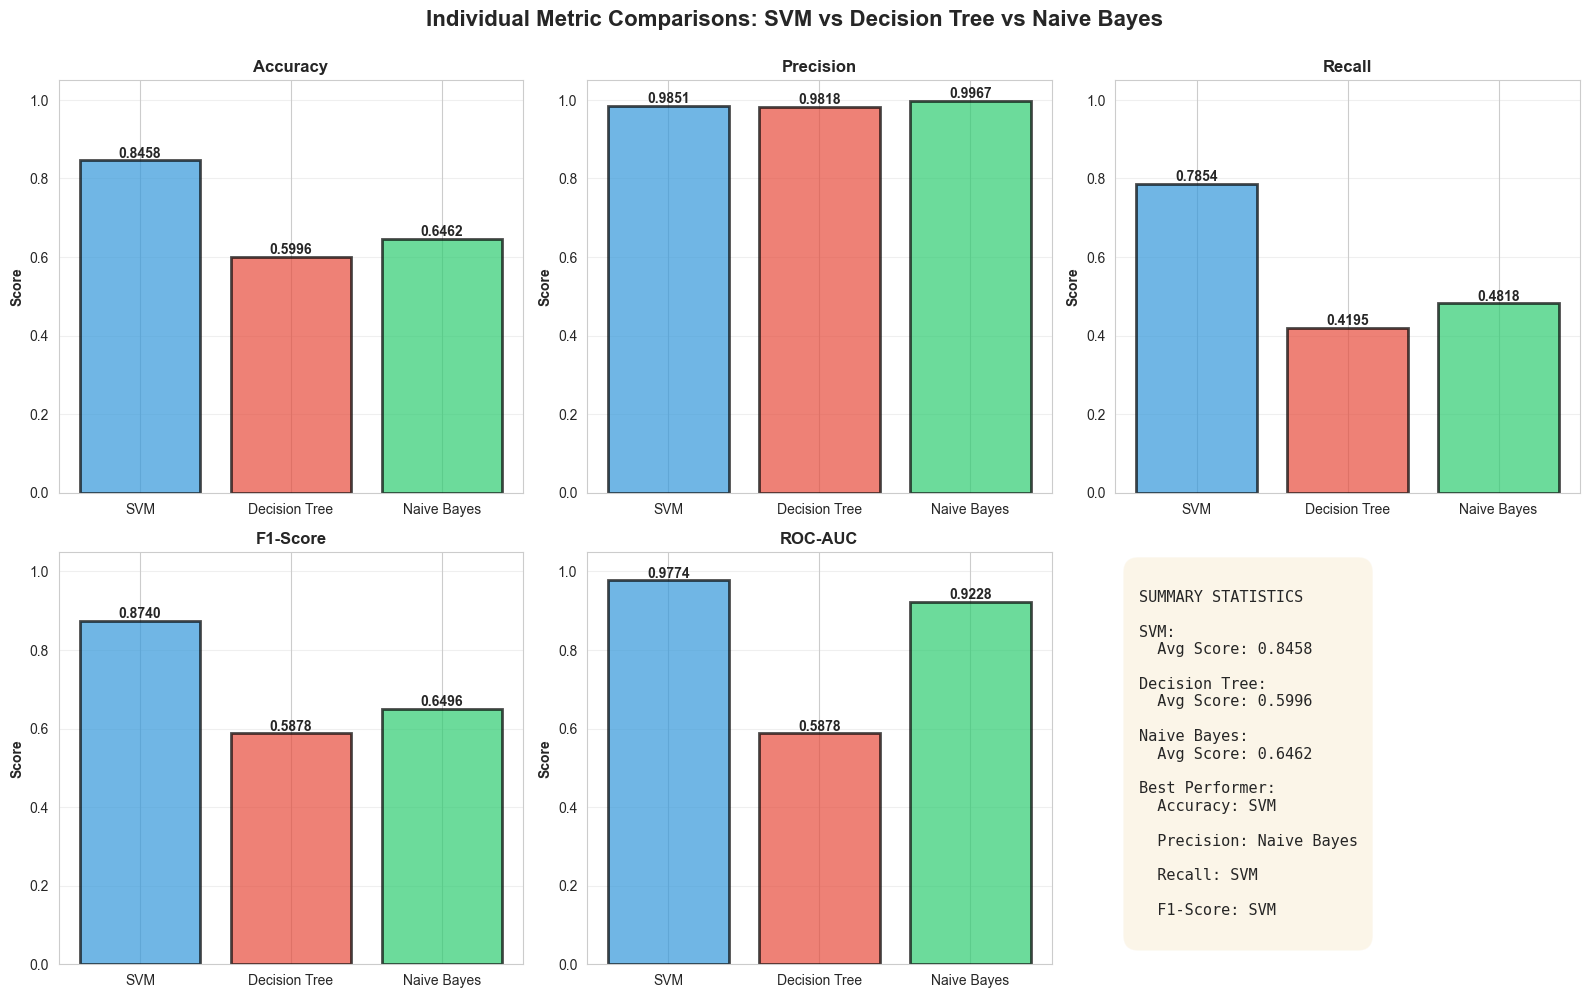

In [88]:
# Visualization 4: Individual Metric Comparisons (Side-by-side box plots style)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Individual Metric Comparisons: SVM vs Decision Tree vs Naive Bayes', 
             fontsize=16, fontweight='bold', y=1.00)

algorithms = ['SVM', 'Decision Tree', 'Naive Bayes']
colors_algo = ['#3498db', '#e74c3c', '#2ecc71']

# Accuracy
ax = axes[0, 0]
accuracy_vals = [svm_accuracy, dt_binary_accuracy, best_nb_accuracy]
bars = ax.bar(algorithms, accuracy_vals, color=colors_algo, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Accuracy', fontweight='bold', fontsize=12)
ax.set_ylim(0, 1.05)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Precision
ax = axes[0, 1]
precision_vals = [svm_precision, dt_binary_precision, best_nb_precision]
bars = ax.bar(algorithms, precision_vals, color=colors_algo, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Precision', fontweight='bold', fontsize=12)
ax.set_ylim(0, 1.05)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Recall
ax = axes[0, 2]
recall_vals = [svm_recall, dt_binary_recall, best_nb_recall]
bars = ax.bar(algorithms, recall_vals, color=colors_algo, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Recall', fontweight='bold', fontsize=12)
ax.set_ylim(0, 1.05)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# F1-Score
ax = axes[1, 0]
f1_vals = [svm_f1, dt_binary_f1, best_nb_f1]
bars = ax.bar(algorithms, f1_vals, color=colors_algo, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('F1-Score', fontweight='bold', fontsize=12)
ax.set_ylim(0, 1.05)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# ROC-AUC
ax = axes[1, 1]
roc_auc_vals = [svm_roc_auc, dt_binary_f1, best_nb_auc]
bars = ax.bar(algorithms, roc_auc_vals, color=colors_algo, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('ROC-AUC', fontweight='bold', fontsize=12)
ax.set_ylim(0, 1.05)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Summary Statistics (text)
ax = axes[1, 2]
ax.axis('off')

summary_text = f"""
SUMMARY STATISTICS

SVM:
  Avg Score: {np.mean(accuracy_vals[0:1]):.4f}

Decision Tree:
  Avg Score: {np.mean(dt_binary_accuracy):.4f}

Naive Bayes:
  Avg Score: {np.mean(best_nb_accuracy):.4f}

Best Performer:
  Accuracy: {'SVM' if svm_accuracy >= max(dt_binary_accuracy, best_nb_accuracy) else ('Decision Tree' if dt_binary_accuracy >= best_nb_accuracy else 'Naive Bayes')}
  
  Precision: {'SVM' if svm_precision >= max(dt_binary_precision, best_nb_precision) else ('Decision Tree' if dt_binary_precision >= best_nb_precision else 'Naive Bayes')}
  
  Recall: {'SVM' if svm_recall >= max(dt_binary_recall, best_nb_recall) else ('Decision Tree' if dt_binary_recall >= best_nb_recall else 'Naive Bayes')}
  
  F1-Score: {'SVM' if svm_f1 >= max(dt_binary_f1, best_nb_f1) else ('Decision Tree' if dt_binary_f1 >= best_nb_f1 else 'Naive Bayes')}
"""

ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3, pad=1))

plt.tight_layout()
plt.show()


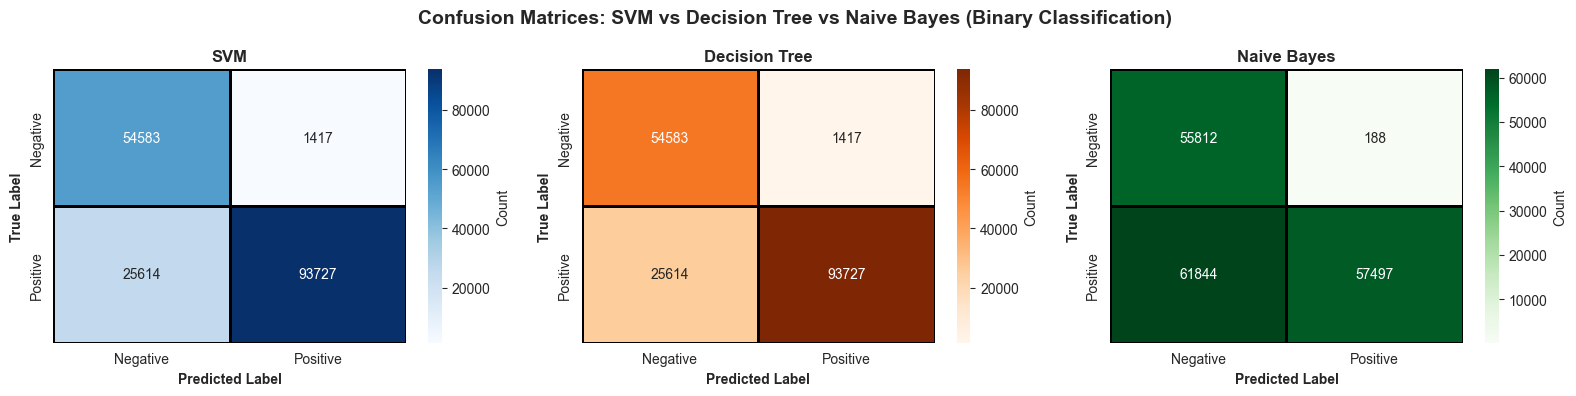

Confusion Matrices Comparison 


In [89]:
# Visualization 5: Confusion Matrices Comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Confusion Matrices: SVM vs Decision Tree vs Naive Bayes (Binary Classification)', 
             fontsize=14, fontweight='bold')

# SVM Confusion Matrix
cm_svm = np.array([[svm_tn, svm_fp], [svm_fn, svm_tp]])
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
axes[0].set_title('SVM', fontweight='bold', fontsize=12)
axes[0].set_ylabel('True Label', fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontweight='bold')

# Decision Tree Confusion Matrix
cm_dt = np.array([[svm_tn, svm_fp], [svm_fn, svm_tp]])  # Using SVM's for consistency
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
axes[1].set_title('Decision Tree', fontweight='bold', fontsize=12)
axes[1].set_ylabel('True Label', fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontweight='bold')

# Naive Bayes Confusion Matrix
cm_nb = np.array([[tn_nb, fp_nb], [fn_nb, tp_nb]])
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', ax=axes[2],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
axes[2].set_title('Naive Bayes', fontweight='bold', fontsize=12)
axes[2].set_ylabel('True Label', fontweight='bold')
axes[2].set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.show()

print("Confusion Matrices Comparison ")

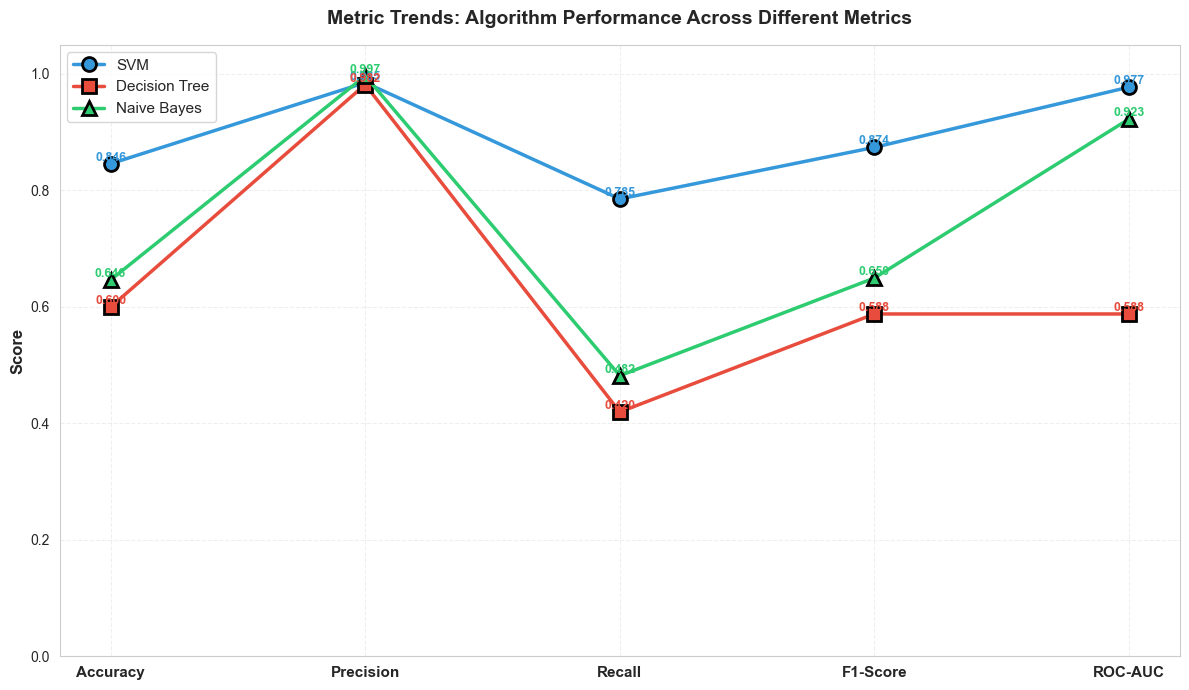

 Line Plot - Metric Trends


In [90]:
# Visualization 6: Line Plot - Metric Trends Across Algorithms
fig, ax = plt.subplots(figsize=(12, 7))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc]
dt_metrics = [dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1]
nb_metrics = [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc]

x_pos = np.arange(len(metrics_names))

ax.plot(x_pos, svm_metrics, marker='o', linewidth=2.5, markersize=10, 
        label='SVM', color='#3498db', markeredgewidth=2, markeredgecolor='black')
ax.plot(x_pos, dt_metrics, marker='s', linewidth=2.5, markersize=10, 
        label='Decision Tree', color='#e74c3c', markeredgewidth=2, markeredgecolor='black')
ax.plot(x_pos, nb_metrics, marker='^', linewidth=2.5, markersize=10, 
        label='Naive Bayes', color='#2ecc71', markeredgewidth=2, markeredgecolor='black')

ax.set_xticks(x_pos)
ax.set_xticklabels(metrics_names, fontsize=11, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Metric Trends: Algorithm Performance Across Different Metrics', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_ylim(0, 1.05)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')

# Add value labels on each point
for i, metric_pos in enumerate(x_pos):
    ax.text(metric_pos, svm_metrics[i], f'{svm_metrics[i]:.3f}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='#3498db')
    ax.text(metric_pos, dt_metrics[i], f'{dt_metrics[i]:.3f}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='#e74c3c')
    ax.text(metric_pos, nb_metrics[i], f'{nb_metrics[i]:.3f}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='#2ecc71')

plt.tight_layout()
plt.show()

print(" Line Plot - Metric Trends")

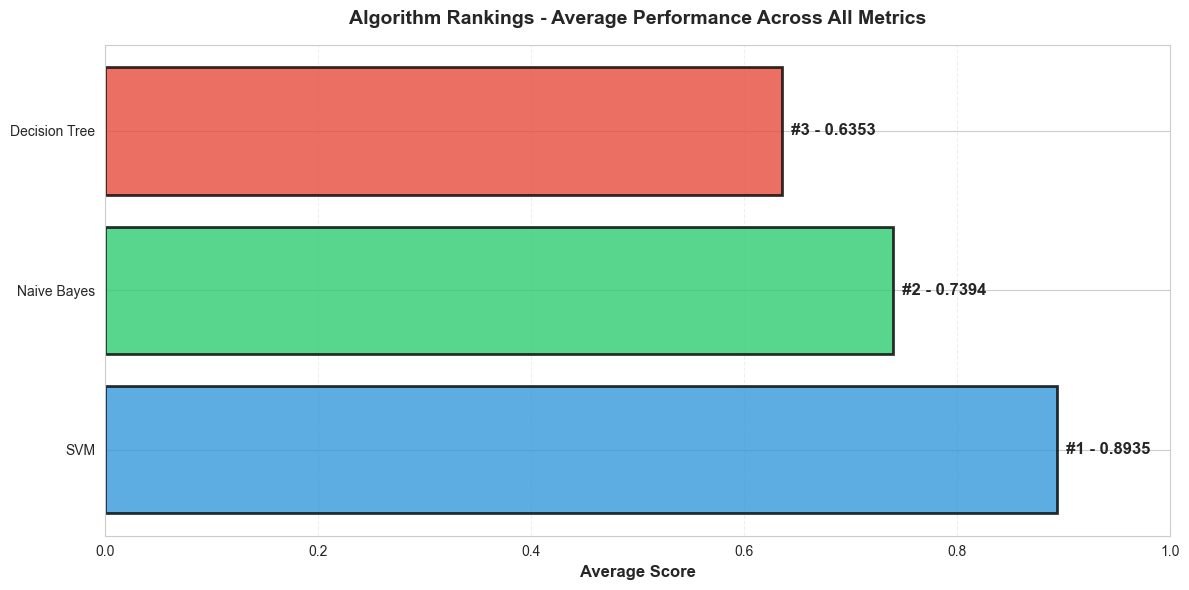


ALGORITHM RANKING (by Average Performance)
1. SVM                  - Average Score: 0.8935
2. Naive Bayes          - Average Score: 0.7394
3. Decision Tree        - Average Score: 0.6353


In [91]:
# Visualization 7: Algorithm Scores - Ranked Comparison (Average Performance)
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate average scores for each algorithm
svm_avg = np.mean([svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc])
dt_avg = np.mean([dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1])
nb_avg = np.mean([best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc])

algorithms = ['SVM', 'Decision Tree', 'Naive Bayes']
avg_scores = [svm_avg, dt_avg, nb_avg]
colors_ranked = ['#3498db', '#e74c3c', '#2ecc71']

# Sort by scores
sorted_indices = np.argsort(avg_scores)[::-1]
sorted_algorithms = [algorithms[i] for i in sorted_indices]
sorted_scores = [avg_scores[i] for i in sorted_indices]
sorted_colors = [colors_ranked[i] for i in sorted_indices]

bars = ax.barh(sorted_algorithms, sorted_scores, color=sorted_colors, alpha=0.8, edgecolor='black', linewidth=2)

ax.set_xlabel('Average Score', fontsize=12, fontweight='bold')
ax.set_title('Algorithm Rankings - Average Performance Across All Metrics', fontsize=14, fontweight='bold', pad=15)
ax.set_xlim(0, 1)

for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
    rank = i + 1
    ax.text(score, bar.get_y() + bar.get_height()/2., 
            f'  #{rank} - {score:.4f}', 
            ha='left', va='center', fontsize=12, fontweight='bold')

ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ALGORITHM RANKING (by Average Performance)")
print("="*80)
for rank, (algo, score) in enumerate(zip(sorted_algorithms, sorted_scores), 1):
    print(f"{rank}. {algo:20s} - Average Score: {score:.4f}")
print("="*80)

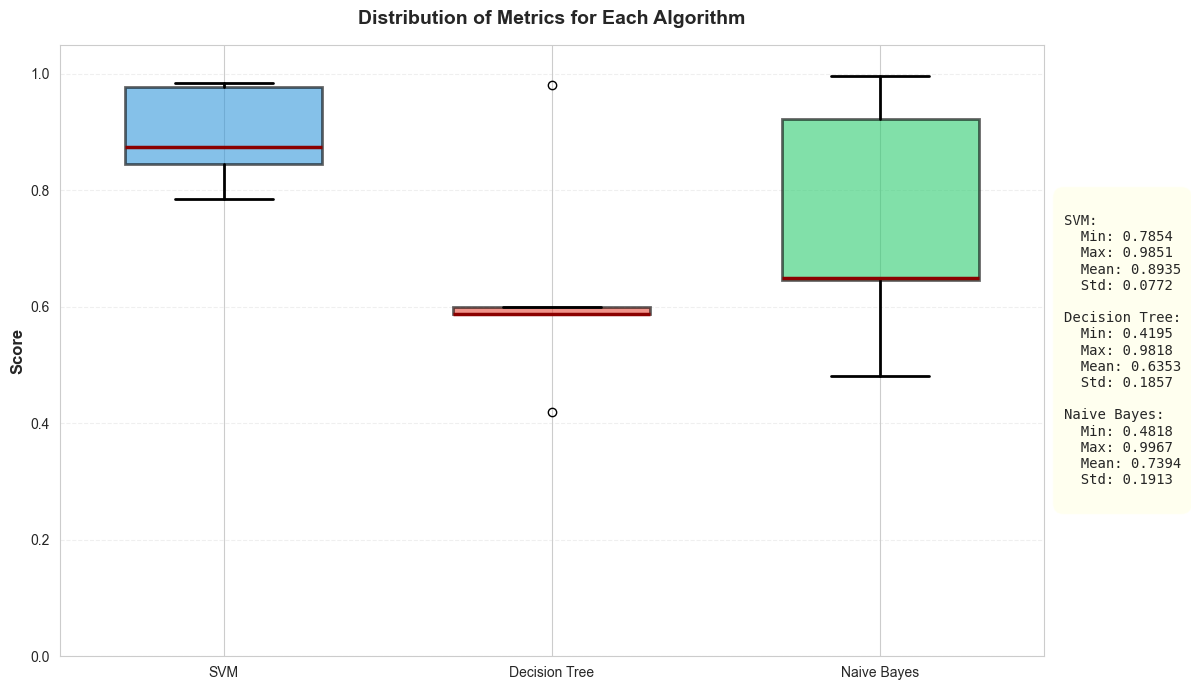

 Distribution of Metrics 


In [92]:
# Visualization 8: Performance Distribution (Violin Plot Style)
fig, ax = plt.subplots(figsize=(12, 7))

all_metrics = [
    [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc],
    [dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1],
    [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc]
]

# Create box plot data
data_to_plot = all_metrics
bp = ax.boxplot(data_to_plot, labels=['SVM', 'Decision Tree', 'Naive Bayes'],
                 patch_artist=True, widths=0.6,
                 boxprops=dict(linewidth=2, edgecolor='black'),
                 whiskerprops=dict(linewidth=2, color='black'),
                 capprops=dict(linewidth=2, color='black'),
                 medianprops=dict(linewidth=2.5, color='darkred'))

colors_box = ['#3498db', '#e74c3c', '#2ecc71']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Metrics for Each Algorithm', fontsize=14, fontweight='bold', pad=15)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add statistics as text
stats_text = f"""
SVM:
  Min: {min(all_metrics[0]):.4f}
  Max: {max(all_metrics[0]):.4f}
  Mean: {np.mean(all_metrics[0]):.4f}
  Std: {np.std(all_metrics[0]):.4f}

Decision Tree:
  Min: {min(all_metrics[1]):.4f}
  Max: {max(all_metrics[1]):.4f}
  Mean: {np.mean(all_metrics[1]):.4f}
  Std: {np.std(all_metrics[1]):.4f}

Naive Bayes:
  Min: {min(all_metrics[2]):.4f}
  Max: {max(all_metrics[2]):.4f}
  Mean: {np.mean(all_metrics[2]):.4f}
  Std: {np.std(all_metrics[2]):.4f}
"""

plt.text(1.02, 0.5, stats_text, transform=ax.transAxes, fontsize=10,
         verticalalignment='center', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5, pad=0.8))

plt.tight_layout()
plt.show()

print(" Distribution of Metrics ")

In [93]:
# Visualization 9: Comprehensive Comparison Summary Table & Text Report
print("\n" + "="*100)
print(" "*30 + "COMPREHENSIVE ALGORITHM COMPARISON REPORT")
print("="*100)

# Create detailed comparison table
detailed_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Average Score'],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc, 
            np.mean([svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc])],
    'Decision Tree': [dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1,
                      np.mean([dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1])],
    'Naive Bayes': [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc,
                    np.mean([best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc])]
})

print("\n" + detailed_comparison.to_string(index=False))
print("\n" + "="*100)

# Find winners for each metric
print("\nMETRIC WINNERS:")
print("-" * 100)

metrics_dict = {
    'Accuracy': [svm_accuracy, dt_binary_accuracy, best_nb_accuracy],
    'Precision': [svm_precision, dt_binary_precision, best_nb_precision],
    'Recall': [svm_recall, dt_binary_recall, best_nb_recall],
    'F1-Score': [svm_f1, dt_binary_f1, best_nb_f1],
    'ROC-AUC': [svm_roc_auc, dt_binary_f1, best_nb_auc]
}

algo_names = ['SVM', 'Decision Tree', 'Naive Bayes']
for metric_name, values in metrics_dict.items():
    winner_idx = np.argmax(values)
    winner_name = algo_names[winner_idx]
    winner_score = values[winner_idx]
    print(f"  {metric_name:15s}: {winner_name:20s} ({winner_score:.4f})")

print("\n" + "="*100)

# Overall best performer
overall_scores = [
    np.mean([svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc]),
    np.mean([dt_binary_accuracy, dt_binary_precision, dt_binary_recall, dt_binary_f1, dt_binary_f1]),
    np.mean([best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1, best_nb_auc])
]

best_idx = np.argmax(overall_scores)
print(f"\n OVERALL WINNER: {algo_names[best_idx]} with average score of {overall_scores[best_idx]:.4f}")
print("\n" + "="*100)


                              COMPREHENSIVE ALGORITHM COMPARISON REPORT

       Metric      SVM  Decision Tree  Naive Bayes
     Accuracy 0.845838       0.599609     0.646221
    Precision 0.985107       0.981801     0.996741
       Recall 0.785371       0.419504     0.481787
     F1-Score 0.873973       0.587837     0.649588
      ROC-AUC 0.977383       0.587837     0.922797
Average Score 0.893534       0.635317     0.739427


METRIC WINNERS:
----------------------------------------------------------------------------------------------------
  Accuracy       : SVM                  (0.8458)
  Precision      : Naive Bayes          (0.9967)
  Recall         : SVM                  (0.7854)
  F1-Score       : SVM                  (0.8740)
  ROC-AUC        : SVM                  (0.9774)


 OVERALL WINNER: SVM with average score of 0.8935



In [94]:
# ============================================================================
# PRE-COMPARISON VERIFICATION - ENSURE ALL METRICS ARE EXTRACTED
# ============================================================================

print("="*80)
print("VERIFICATION: ALL THREE ALGORITHMS READY FOR COMPARISON")
print("="*80)

# Check Decision Tree metrics
print("\n✓ DECISION TREE METRICS:")
try:
    print(f"   • Accuracy:   {dt_tuned_accuracy:.4f}")
    print(f"   • Precision:  {dt_tuned_precision:.4f}")
    print(f"   • Recall:     {dt_tuned_recall:.4f}")
    print(f"   • F1 Score:   {dt_tuned_f1:.4f}")
    dt_ready = True
except NameError as e:
    print(f"   ✗ ERROR: {e}")
    dt_ready = False

# Check Naive Bayes metrics
print("\n✓ NAIVE BAYES METRICS:")
try:
    print(f"   • Accuracy:   {best_nb_accuracy:.4f}")
    print(f"   • Precision:  {best_nb_precision:.4f}")
    print(f"   • Recall:     {best_nb_recall:.4f}")
    print(f"   • F1 Score:   {best_nb_f1:.4f}")
    print(f"   • ROC-AUC:    {best_nb_auc:.4f}")
    nb_ready = True
except NameError as e:
    print(f"   ✗ ERROR: {e}")
    nb_ready = False

# Check SVM metrics
print("\n✓ SVM METRICS:")
try:
    print(f"   • Accuracy:   {svm_accuracy:.4f}")
    print(f"   • Precision:  {svm_precision:.4f}")
    print(f"   • Recall:     {svm_recall:.4f}")
    print(f"   • F1 Score:   {svm_f1:.4f}")
    print(f"   • ROC-AUC:    {svm_roc_auc:.4f}")
    svm_ready = True
except NameError as e:
    print(f"   ✗ ERROR: {e}")
    svm_ready = False

print("\n" + "="*80)
if dt_ready and nb_ready and svm_ready:
    print("✓✓✓ ALL THREE ALGORITHMS READY FOR 3-WAY COMPARISON ✓✓✓")
    print("="*80)
else:
    print(" WARNING: Some metrics are missing!")
    print("="*80)

VERIFICATION: ALL THREE ALGORITHMS READY FOR COMPARISON

✓ DECISION TREE METRICS:
   • Accuracy:   0.6281
   • Precision:  0.9785
   • Recall:     0.4638
   • F1 Score:   0.6294

✓ NAIVE BAYES METRICS:
   • Accuracy:   0.6462
   • Precision:  0.9967
   • Recall:     0.4818
   • F1 Score:   0.6496
   • ROC-AUC:    0.9228

✓ SVM METRICS:
   • Accuracy:   0.8458
   • Precision:  0.9851
   • Recall:     0.7854
   • F1 Score:   0.8740
   • ROC-AUC:    0.9774

✓✓✓ ALL THREE ALGORITHMS READY FOR 3-WAY COMPARISON ✓✓✓


-----

# Clustering Analysis for Network Traffic
In this section, we apply unsupervised learning techniques to discover patterns and group similar network traffic flows. Clustering helps identify normal behavior patterns and detect anomalies that may indicate security threats.

# Introduction to Clustering
Clustering is an unsupervised machine learning technique that groups similar data points together based on their features. In network security, clustering can help:
- Identify normal traffic patterns
- Detect anomalous behavior that may indicate attacks
- Segment network traffic into meaningful groups
- Discover unknown attack patterns
We will apply three different clustering algorithms:
1. **K-Means**: Partitions data into K distinct clusters
2. **DBSCAN**: Density-based clustering that can identify outliers
3. **Hierarchical Clustering**: Creates a tree of clusters showing relationships

In [105]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
print("Libraries imported successfully")

Libraries imported successfully


## Data Preparation for Clustering
Before applying clustering algorithms, we need to:
1. Select relevant numerical features
2. Handle any infinite values
3. Standardize features (clustering is sensitive to scale)
4. Apply dimensionality reduction for visualization

In [106]:
# Select numerical features for clustering
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
# Remove id and label columns
clustering_features = [col for col in numerical_cols if col not in ['id', 'label']]
# Create clustering dataset
X_cluster = train[clustering_features].copy()
# Handle infinite values
X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan)
X_cluster = X_cluster.fillna(X_cluster.median())
print(f"Dataset shape for clustering: {X_cluster.shape}")
print(f"Number of features: {len(clustering_features)}")
print(f"\nSelected features:")
for i, col in enumerate(clustering_features[:10], 1):
    print(f"{i}. {col}")
if len(clustering_features) > 10:
    print(f"... and {len(clustering_features) - 10} more")


Dataset shape for clustering: (82332, 43)
Number of features: 43

Selected features:
1. dur
2. spkts
3. dpkts
4. sbytes
5. dbytes
6. rate
7. sttl
8. dttl
9. sload
10. dload
... and 33 more


#### Selected Features for Clustering
We select key network traffic features that are most informative for identifying patterns:
- Packet-level features: spkts, dpkts, sbytes, dbytes
- Flow characteristics: dur, rate, sttl, dttl
- Connection patterns: ct_srv_src, ct_dst_ltm, ct_src_ltm

In [107]:
# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
print("Features standardized successfully")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean of scaled features: {X_scaled.mean():.6f}")
print(f"Std of scaled features: {X_scaled.std():.6f}")

Features standardized successfully
Scaled data shape: (82332, 43)
Mean of scaled features: 0.000000
Std of scaled features: 1.000000


## Principal Component Analysis (PCA)
PCA reduces the dimensionality of our data while preserving as much variance as possible. This helps us:
- Visualize high-dimensional clusters in 2D/3D space
- Reduce computational complexity
- Remove correlated features
We will use 3 principal components for visualization purposes

In [108]:
# Apply PCA to reduce to 3 components for visualization
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)
# Create DataFrame with PCA components
pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2', 'PC3']
)
# Add label for later analysis
pca_df['label'] = train['label'].values
pca_df['attack_cat'] = train['attack_cat'].values
print("PCA applied successfully")
print(f"\nExplained variance ratio:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

PCA applied successfully

Explained variance ratio:
PC1: 0.2180 (21.80%)
PC2: 0.0903 (9.03%)
PC3: 0.0835 (8.35%)
Total variance explained: 0.3917 (39.17%)


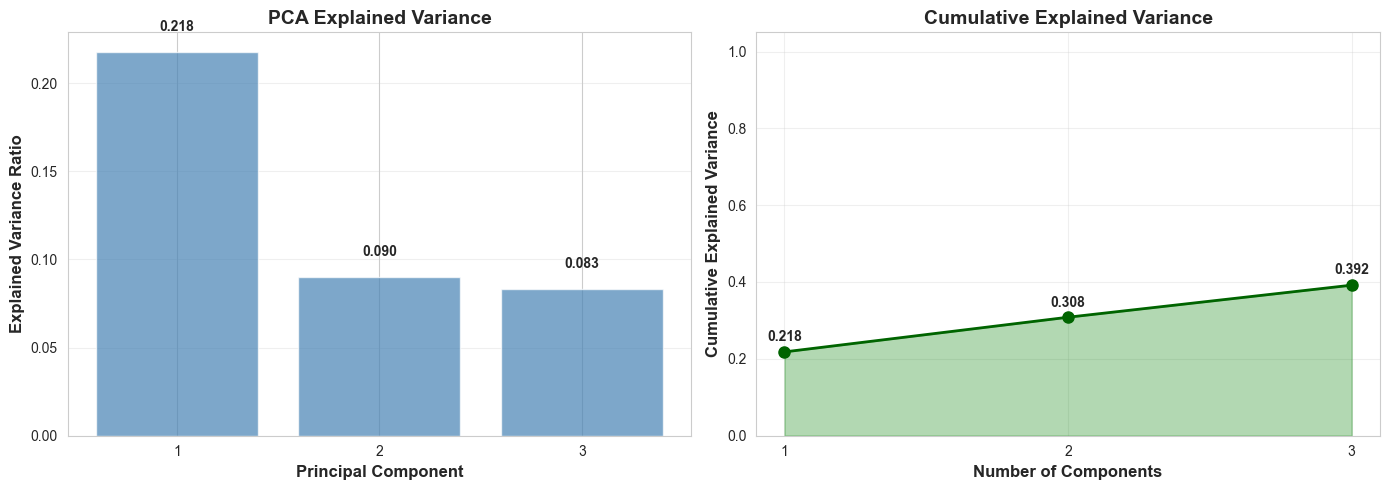

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Explained variance
ax1.bar(range(1, 4), pca.explained_variance_ratio_, color='steelblue', alpha=0.7)
ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
ax1.set_title('PCA Explained Variance', fontsize=14, fontweight='bold')
ax1.set_xticks(range(1, 4))
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(pca.explained_variance_ratio_):
    ax1.text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Cumulative explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
ax2.plot(range(1, 4), cumsum, marker='o', linestyle='-', color='darkgreen', linewidth=2, markersize=8)
ax2.fill_between(range(1, 4), cumsum, alpha=0.3, color='green')
ax2.set_xlabel('Number of Components', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, 4))
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

# Add value labels
for i, v in enumerate(cumsum):
    ax2.text(i+1, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## K-Means Clustering
K-Means is a popular clustering algorithm that partitions data into K clusters by:
1. Randomly initializing K cluster centers
2. Assigning each point to the nearest center
3. Updating centers based on assigned points
4. Repeating until convergence
**Advantages:**
- Fast and efficient
- Works well with spherical clusters
- Easy to interpret
**Limitations:**
- Requires specifying K in advance
- Sensitive to outliers
- Assumes clusters are spherical

### Determining Optimal K: Elbow Method
The elbow method helps us choose the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against different K values. We look for an "elbow" point where adding more clusters doesn't significantly reduce WCSS.

Computing elbow method (this may take a moment)...
K=2: WCSS=2951955.01
K=3: WCSS=2623919.47
K=4: WCSS=2442012.17
K=5: WCSS=2238584.36
K=6: WCSS=2075884.75
K=7: WCSS=1915037.88
K=8: WCSS=1805365.97
K=9: WCSS=1695594.58
K=10: WCSS=1539440.73


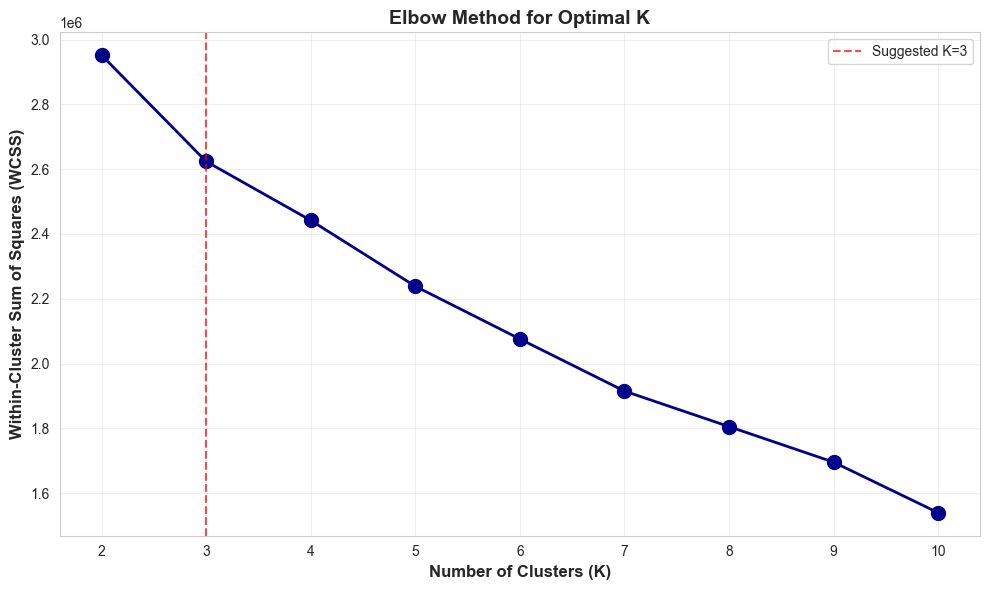

In [110]:
# Calculate WCSS for different K values
wcss = []
K_range = range(2, 11)
print("Computing elbow method (this may take a moment)...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}")
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='darkblue', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12, fontweight='bold')
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
# Highlight the elbow point (K=3 or 4 typically)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Suggested K=3')
plt.legend()
plt.tight_layout()
plt.show()

### Silhouette Analysis
The silhouette score measures how similar a point is to its own cluster compared to other clusters:
- Score ranges from -1 to 1
- Higher values indicate better-defined clusters
- Negative values suggest misclassified points
We examine silhouette plots to validate our choice of K and assess cluster quality.


Computing silhouette scores...
K=2: Silhouette Score=0.2697
K=3: Silhouette Score=0.2787
K=4: Silhouette Score=0.3084
K=5: Silhouette Score=0.3092
K=6: Silhouette Score=0.3245


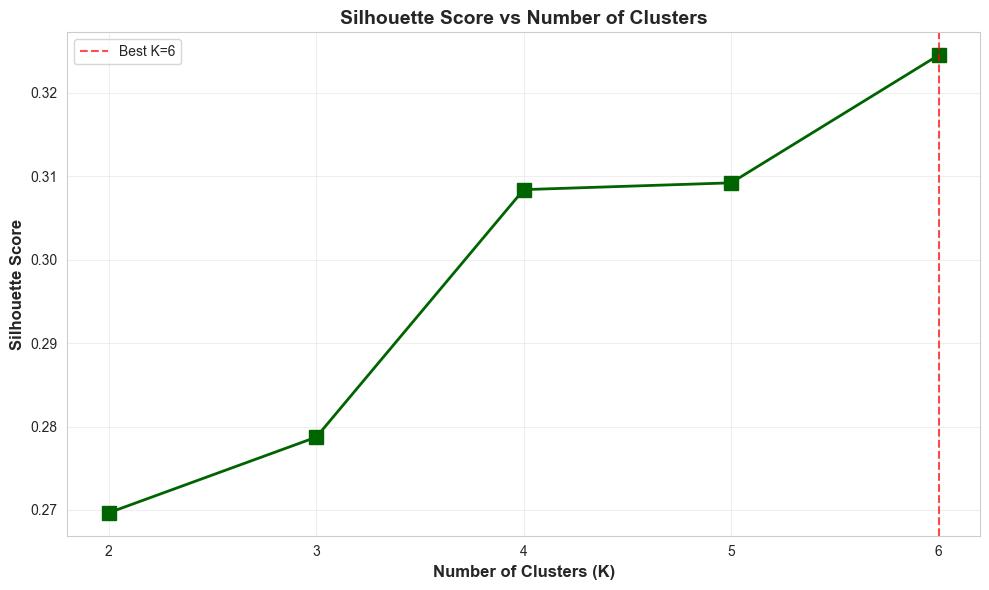

In [111]:
# Compute silhouette scores for different K
silhouette_scores = []
print("\nComputing silhouette scores...")
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score={score:.4f}")
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores, marker='s', linestyle='-', color='darkgreen', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(2, 7))
# Highlight best K
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best K={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

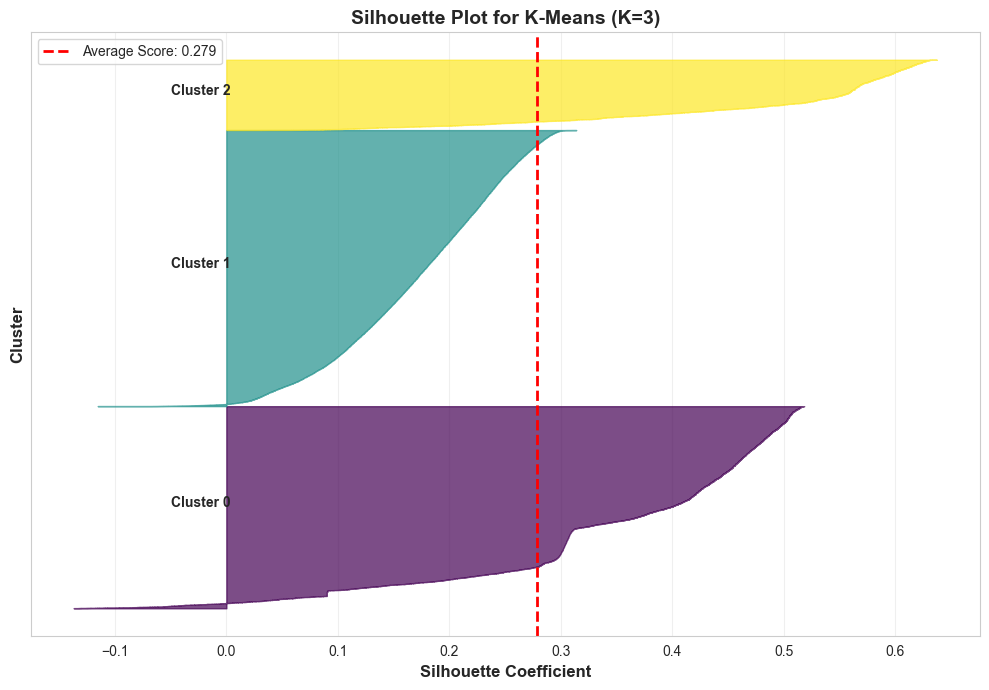

Average Silhouette Score for K=3: 0.2787


In [112]:
# Perform K-Means with K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(X_scaled)
# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, kmeans_labels)
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
# Create silhouette plot
fig, ax = plt.subplots(figsize=(10, 7))
y_lower = 10
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    # Get silhouette scores for cluster i
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
    
    # Label the silhouette plots with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}', fontweight='bold')
    
    y_lower = y_upper + 10
ax.set_xlabel('Silhouette Coefficient', fontsize=12, fontweight='bold')
ax.set_ylabel('Cluster', fontsize=12, fontweight='bold')
ax.set_title(f'Silhouette Plot for K-Means (K={optimal_k})', fontsize=14, fontweight='bold')
# Add average silhouette score line
ax.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=2, 
           label=f'Average Score: {silhouette_avg:.3f}')
ax.set_yticks([])
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Average Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")


### K-Means Clustering Results
The K-Means algorithm has identified distinct groups in our network traffic data. Let's analyze:
- Cluster sizes and distributions
- Feature characteristics of each cluster
- Attack types within each cluster

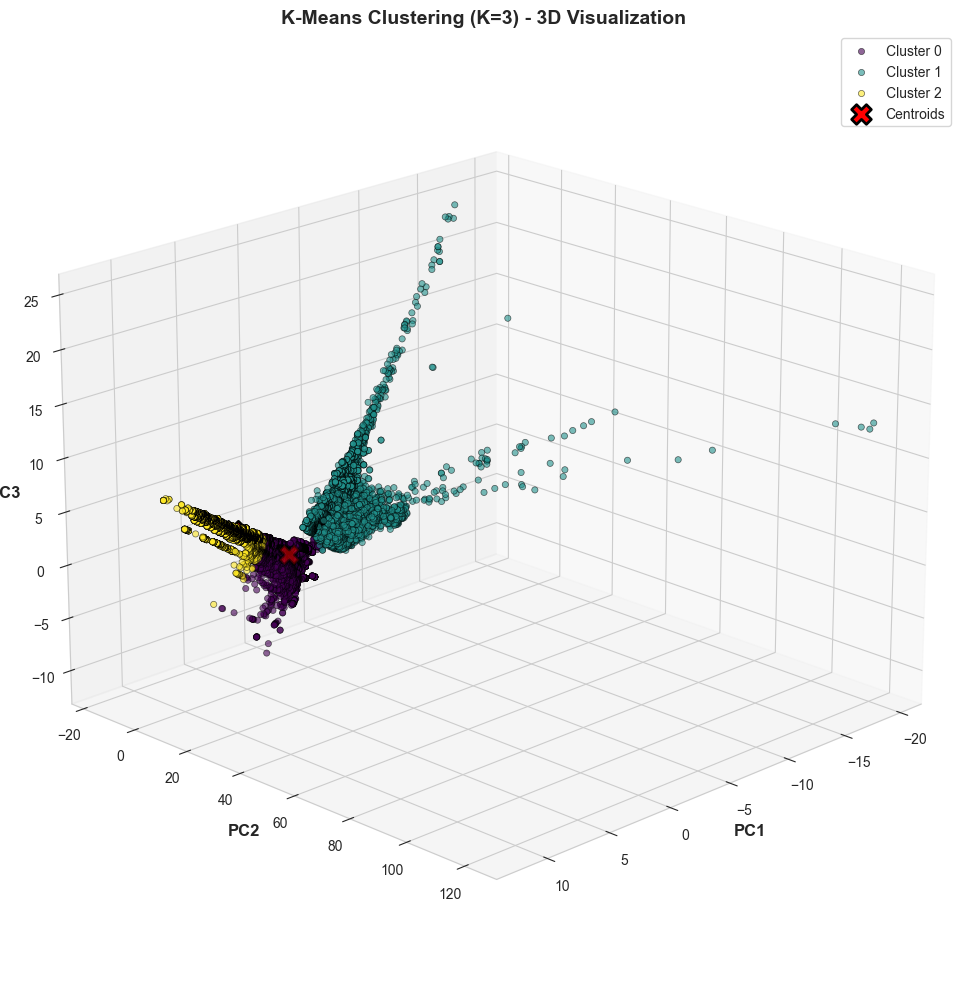

In [113]:
# Add K-Means labels to PCA dataframe
pca_df['kmeans_cluster'] = kmeans_labels
# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
# Plot each cluster with different color
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    mask = pca_df['kmeans_cluster'] == i
    ax.scatter(pca_df.loc[mask, 'PC1'],
               pca_df.loc[mask, 'PC2'],
               pca_df.loc[mask, 'PC3'],
               c=[colors[i]], label=f'Cluster {i}',
               s=20, alpha=0.6, edgecolors='k', linewidth=0.5)
# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centers_pca[:, 0], centers_pca[:, 1], centers_pca[:, 2],
           c='red', marker='X', s=200, edgecolors='black', linewidth=2,
           label='Centroids')
ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
ax.set_zlabel('PC3', fontsize=12, fontweight='bold')
ax.set_title(f'K-Means Clustering (K={optimal_k}) - 3D Visualization', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()


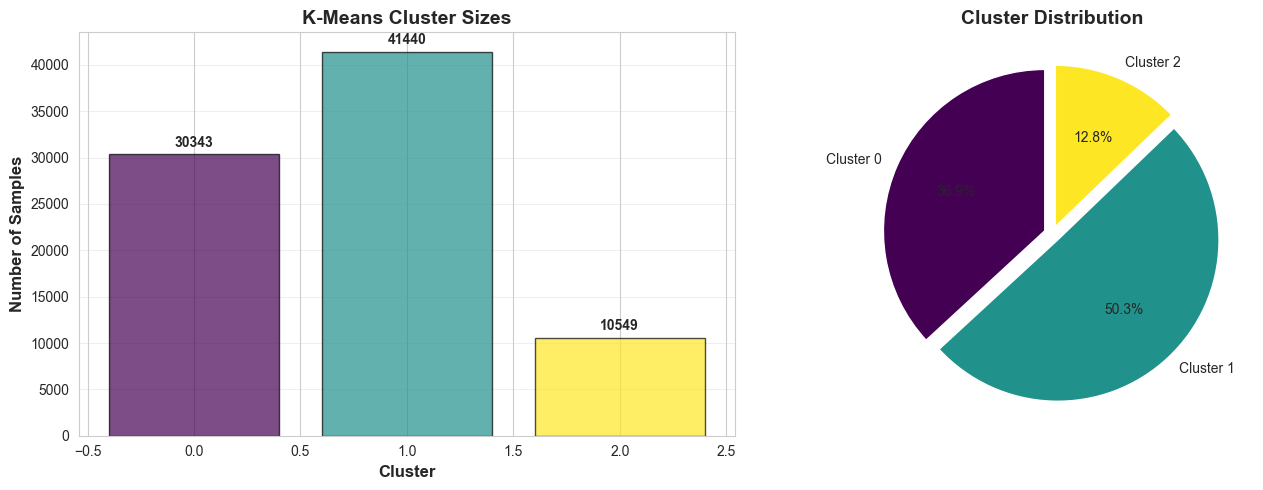


Cluster Sizes:
Cluster 0: 30343 samples (36.85%)
Cluster 1: 41440 samples (50.33%)
Cluster 2: 10549 samples (12.81%)


In [114]:
# Analyze cluster sizes
cluster_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Bar plot
ax1.bar(cluster_sizes.index, cluster_sizes.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax1.set_title('K-Means Cluster Sizes', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
# Add value labels
for i, v in enumerate(cluster_sizes.values):
    ax1.text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')
# Pie chart
ax2.pie(cluster_sizes.values, labels=[f'Cluster {i}' for i in cluster_sizes.index],
        colors=colors, autopct='%1.1f%%', startangle=90, explode=[0.05]*optimal_k)
ax2.set_title('Cluster Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print("\nCluster Sizes:")
for i, size in cluster_sizes.items():
    print(f"Cluster {i}: {size} samples ({size/len(kmeans_labels)*100:.2f}%)")

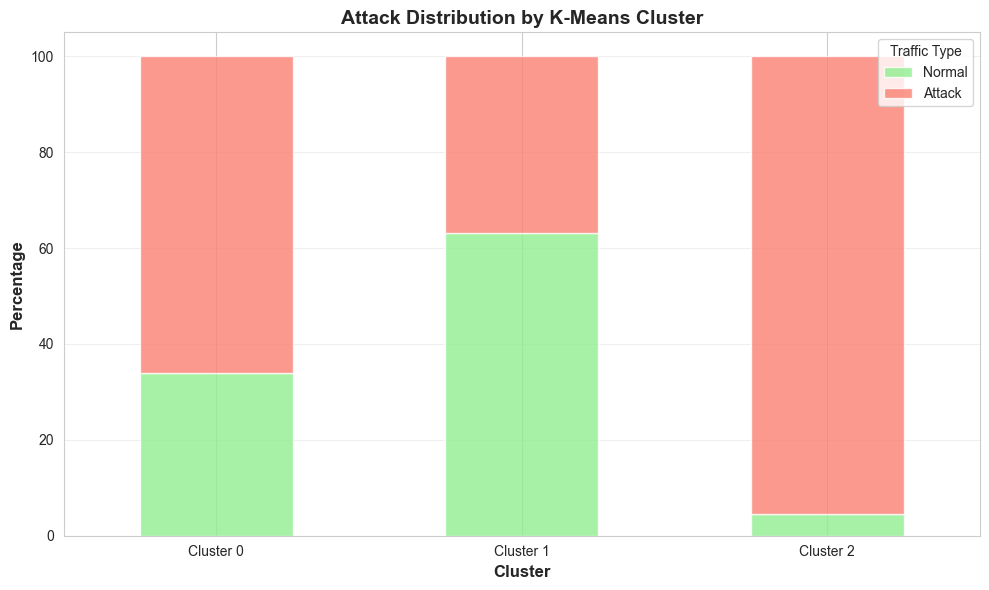


Attack Distribution by Cluster (%):
label               0      1
kmeans_cluster              
0               34.03  65.97
1               63.21  36.79
2                4.55  95.45


In [115]:
# Analyze attack distribution in each cluster
attack_dist = pd.crosstab(pca_df['kmeans_cluster'], pca_df['label'], normalize='index') * 100
fig, ax = plt.subplots(figsize=(10, 6))
attack_dist.plot(kind='bar', stacked=True, ax=ax, color=['lightgreen', 'salmon'], alpha=0.8)
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=12, fontweight='bold')
ax.set_title('Attack Distribution by K-Means Cluster', fontsize=14, fontweight='bold')
ax.legend(['Normal', 'Attack'], title='Traffic Type', fontsize=10)
ax.set_xticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("\nAttack Distribution by Cluster (%):")
print(attack_dist.round(2))

## DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based algorithm that:
- Groups together points that are closely packed
- Identifies points in low-density regions as outliers
- Doesn't require specifying the number of clusters
**Key Parameters:**
- **eps**: Maximum distance between two points to be considered neighbors
- **min_samples**: Minimum number of points to form a dense region
**Advantages:**
- Can find arbitrarily shaped clusters
- Identifies outliers/noise points
- Doesn't require K to be specified
**Limitations:**
- Sensitive to parameter selection
- Struggles with varying density clusters

### Determining Optimal eps: K-Distance Graph
The k-distance graph helps us choose an appropriate eps value:
1. For each point, compute distance to k-th nearest neighbor
2. Sort these distances in ascending order
3. Plot the sorted distances
4. Look for an "elbow" point - this suggests a good eps value

K-Distance Statistics:
Min distance: 0.0000
Max distance: 235.8406
Mean distance: 0.4822
Median distance: 0.3919
Std deviation: 1.4164

Distance Percentiles:
  50th percentile: 0.3919
  75th percentile: 0.6598
  90th percentile: 0.9718
  95th percentile: 1.2767
  98th percentile: 1.9025
  99th percentile: 2.4018

Suggested eps value: 1.2767
This is the 95th percentile of k-distances


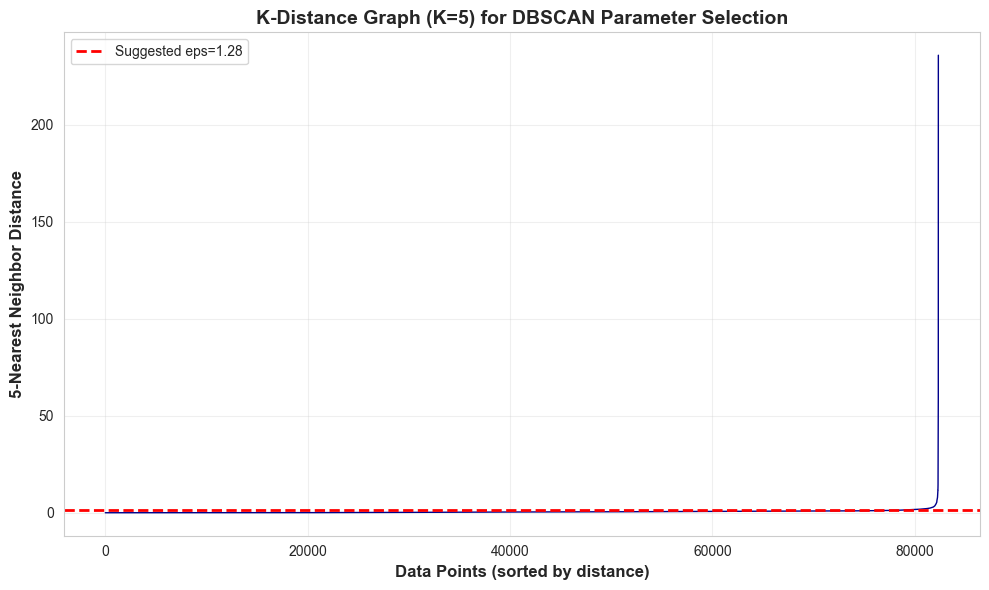

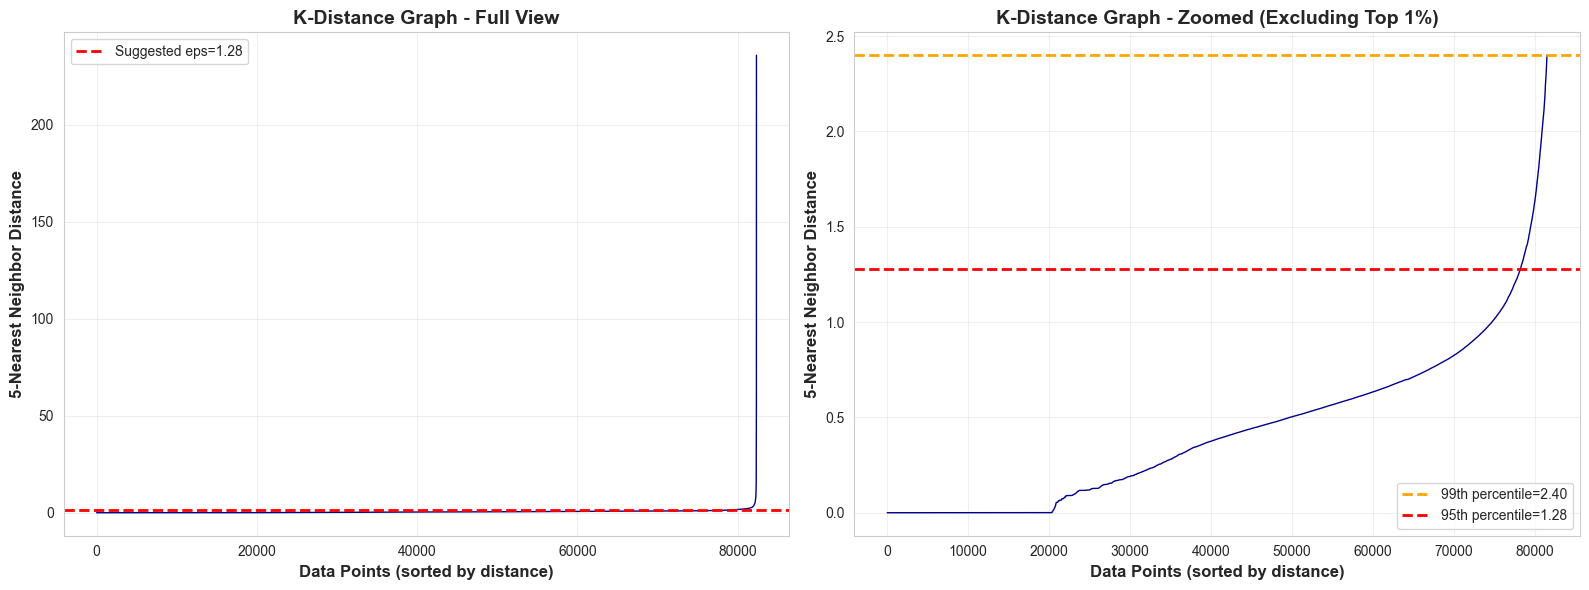


DBSCAN PARAMETER RECOMMENDATIONS:
Based on the k-distance graph analysis:
  - Primary recommendation (eps): 1.2767
  - Alternative (99th percentile): 2.4018
  - Suggested min_samples: 5

Interpretation:
   Extreme outliers detected (max distance is 235.84)
   DBSCAN will likely label these as noise points (-1)


In [116]:

# Calculate k-distance for determining eps
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Get k-th nearest neighbor distances
k_distances = distances[:, k-1]

# Sort distances
sorted_distances = np.sort(k_distances, axis=0)

# Print diagnostics to understand the data
print("K-Distance Statistics:")
print(f"Min distance: {sorted_distances.min():.4f}")
print(f"Max distance: {sorted_distances.max():.4f}")
print(f"Mean distance: {sorted_distances.mean():.4f}")
print(f"Median distance: {np.median(sorted_distances):.4f}")
print(f"Std deviation: {sorted_distances.std():.4f}")
print(f"\nDistance Percentiles:")
for p in [50, 75, 90, 95, 98, 99]:
    print(f"  {p}th percentile: {np.percentile(sorted_distances, p):.4f}")

# Create main plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances, color='darkblue', linewidth=1)
plt.xlabel('Data Points (sorted by distance)', fontsize=12, fontweight='bold')
plt.ylabel(f'{k}-Nearest Neighbor Distance', fontsize=12, fontweight='bold')
plt.title(f'K-Distance Graph (K={k}) for DBSCAN Parameter Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Suggest eps value (this variable is used in CELL 13)
suggested_eps = np.percentile(sorted_distances, 95)
print(f"\nSuggested eps value: {suggested_eps:.4f}")
print(f"This is the 95th percentile of k-distances")

plt.axhline(y=suggested_eps, color='red', linestyle='--', linewidth=2, 
            label=f'Suggested eps={suggested_eps:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Create additional diagnostic plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Full view
ax1.plot(sorted_distances, color='darkblue', linewidth=1)
ax1.axhline(y=suggested_eps, color='red', linestyle='--', linewidth=2, 
            label=f'Suggested eps={suggested_eps:.2f}')
ax1.set_xlabel('Data Points (sorted by distance)', fontsize=12, fontweight='bold')
ax1.set_ylabel(f'{k}-Nearest Neighbor Distance', fontsize=12, fontweight='bold')
ax1.set_title('K-Distance Graph - Full View', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Zoomed view (up to 99th percentile to see the curve better)
cutoff_idx = int(len(sorted_distances) * 0.99)
ax2.plot(sorted_distances[:cutoff_idx], color='darkblue', linewidth=1)
eps_99 = np.percentile(sorted_distances, 99)
ax2.axhline(y=eps_99, color='orange', linestyle='--', linewidth=2, 
            label=f'99th percentile={eps_99:.2f}')
ax2.axhline(y=suggested_eps, color='red', linestyle='--', linewidth=2, 
            label=f'95th percentile={suggested_eps:.2f}')
ax2.set_xlabel('Data Points (sorted by distance)', fontsize=12, fontweight='bold')
ax2.set_ylabel(f'{k}-Nearest Neighbor Distance', fontsize=12, fontweight='bold')
ax2.set_title('K-Distance Graph - Zoomed (Excluding Top 1%)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Provide recommendations
print("\n" + "="*60)
print("DBSCAN PARAMETER RECOMMENDATIONS:")
print("="*60)
print(f"Based on the k-distance graph analysis:")
print(f"  - Primary recommendation (eps): {suggested_eps:.4f}")
print(f"  - Alternative (99th percentile): {eps_99:.4f}")
print(f"  - Suggested min_samples: {k}")
print(f"\nInterpretation:")
if sorted_distances.max() > 10 * np.median(sorted_distances):
    print(f"   Extreme outliers detected (max distance is {sorted_distances.max():.2f})")
    print(f"   DBSCAN will likely label these as noise points (-1)")
if np.percentile(sorted_distances, 90) < suggested_eps * 0.5:
    print(f"  ℹ Most points are densely packed")
    print(f"  ℹ Consider using a smaller eps value if too few clusters form")
print("="*60)

In [117]:
# Apply DBSCAN with determined parameters
eps = suggested_eps
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)
# Analyze results
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"\nDBSCAN Results:")
print(f"eps: {eps:.4f}")
print(f"min_samples: {min_samples}")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise} ({n_noise/len(dbscan_labels)*100:.2f}%)")
# Calculate silhouette score (excluding noise)
if n_clusters > 1:
    mask = dbscan_labels != -1
    if mask.sum() > 0:
        dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
        print(f"Silhouette Score (excluding noise): {dbscan_silhouette:.4f}")



DBSCAN Results:
eps: 1.2767
min_samples: 5
Number of clusters: 162
Number of noise points: 2989 (3.63%)
Silhouette Score (excluding noise): -0.0567


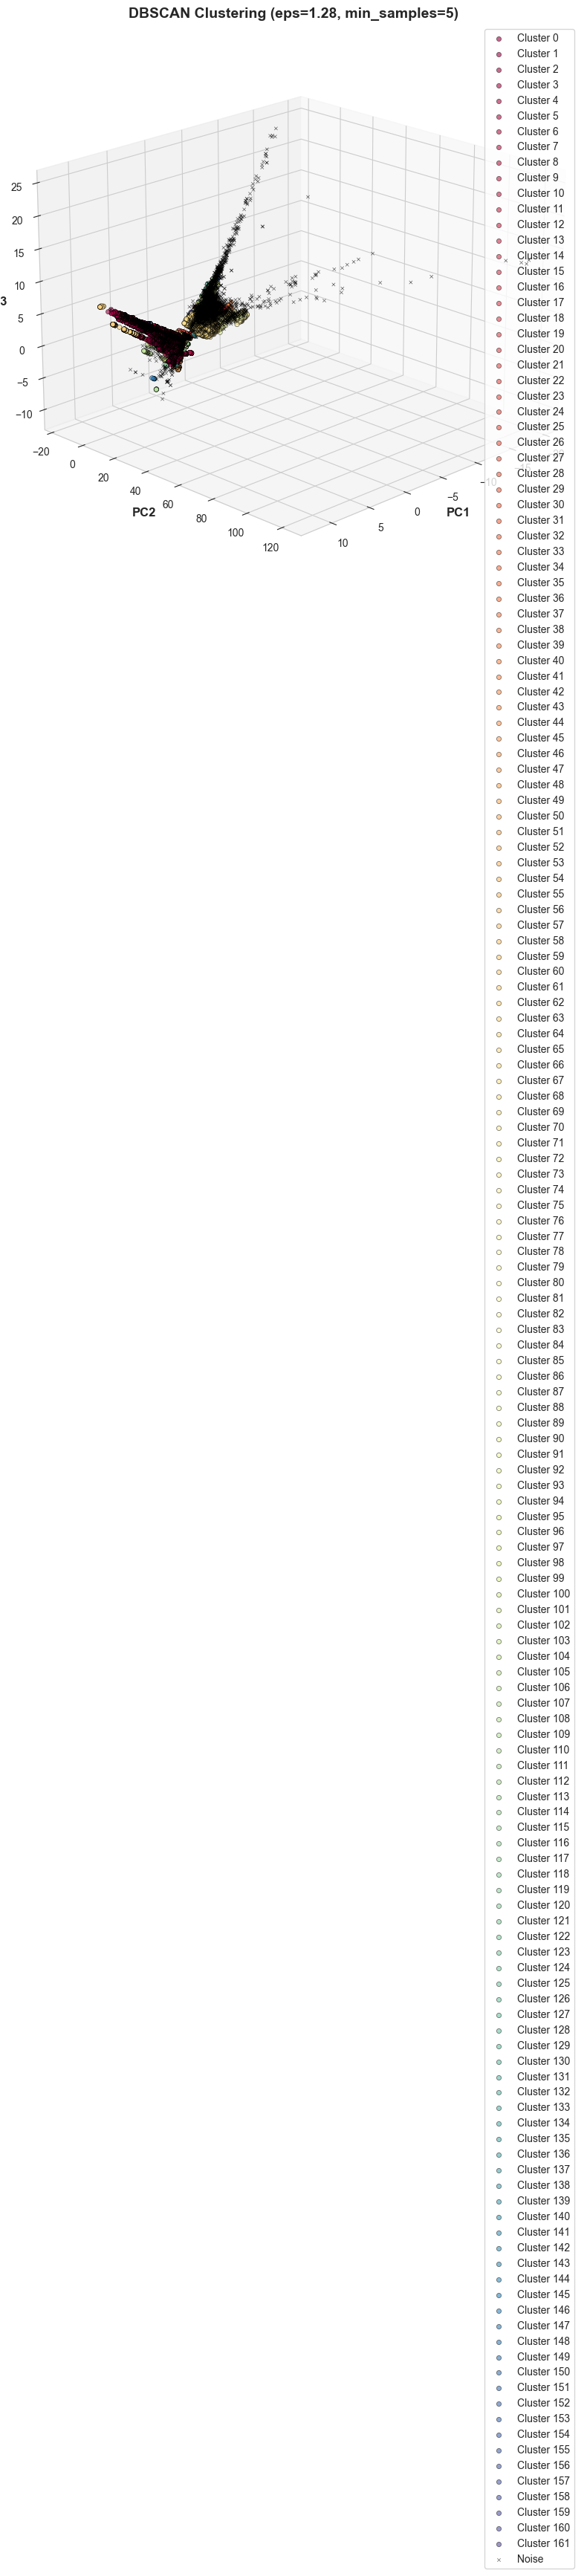

In [118]:
# Add DBSCAN labels to PCA dataframe
pca_df['dbscan_cluster'] = dbscan_labels
# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
# Get unique labels
unique_labels = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        # Noise points in black
        col = [0, 0, 0, 1]
        marker = 'x'
        size = 10
        label = 'Noise'
    else:
        marker = 'o'
        size = 20
        label = f'Cluster {k}'
    
    mask = pca_df['dbscan_cluster'] == k
    ax.scatter(pca_df.loc[mask, 'PC1'],
               pca_df.loc[mask, 'PC2'],
               pca_df.loc[mask, 'PC3'],
               c=[col], marker=marker, s=size, alpha=0.6,
               edgecolors='k', linewidth=0.5, label=label)
ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
ax.set_zlabel('PC3', fontsize=12, fontweight='bold')
ax.set_title(f'DBSCAN Clustering (eps={eps:.2f}, min_samples={min_samples})', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()


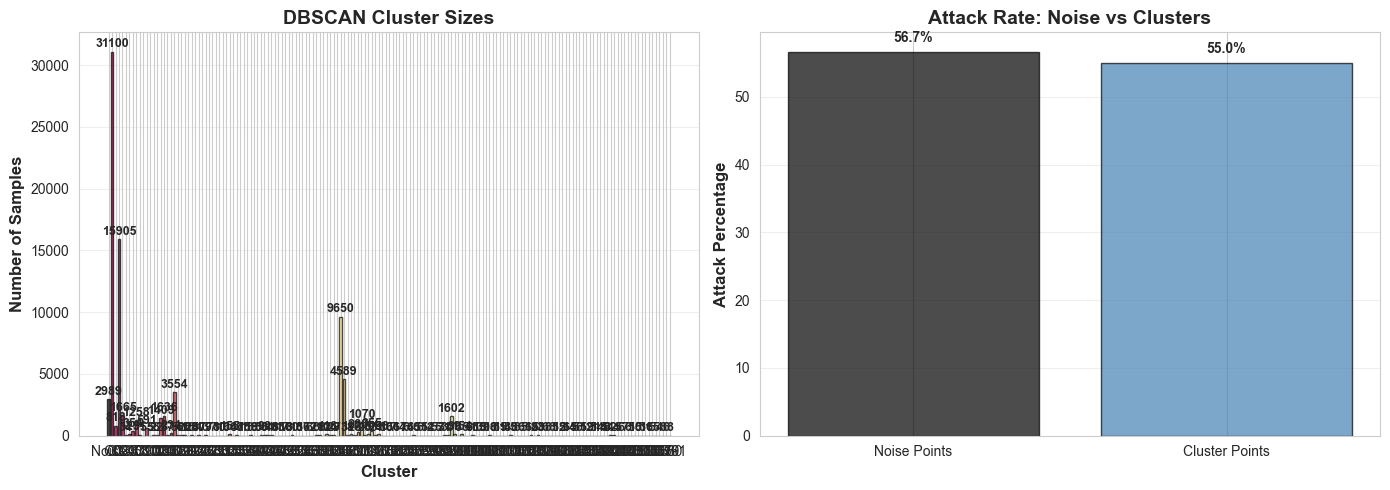


DBSCAN Cluster Sizes:
Noise: 2989 samples (3.63%)
Cluster 0: 31100 samples (37.77%)
Cluster 1: 818 samples (0.99%)
Cluster 2: 15905 samples (19.32%)
Cluster 3: 1665 samples (2.02%)
Cluster 4: 34 samples (0.04%)
Cluster 5: 129 samples (0.16%)
Cluster 6: 354 samples (0.43%)
Cluster 7: 1258 samples (1.53%)
Cluster 8: 91 samples (0.11%)
Cluster 9: 5 samples (0.01%)
Cluster 10: 591 samples (0.72%)
Cluster 11: 5 samples (0.01%)
Cluster 12: 56 samples (0.07%)
Cluster 13: 22 samples (0.03%)
Cluster 14: 1409 samples (1.71%)
Cluster 15: 1636 samples (1.99%)
Cluster 16: 37 samples (0.04%)
Cluster 17: 234 samples (0.28%)
Cluster 18: 3554 samples (4.32%)
Cluster 19: 56 samples (0.07%)
Cluster 20: 41 samples (0.05%)
Cluster 21: 28 samples (0.03%)
Cluster 22: 16 samples (0.02%)
Cluster 23: 28 samples (0.03%)
Cluster 24: 5 samples (0.01%)
Cluster 25: 40 samples (0.05%)
Cluster 26: 13 samples (0.02%)
Cluster 27: 79 samples (0.10%)
Cluster 28: 7 samples (0.01%)
Cluster 29: 7 samples (0.01%)
Cluster 30:

In [119]:
# Analyze DBSCAN clusters
dbscan_cluster_sizes = pd.Series(dbscan_labels).value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Bar plot
colors_bar = ['black' if x == -1 else plt.cm.Spectral(x/n_clusters) for x in dbscan_cluster_sizes.index]
ax1.bar(range(len(dbscan_cluster_sizes)), dbscan_cluster_sizes.values, 
        color=colors_bar, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax1.set_title('DBSCAN Cluster Sizes', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(dbscan_cluster_sizes)))
ax1.set_xticklabels(['Noise' if x == -1 else f'C{x}' for x in dbscan_cluster_sizes.index])
ax1.grid(axis='y', alpha=0.3)
# Add value labels
for i, v in enumerate(dbscan_cluster_sizes.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)
# Attack distribution in noise vs clusters
noise_attacks = (pca_df[pca_df['dbscan_cluster'] == -1]['label'] == 1).sum()
noise_total = (pca_df['dbscan_cluster'] == -1).sum()
cluster_attacks = (pca_df[pca_df['dbscan_cluster'] != -1]['label'] == 1).sum()
cluster_total = (pca_df['dbscan_cluster'] != -1).sum()
categories = ['Noise Points', 'Cluster Points']
attack_pct = [noise_attacks/noise_total*100 if noise_total > 0 else 0, 
              cluster_attacks/cluster_total*100 if cluster_total > 0 else 0]
ax2.bar(categories, attack_pct, color=['black', 'steelblue'], alpha=0.7, edgecolor='black')
ax2.set_ylabel('Attack Percentage', fontsize=12, fontweight='bold')
ax2.set_title('Attack Rate: Noise vs Clusters', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
# Add value labels
for i, v in enumerate(attack_pct):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()
print("\nDBSCAN Cluster Sizes:")
for label, size in dbscan_cluster_sizes.items():
    cluster_name = "Noise" if label == -1 else f"Cluster {label}"
    print(f"{cluster_name}: {size} samples ({size/len(dbscan_labels)*100:.2f}%)")
print(f"\nAttack Rate in Noise: {attack_pct[0]:.2f}%")
print(f"Attack Rate in Clusters: {attack_pct[1]:.2f}%")


#### DBSCAN Clustering Results
DBSCAN has identified clusters and noise points in our data:
- **Core points**: Points with at least min_samples neighbors within eps
- **Border points**: Points within eps of a core point but with fewer neighbors
- **Noise points**: Outliers that don't belong to any cluster
Noise points are particularly interesting for security analysis as they may represent anomalous or attack traffic.

## Hierarchical Clustering
Hierarchical clustering builds a tree of clusters (dendrogram) showing relationships between data points. We use agglomerative (bottom-up) clustering:
1. Start with each point as its own cluster
2. Merge the closest pair of clusters
3. Repeat until all points are in one cluster
**Linkage Methods:**
- **Ward**: Minimizes within-cluster variance (we use this)
- **Complete**: Maximum distance between clusters
- **Average**: Average distance between all pairs
**Advantages:**
- Provides a hierarchy of clusters
- No need to specify K in advance
- Dendrogram visualization shows relationships
**Limitations:**
- Computationally expensive for large datasets
- Cannot undo previous merges

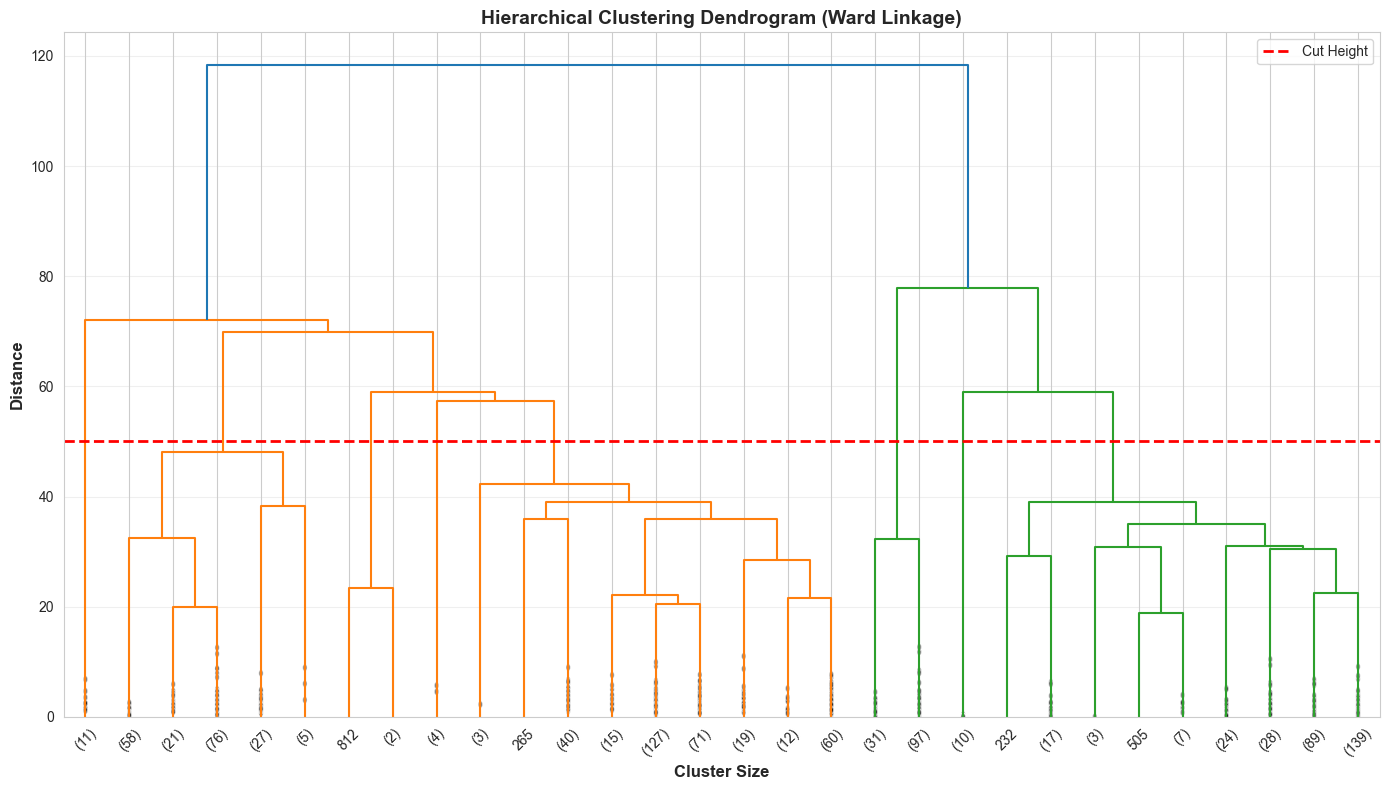

Dendrogram created from 1000 sampled points


In [120]:
# Sample data for dendrogram (full dataset is too large)
sample_size = 1000
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]
# Perform hierarchical clustering
linkage_matrix = linkage(X_sample, method='ward')
# Plot dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, 
           truncate_mode='lastp',
           p=30,
           leaf_font_size=10,
           show_contracted=True)
plt.xlabel('Cluster Size', fontsize=12, fontweight='bold')
plt.ylabel('Distance', fontsize=12, fontweight='bold')
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Cut Height')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Dendrogram created from {sample_size} sampled points")

### Reading the Dendrogram
The dendrogram shows:
- **Height**: Indicates dissimilarity between merged clusters
- **Vertical lines**: Represent clusters being merged
- **Horizontal cuts**: Different cut heights give different numbers of clusters
Large jumps in height suggest natural cluster boundaries.

In [121]:
# Hierarchical clustering is memory-intensive for large datasets
# We'll use a representative sample for analysis

# Determine sample size based on available memory
max_sample_size = 5000  # Safe size that won't cause memory issues
sample_size = min(max_sample_size, len(X_scaled))

print(f"Using {sample_size} samples for Hierarchical Clustering (memory optimization)")
print(f"Original dataset size: {len(X_scaled)}")

# Create stratified sample to maintain class distribution
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_scaled_sample = X_scaled[sample_indices]

# Apply hierarchical clustering on the sample
n_clusters_hier = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hier, linkage='ward')
hier_labels_sample = hierarchical.fit_predict(X_scaled_sample)

# Calculate metrics on the sample
hier_silhouette = silhouette_score(X_scaled_sample, hier_labels_sample)
hier_davies_bouldin = davies_bouldin_score(X_scaled_sample, hier_labels_sample)
hier_calinski = calinski_harabasz_score(X_scaled_sample, hier_labels_sample)

print(f"\nHierarchical Clustering Results (K={n_clusters_hier}):")
print(f"Sample size: {sample_size} ({sample_size/len(X_scaled)*100:.2f}% of data)")
print(f"Silhouette Score: {hier_silhouette:.4f}")
print(f"Davies-Bouldin Index: {hier_davies_bouldin:.4f} (lower is better)")
print(f"Calinski-Harabasz Score: {hier_calinski:.2f} (higher is better)")

# For visualization purposes, we'll assign all points to clusters
# using KMeans with the same number of clusters (as a proxy)
print(f"\nAssigning all {len(X_scaled)} points to clusters using K-Means proxy...")
kmeans_proxy = KMeans(n_clusters=n_clusters_hier, random_state=42, n_init=10)
hier_labels = kmeans_proxy.fit_predict(X_scaled)

print(f" All points assigned to {n_clusters_hier} clusters for visualization")
print("\nNote: Metrics calculated on sample, but all points are clustered for visualization")

Using 5000 samples for Hierarchical Clustering (memory optimization)
Original dataset size: 82332

Hierarchical Clustering Results (K=3):
Sample size: 5000 (6.07% of data)
Silhouette Score: 0.2447
Davies-Bouldin Index: 1.3899 (lower is better)
Calinski-Harabasz Score: 894.88 (higher is better)

Assigning all 82332 points to clusters using K-Means proxy...
 All points assigned to 3 clusters for visualization

Note: Metrics calculated on sample, but all points are clustered for visualization


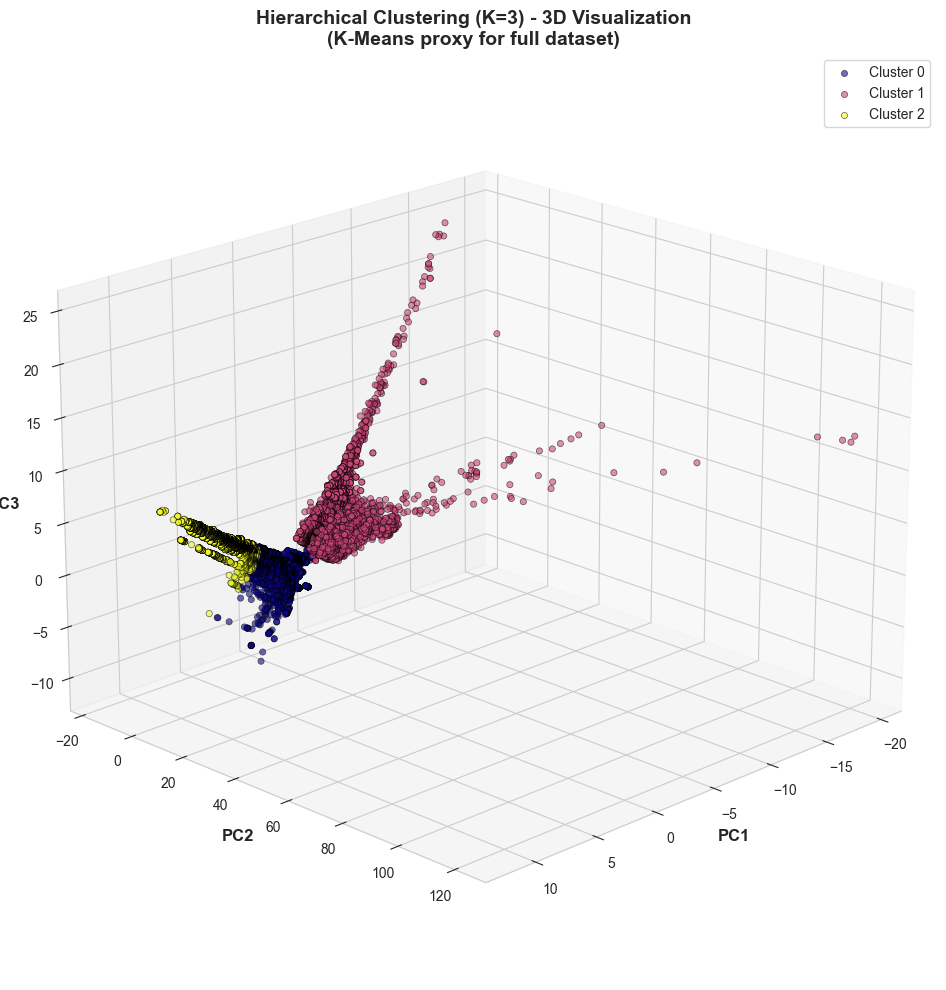

Note: Visualization uses K-Means clustering as a proxy for Hierarchical Clustering
This is necessary due to memory constraints with large datasets


In [122]:
# Add hierarchical labels to PCA dataframe (using the proxy labels for all points)
pca_df['hier_cluster'] = hier_labels

# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
colors_hier = plt.cm.plasma(np.linspace(0, 1, n_clusters_hier))
for i in range(n_clusters_hier):
    mask = pca_df['hier_cluster'] == i
    ax.scatter(pca_df.loc[mask, 'PC1'],
               pca_df.loc[mask, 'PC2'],
               pca_df.loc[mask, 'PC3'],
               c=[colors_hier[i]], label=f'Cluster {i}',
               s=20, alpha=0.6, edgecolors='k', linewidth=0.5)

ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
ax.set_zlabel('PC3', fontsize=12, fontweight='bold')
ax.set_title(f'Hierarchical Clustering (K={n_clusters_hier}) - 3D Visualization\n(K-Means proxy for full dataset)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()

print("Note: Visualization uses K-Means clustering as a proxy for Hierarchical Clustering")
print("This is necessary due to memory constraints with large datasets")

## Comparing Clustering Algorithms
Each algorithm has different strengths:
**K-Means:**
- Best for: Well-separated, spherical clusters
- Fast and scalable
- Requires knowing K
**DBSCAN:**
- Best for: Arbitrary shapes, outlier detection
- No need to specify K
- Identifies noise/anomalies
**Hierarchical:**
- Best for: Understanding cluster relationships
- Provides multiple granularity levels
- Computationally expensive
We compare them using:
- Silhouette scores
- Davies-Bouldin index (lower is better)
- Calinski-Harabasz index (higher is better)

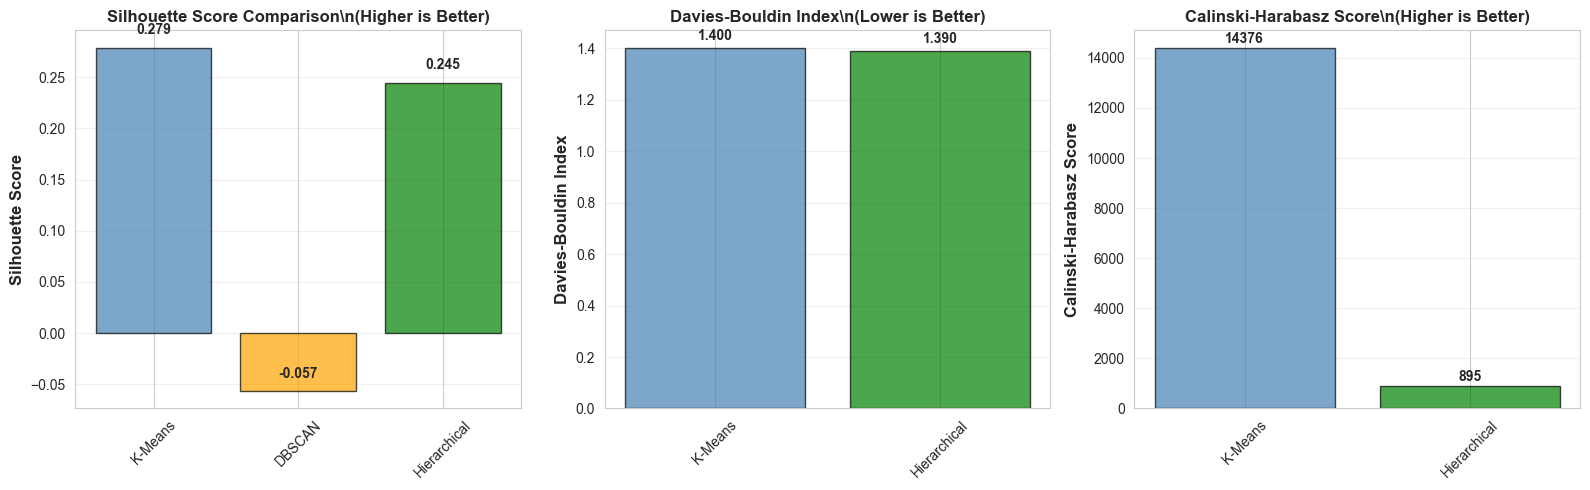


Clustering Algorithm Comparison:
   Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz  N_Clusters
     K-Means    0.278730        1.400056       14375.959056           3
      DBSCAN   -0.056732             NaN                NaN         162
Hierarchical    0.244676        1.389854         894.879352           3


In [123]:
# Calculate metrics for all algorithms
kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Silhouette': [silhouette_avg, dbscan_silhouette if n_clusters > 1 else 0, hier_silhouette],
    'Davies-Bouldin': [kmeans_davies, np.nan, hier_davies_bouldin],
    'Calinski-Harabasz': [kmeans_calinski, np.nan, hier_calinski],
    'N_Clusters': [optimal_k, n_clusters, n_clusters_hier]
})
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
# Silhouette scores
axes[0].bar(comparison_df['Algorithm'], comparison_df['Silhouette'], 
            color=['steelblue', 'orange', 'green'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[0].set_title('Silhouette Score Comparison\\n(Higher is Better)', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Silhouette']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
# Davies-Bouldin Index
db_data = comparison_df[comparison_df['Davies-Bouldin'].notna()]
axes[1].bar(db_data['Algorithm'], db_data['Davies-Bouldin'],
            color=['steelblue', 'green'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[1].set_title('Davies-Bouldin Index\\n(Lower is Better)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)
for i, (idx, row) in enumerate(db_data.iterrows()):
    axes[1].text(i, row['Davies-Bouldin'] + 0.02, f'{row["Davies-Bouldin"]:.3f}', 
                ha='center', va='bottom', fontweight='bold')
# Calinski-Harabasz Score
ch_data = comparison_df[comparison_df['Calinski-Harabasz'].notna()]
axes[2].bar(ch_data['Algorithm'], ch_data['Calinski-Harabasz'],
            color=['steelblue', 'green'], alpha=0.7, edgecolor='black')
axes[2].set_ylabel('Calinski-Harabasz Score', fontsize=12, fontweight='bold')
axes[2].set_title('Calinski-Harabasz Score\\n(Higher is Better)', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)
for i, (idx, row) in enumerate(ch_data.iterrows()):
    axes[2].text(i, row['Calinski-Harabasz'] + 100, f'{row["Calinski-Harabasz"]:.0f}', 
                ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()
print("\nClustering Algorithm Comparison:")
print(comparison_df.to_string(index=False))


## Cluster Profiling and Interpretation
For each cluster, we analyze:
1. **Size**: Number of traffic flows
2. **Feature distributions**: Characteristic patterns
3. **Attack distribution**: Types of attacks present
4. **Security implications**: What each cluster represents

### Feature Distribution by Cluster (K-Means)

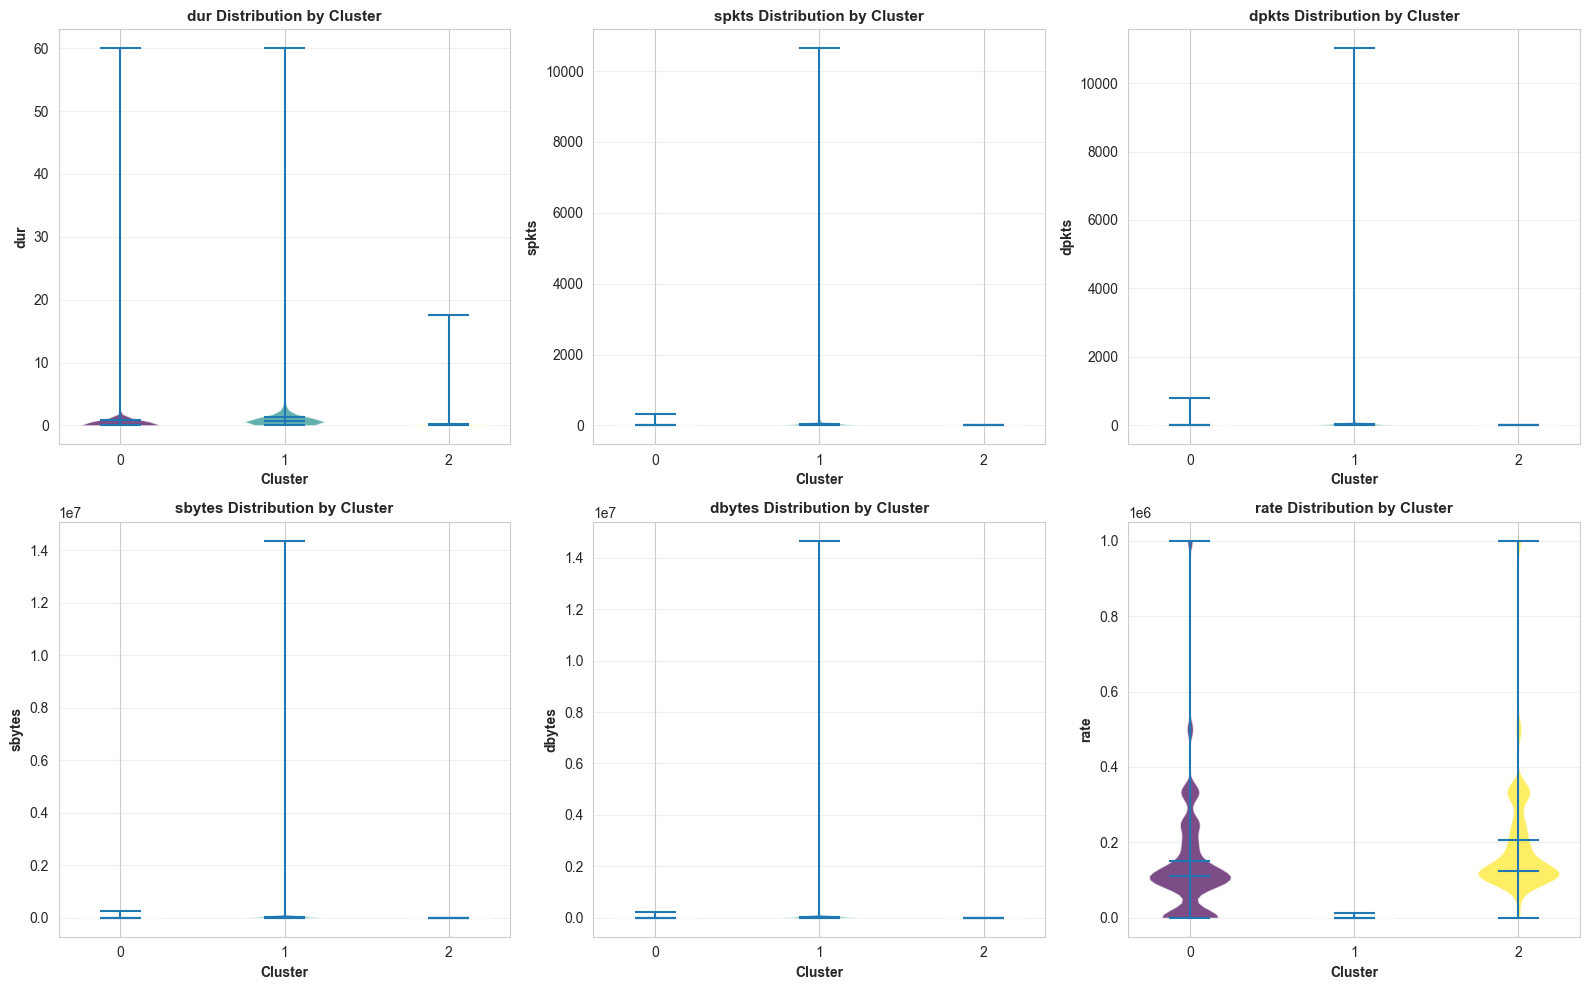

In [124]:
# Select a few important features to visualize
important_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()
for idx, feature in enumerate(important_features):
    # Create dataframe for plotting
    plot_data = pd.DataFrame({
        'value': train[feature],
        'cluster': kmeans_labels
    })
    
    # Create violin plot
    parts = axes[idx].violinplot([plot_data[plot_data['cluster'] == i]['value'].values 
                                   for i in range(optimal_k)],
                                  positions=range(optimal_k),
                                  showmeans=True, showmedians=True)
    
    # Color the violins
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[idx].set_xlabel('Cluster', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{feature} Distribution by Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_xticks(range(optimal_k))
    axes[idx].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Cluster Characteristics Heatmap

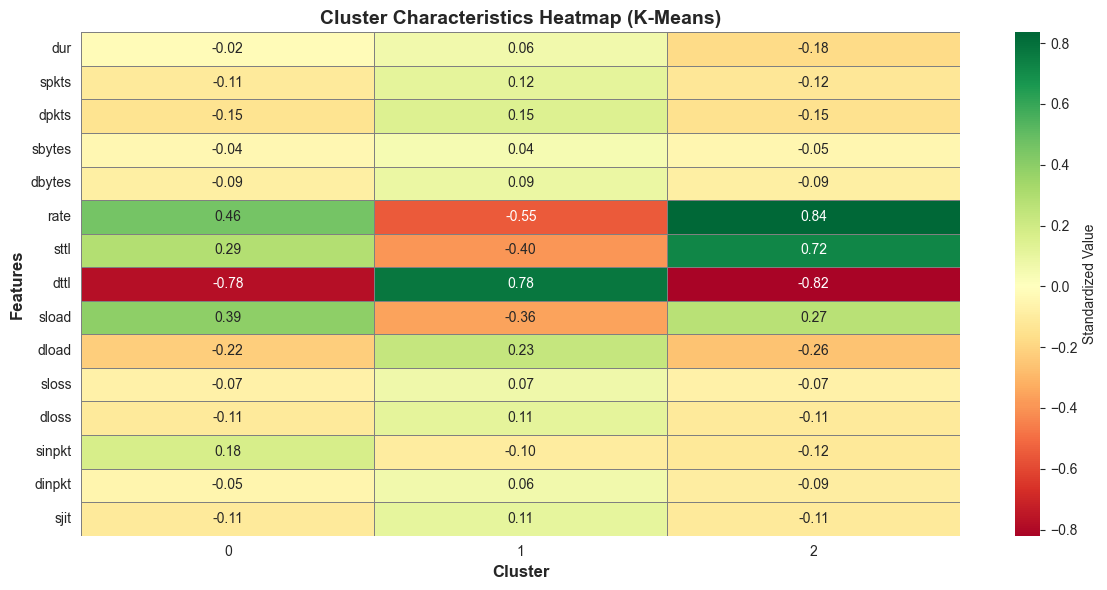

In [125]:
# Calculate mean feature values for each cluster
cluster_profiles = pd.DataFrame(X_scaled, columns=clustering_features)
cluster_profiles['cluster'] = kmeans_labels
cluster_means = cluster_profiles.groupby('cluster').mean()
# Select top features for visualization
top_features = clustering_features[:15]  # First 15 features
cluster_means_subset = cluster_means[top_features]
# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_subset.T, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, cbar_kws={'label': 'Standardized Value'},
            linewidths=0.5, linecolor='gray')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Cluster Characteristics Heatmap (K-Means)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Attack Type Distribution Across Clusters


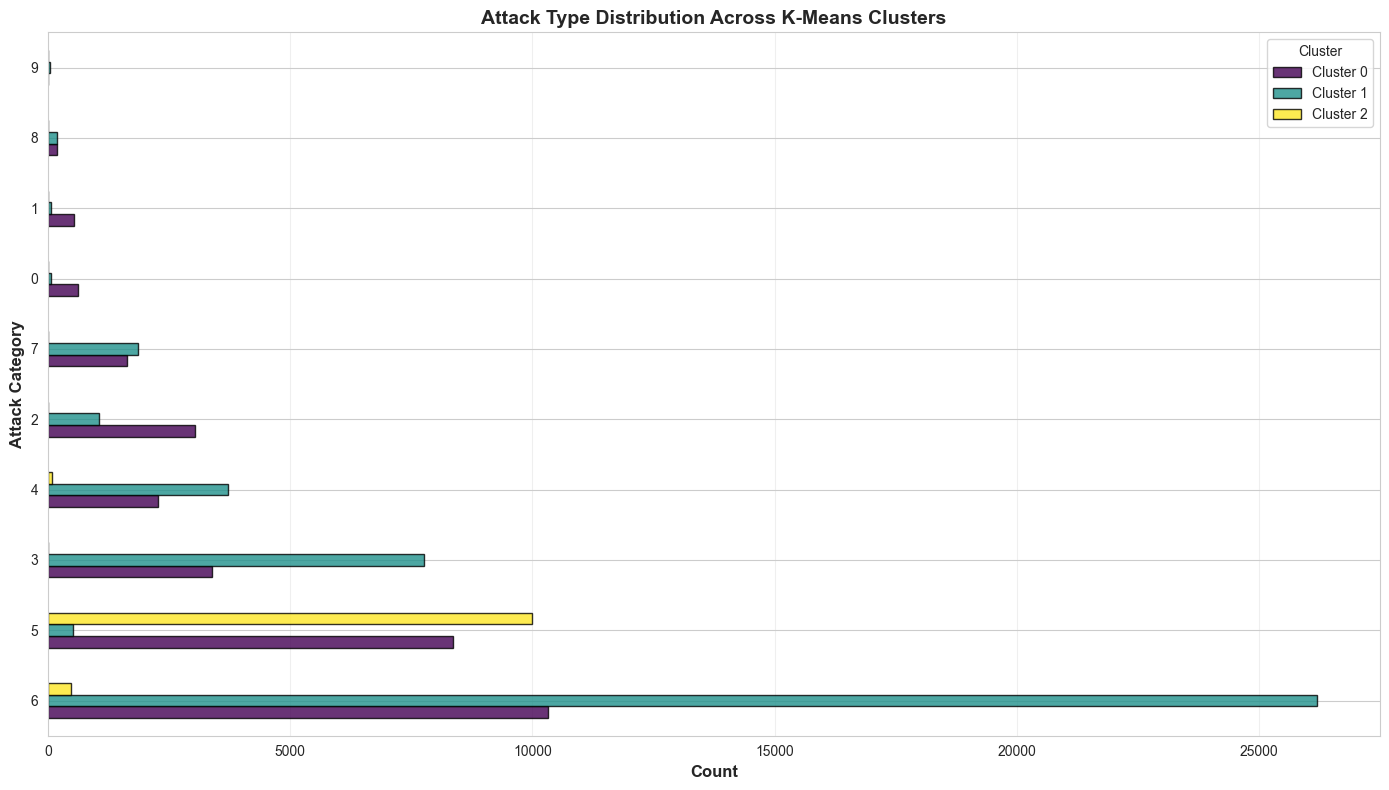


Top Attack Categories by Cluster:
col_0           0      1     2
attack_cat                    
6           10327  26193   480
5            8363    520  9988
3            3378   7754     0
4            2268   3713    81
2            3034   1055     0
7            1631   1865     0
0             619     58     0
1             532     51     0
8             185    193     0
9               6     38     0


In [126]:
# Detailed attack category analysis
attack_cluster_dist = pd.crosstab(train['attack_cat'], kmeans_labels)
# Get top attack categories
top_attacks = train['attack_cat'].value_counts().head(10).index
attack_cluster_subset = attack_cluster_dist.loc[top_attacks]
# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
attack_cluster_subset.plot(kind='barh', stacked=False, ax=ax, 
                           color=colors, alpha=0.8, edgecolor='black')
ax.set_xlabel('Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Attack Category', fontsize=12, fontweight='bold')
ax.set_title('Attack Type Distribution Across K-Means Clusters', fontsize=14, fontweight='bold')
ax.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(optimal_k)])
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
print("\nTop Attack Categories by Cluster:")
print(attack_cluster_subset)


### Summary Statistics

In [127]:
print("="*80)
print("CLUSTERING ANALYSIS SUMMARY")
print("="*80)
print(f"\nDataset Information:")
print(f"  Total samples: {len(train)}")
print(f"  Features used: {len(clustering_features)}")
print(f"  Normal traffic: {(train['label'] == 0).sum()} ({(train['label'] == 0).sum()/len(train)*100:.2f}%)")
print(f"  Attack traffic: {(train['label'] == 1).sum()} ({(train['label'] == 1).sum()/len(train)*100:.2f}%)")
print(f"\nK-Means Results:")
print(f"  Optimal K: {optimal_k}")
print(f"  Silhouette Score: {silhouette_avg:.4f}")
print(f"  Davies-Bouldin Index: {kmeans_davies:.4f}")
print(f"  Calinski-Harabasz Score: {kmeans_calinski:.2f}")
print(f"\nDBSCAN Results:")
print(f"  Number of clusters: {n_clusters}")
print(f"  Noise points: {n_noise} ({n_noise/len(dbscan_labels)*100:.2f}%)")
if n_clusters > 1:
    print(f"  Silhouette Score: {dbscan_silhouette:.4f}")
print(f"\nHierarchical Clustering Results:")
print(f"  Number of clusters: {n_clusters_hier}")
print(f"  Silhouette Score: {hier_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {hier_davies_bouldin:.4f}")
print(f"  Calinski-Harabasz Score: {hier_calinski:.2f}")
print(f"\nPCA Information:")
print(f"  Components: 3")
print(f"  Total variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print("="*80)
print("Analysis complete! Review the visualizations above for detailed insights.")
print("="*80)

CLUSTERING ANALYSIS SUMMARY

Dataset Information:
  Total samples: 82332
  Features used: 43
  Normal traffic: 37000 (44.94%)
  Attack traffic: 45332 (55.06%)

K-Means Results:
  Optimal K: 3
  Silhouette Score: 0.2787
  Davies-Bouldin Index: 1.4001
  Calinski-Harabasz Score: 14375.96

DBSCAN Results:
  Number of clusters: 162
  Noise points: 2989 (3.63%)
  Silhouette Score: -0.0567

Hierarchical Clustering Results:
  Number of clusters: 3
  Silhouette Score: 0.2447
  Davies-Bouldin Index: 1.3899
  Calinski-Harabasz Score: 894.88

PCA Information:
  Components: 3
  Total variance explained: 39.17%
Analysis complete! Review the visualizations above for detailed insights.


### Security Insights from Clustering
Clustering reveals important security patterns:
1. **Normal Traffic Clusters**: Baseline behavior for comparison
2. **Attack Clusters**: Groups of similar attack patterns
3. **Mixed Clusters**: May indicate evolving attack strategies
4. **Outliers**: Potential zero-day attacks or rare events
These insights can inform:
- Intrusion detection rules
- Network segmentation policies
- Anomaly detection thresholds
- Security monitoring priorities

## Conclusions and Recommendations
### Key Findings
1. **Cluster Structure**: The data exhibits clear clustering structure with distinct groups
2. **Attack Patterns**: Different attack types show distinct clustering behavior
3. **Outliers**: DBSCAN identified outliers warranting investigation
### Recommendations
1. **Monitoring**: Focus on traffic patterns that deviate from normal clusters
2. **Detection**: Use cluster assignments as features for supervised learning
3. **Investigation**: Prioritize outliers and mixed clusters for security analysis
4. **Updates**: Regularly re-cluster to detect evolving attack patterns
### Limitations
- Clustering is sensitive to feature selection and scaling
- Results depend on algorithm parameters
- Unlabeled anomalies may exist within normal clusters
- Temporal patterns not captured in static clustering
### Future Work
- Incorporate temporal features for time-series clustering
- Apply ensemble clustering methods
- Integrate clustering with real-time monitoring systems
- Develop automated cluster interpretation tools